In [412]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import numpy as np
import seaborn
from matplotlib import pyplot as plt

In [413]:
data = pd.read_csv("titanic/train.csv")

In [414]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [415]:
target = data['Survived']

In [416]:
len(target)

891

In [445]:
num_columns_1 = ['Age', 'Fare']
num_columns = ['Age', 'Fare','ticket', "number_of_cabin"]
cat_columns_1 = ['Pclass','Sex', 'SibSp', 'Parch', 'Embarked']
cat_columns = ['Pclass','Sex', 'SibSp', 'Parch', 'Embarked', "corpus"]
str_columns = ['Ticket',  'Cabin']

In [418]:
data_ticket = np.array(data[str_columns[0]].apply(lambda x: x.split(" ")[-1]))

In [419]:
data_ticket[data_ticket == "LINE"] = 0

In [420]:
data_ticket = np.array(data_ticket, dtype = int)

In [421]:
data["ticket"] = data_ticket

In [422]:
def clear_cabin(x):
    a = np.array([item[1:] for item in x.split(" ")])
    a = np.array(a[a!= ""], dtype = int)
    if len(a) == 0:
        res = 0
    else: 
        res = int(a.mean())
    return res


data_corpus = np.array(data[str_columns[1]].fillna("N0").apply(lambda x: x.split(" ")[0][0]))
data_cabin = np.array(data[str_columns[1]].fillna("N0").apply(clear_cabin))

In [423]:
data["corpus"] = data_corpus
data["number_of_cabin"] = data_cabin

In [424]:
data.dropna().shape

(183, 15)

/Users/maxim/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/maxim/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


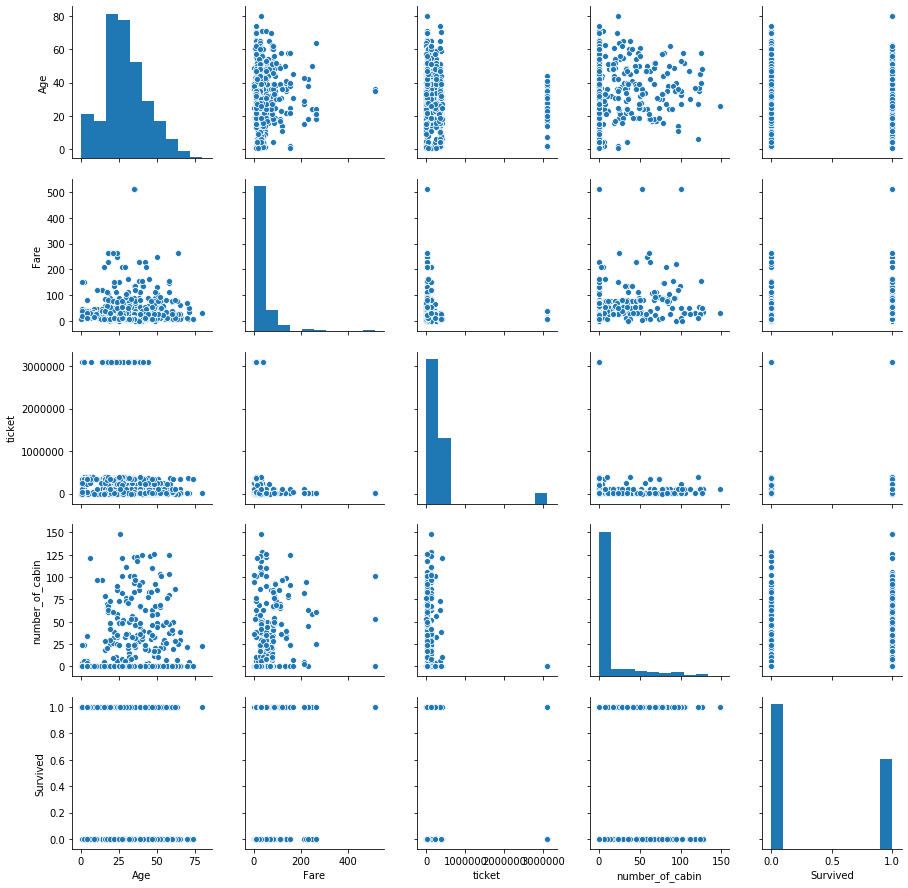

In [425]:
seaborn.pairplot(data[num_columns  + ['Survived']])

# Preprocessing

In [426]:
data_mean = data[num_columns]
data_zeros = data[num_columns].fillna(0)

In [427]:
for col in data_mean.columns:
    data_mean[col].fillna(data_mean[col].mean(), inplace = True)

/Users/maxim/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [428]:
data_cat = data[cat_columns].fillna('NA').astype(str)

In [429]:
data_mean_cat = data[cat_columns].astype(str)
for col in data_mean_cat.columns:
    data_mean_cat[col].fillna(data_mean_cat[col].mode(), inplace = True)

In [430]:
from sklearn.feature_extraction import DictVectorizer as DV

In [431]:
encoder_1 = DV(sparse = False)
data_cat_oh = encoder_1.fit_transform(data_cat.T.to_dict().values())

encoder_2 = DV(sparse = False)
data_mean_cat_oh = encoder_2.fit_transform(data_mean_cat.T.to_dict().values())

In [432]:
from sklearn.model_selection import train_test_split

(X_train_real_zeros, 
 X_test_real_zeros, 
 y_train, y_test) = train_test_split(data_zeros, target, 
                                     test_size=0.3, 
                                     random_state=0, stratify = np.array(target))
(X_train_real_mean, 
 X_test_real_mean) = train_test_split(data_mean, 
                                      test_size=0.3, 
                                      random_state=0, stratify = np.array(target))
(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(data_cat_oh, 
                                   test_size=0.3, 
                                   random_state=0, stratify = np.array(target))

(X_train_mean_cat_oh,
 X_test_mean_cat_oh) = train_test_split(data_mean_cat_oh, 
                                   test_size=0.3, 
                                   random_state=0, stratify = np.array(target))

In [433]:
scaler_zeros = StandardScaler()
scaler_mean = StandardScaler()

train_data_zeros = np.column_stack((scaler_zeros.fit_transform(X_train_real_zeros),  X_train_cat_oh))
train_data_mean = np.column_stack((scaler_mean.fit_transform(X_train_real_mean),  X_train_mean_cat_oh))
test_data_zeros =  np.column_stack((scaler_zeros.transform(X_test_real_zeros),  X_test_cat_oh))
test_data_mean =  np.column_stack((scaler_mean.transform(X_test_real_mean),  X_test_mean_cat_oh))

In [434]:
np.random.seed(0)
indices_to_add = np.random.randint(np.sum(y_train == 1), size = np.sum(y_train==0)-np.sum(y_train==1))

X_train_to_add = train_data_zeros[y_train.as_matrix() == 1,:][indices_to_add,:]
y_add = np.ones(np.sum(y_train==0)-np.sum(y_train==1))
train_balanced = np.append(train_data_zeros, X_train_to_add, axis = 0)
y_balanced = np.append(y_train, y_add)

/Users/maxim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


# Data analize

In [349]:
from sklearn.decomposition import PCA

In [350]:
pca = PCA(n_components=2)

In [351]:
data_pca_zeros = pca.fit_transform(train_data_zeros)
data_pca_mean = pca.fit_transform(train_data_mean)

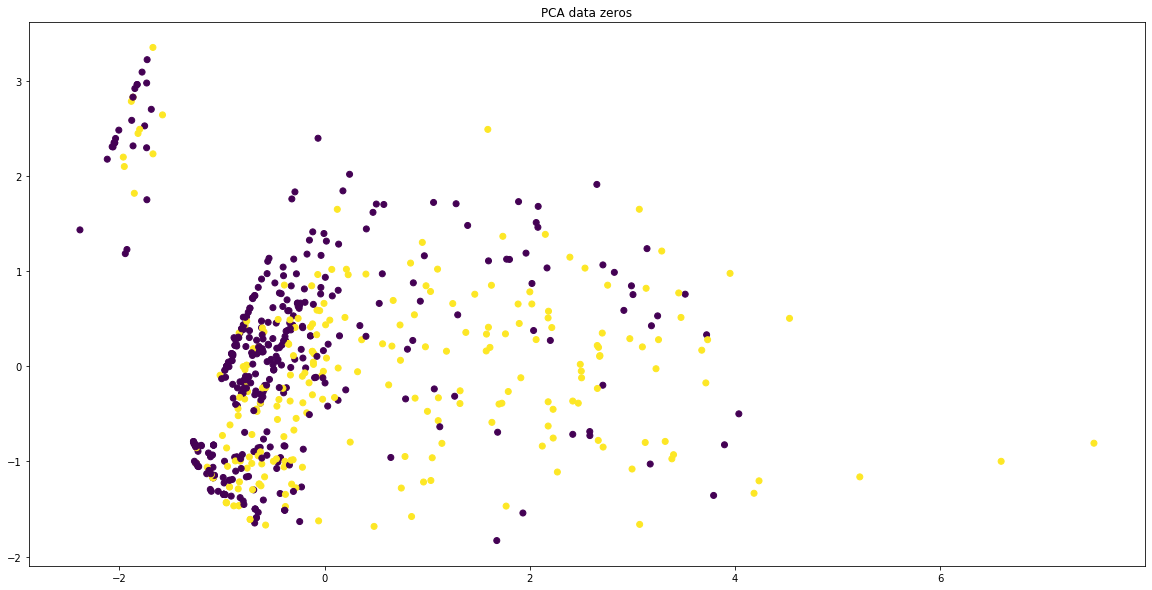

In [352]:
plt.figure(figsize = (20, 10))
plt.scatter(data_pca_zeros[:,0], data_pca_zeros[:,1], c = np.array(y_train))
plt.title("PCA data zeros")
plt.show()

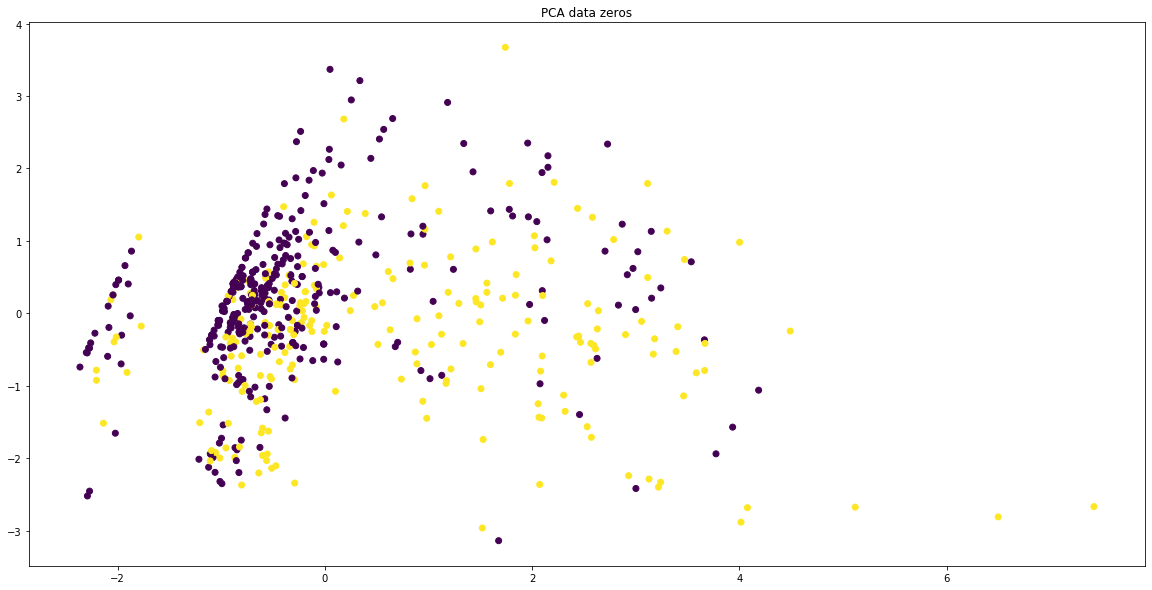

In [353]:
plt.figure(figsize = (20, 10))
plt.scatter(data_pca_mean[:,0], data_pca_mean[:,1], c = np.array(y_train))
plt.title("PCA data zeros")
plt.show()

In [354]:
from sklearn.manifold import TSNE

perplexity: 2
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 623 samples in 0.000s...
[t-SNE] Computed neighbors for 623 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 623 / 623
[t-SNE] Mean sigma: 0.000004
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.706169
[t-SNE] KL divergence after 1000 iterations: 0.398726
perplexity: 5
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 623 samples in 0.001s...
[t-SNE] Computed neighbors for 623 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 623 / 623
[t-SNE] Mean sigma: 0.000109
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.248375
[t-SNE] KL divergence after 1000 iterations: 0.426609
perplexity: 10
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 623 samples in 0.001s...
[t-SNE] Computed neighbors for 623 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 623 / 623
[t-SNE] Mean sigma: 0.09523

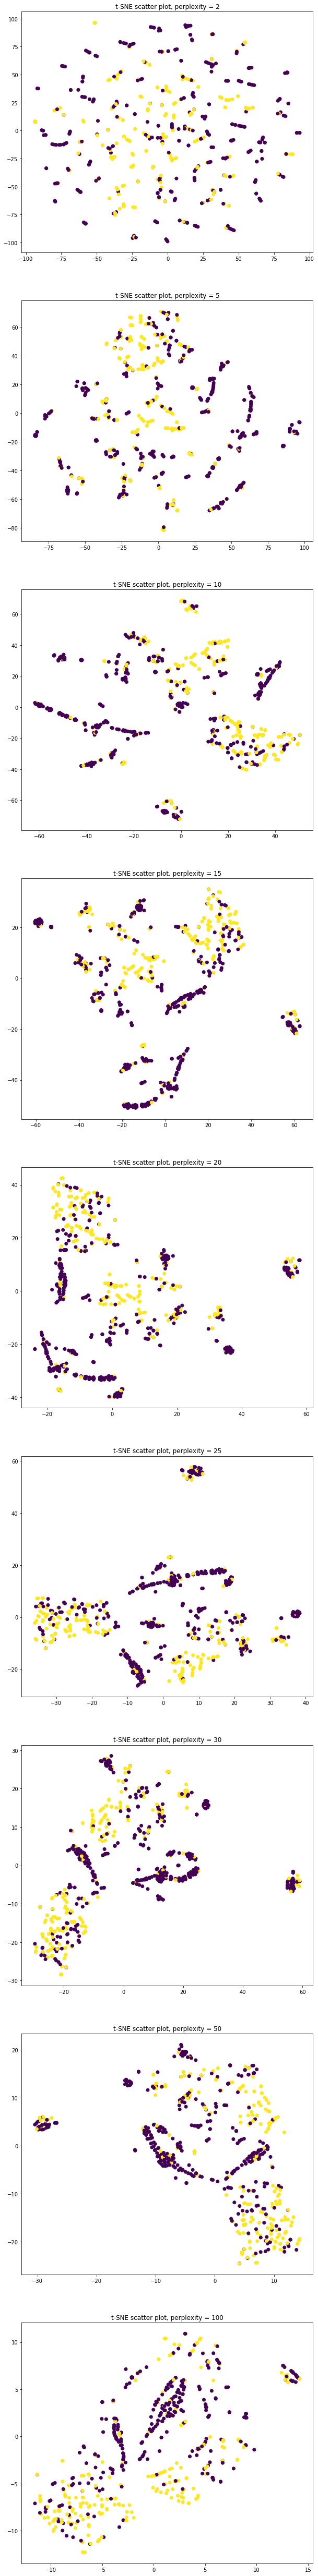

In [355]:
perplexities = [2, 5, 10, 15, 20, 25, 30, 50, 100]

plt.figure(figsize = (10, 10*len(perplexities)))
for i, perplex in enumerate(perplexities):
    print('perplexity: {}'.format(perplex))
    tsne = TSNE(n_components = 2, perplexity = perplex, n_iter = 1000, verbose = 1)
    tsne_2d = tsne.fit_transform(train_data_mean)
    
    plt.subplot(int('{}1{}'.format(len(perplexities), i+1)))
    plt.title('t-SNE scatter plot, perplexity = {}'.format(perplex))
    plt.scatter(tsne_2d[:,0], tsne_2d[:,1], c =np.array(y_train))
plt.show()

perplexity: 2
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 623 samples in 0.000s...
[t-SNE] Computed neighbors for 623 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 623 / 623
[t-SNE] Mean sigma: 0.000004
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.301010
[t-SNE] KL divergence after 1000 iterations: 0.384575
perplexity: 5
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 623 samples in 0.001s...
[t-SNE] Computed neighbors for 623 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 623 / 623
[t-SNE] Mean sigma: 0.000109
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.146439
[t-SNE] KL divergence after 1000 iterations: 0.424583
perplexity: 10
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 623 samples in 0.001s...
[t-SNE] Computed neighbors for 623 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 623 / 623
[t-SNE] Mean sigma: 0.13078

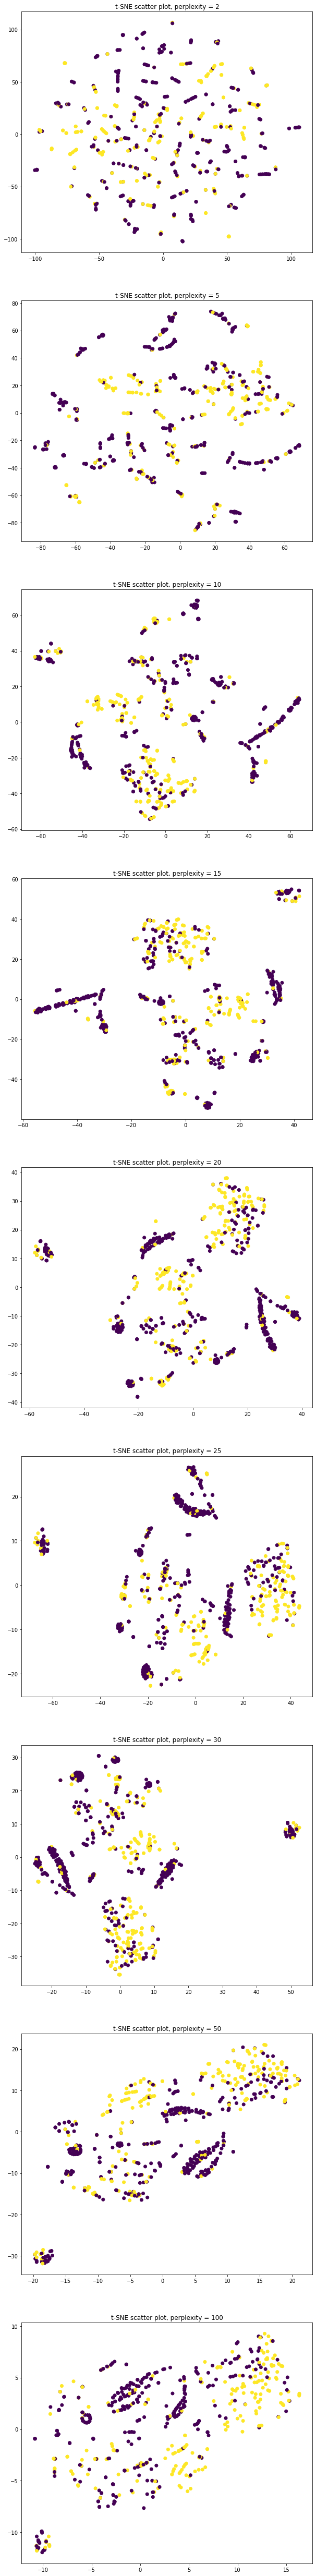

In [356]:
perplexities = [2, 5, 10, 15, 20, 25, 30, 50, 100]

plt.figure(figsize = (10, 10*len(perplexities)))
for i, perplex in enumerate(perplexities):
    print('perplexity: {}'.format(perplex))
    tsne = TSNE(n_components = 2, perplexity = perplex, n_iter = 1000, verbose = 1)
    tsne_2d = tsne.fit_transform(train_data_zeros)
    
    plt.subplot(int('{}1{}'.format(len(perplexities), i+1)))
    plt.title('t-SNE scatter plot, perplexity = {}'.format(perplex))
    plt.scatter(tsne_2d[:,0], tsne_2d[:,1], c =np.array(y_train))
plt.show()

# Let's train

In [17]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import keras

Using plaidml.keras.backend backend.


In [157]:
model = keras.Sequential([
    keras.layers.Dense(50, activation = "softmax"),
    keras.layers.Dense(25, activation='softmax'),
    keras.layers.Dense(10, activation='softmax'),
    keras.layers.Dense(1, activation='softmax')
])

In [158]:
model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = ['accuracy'])

In [165]:
model.fit(train_balanced, y_balanced, epochs= 70)
ans = model.predict(test_data_zeros)
print(ans)
ans[ans >= 0.5] = 1
ans[ans < 0.5] = 0
ans = np.array(ans, dtype = int)
test_acc = metrics.accuracy_score(ans, np.array(y_test))

Epoch 1/70
768/768 [==============================] - 1s 976us/step - loss: 0.5000 - acc: 0.5000
Epoch 2/70
768/768 [==============================] - 0s 231us/step - loss: 0.5000 - acc: 0.5000
Epoch 3/70
768/768 [==============================] - 0s 229us/step - loss: 0.5000 - acc: 0.5000
Epoch 4/70
768/768 [==============================] - 0s 229us/step - loss: 0.5000 - acc: 0.5000
Epoch 5/70
768/768 [==============================] - 0s 231us/step - loss: 0.5000 - acc: 0.5000
Epoch 6/70
768/768 [==============================] - 0s 233us/step - loss: 0.5000 - acc: 0.5000
Epoch 7/70
768/768 [==============================] - 0s 232us/step - loss: 0.5000 - acc: 0.5000
Epoch 8/70
768/768 [==============================] - 0s 230us/step - loss: 0.5000 - acc: 0.5000
Epoch 9/70
768/768 [==============================] - 0s 235us/step - loss: 0.5000 - acc: 0.5000
Epoch 10/70
768/768 [==============================] - 0s 234us/step - loss: 0.5000 - acc: 0.5000
Epoch 11/70
768/768 [========

In [174]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='relu')
])

In [175]:
model.compile(loss='mse',
                optimizer='rmsprop',
                metrics=['mae', 'mse'])

In [176]:
model.fit(train_balanced, y_balanced, epochs= 70)
ans = model.predict(test_data_zeros)
print(ans)
ans[ans >= 0.5] = 1
ans[ans < 0.5] = 0
ans = np.array(ans, dtype = int)
test_acc = metrics.accuracy_score(ans, np.array(y_test))

Epoch 1/70
768/768 [==============================] - 0s 149us/step - loss: 0.6247 - mean_absolute_error: 0.5600 - mean_squared_error: 0.6247
Epoch 2/70
768/768 [==============================] - 0s 139us/step - loss: 0.4985 - mean_absolute_error: 0.5080 - mean_squared_error: 0.4985
Epoch 3/70
768/768 [==============================] - 0s 137us/step - loss: 0.4252 - mean_absolute_error: 0.4838 - mean_squared_error: 0.4252
Epoch 4/70
768/768 [==============================] - 0s 143us/step - loss: 0.3710 - mean_absolute_error: 0.4629 - mean_squared_error: 0.3710
Epoch 5/70
768/768 [==============================] - 0s 140us/step - loss: 0.3296 - mean_absolute_error: 0.4479 - mean_squared_error: 0.3296
Epoch 6/70
768/768 [==============================] - 0s 137us/step - loss: 0.2920 - mean_absolute_error: 0.4262 - mean_squared_error: 0.2920
Epoch 7/70
768/768 [==============================] - 0s 138us/step - loss: 0.2620 - mean_absolute_error: 0.4046 - mean_squared_error: 0.2620
Epoch 

768/768 [==============================] - 0s 137us/step - loss: 0.1276 - mean_absolute_error: 0.2727 - mean_squared_error: 0.1276
Epoch 59/70
768/768 [==============================] - 0s 136us/step - loss: 0.1276 - mean_absolute_error: 0.2703 - mean_squared_error: 0.1276
Epoch 60/70
768/768 [==============================] - 0s 132us/step - loss: 0.1272 - mean_absolute_error: 0.2721 - mean_squared_error: 0.1272
Epoch 61/70
768/768 [==============================] - 0s 134us/step - loss: 0.1271 - mean_absolute_error: 0.2693 - mean_squared_error: 0.1271
Epoch 62/70
768/768 [==============================] - 0s 136us/step - loss: 0.1267 - mean_absolute_error: 0.2646 - mean_squared_error: 0.1267
Epoch 63/70
768/768 [==============================] - 0s 138us/step - loss: 0.1268 - mean_absolute_error: 0.2709 - mean_squared_error: 0.1268
Epoch 64/70
768/768 [==============================] - 0s 141us/step - loss: 0.1263 - mean_absolute_error: 0.2699 - mean_squared_error: 0.1263
Epoch 65/70

In [181]:
ans.reshape(268)
metrics.accuracy_score(ans.reshape(268), np.array(y_test))

0.8283582089552238

In [150]:
acc = []
for epoch in range(1, 200, 1):
    model.fit(train_balanced, y_balanced, epochs= 1)
    ans = model.predict(test_data_zeros)
    ans[ans >= 0.5] = 1
    ans[ans >= 0.5] = 0
    ans = np.array(ans, dtype = int)
    test_acc = metrics.accuracy_score(ans, np.array(y_test))
    acc.append(test_acc)

Epoch 1/1
768/768 [==============================] - 1s 1ms/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 233us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 232us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 234us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 233us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 233us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 230us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 232us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 234us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 228us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [=======================

768/768 [==============================] - 0s 230us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 235us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 227us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 232us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 229us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 229us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 230us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 229us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 231us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 230us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================]

768/768 [==============================] - 0s 251us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 228us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 256us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 229us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 242us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 248us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 227us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 262us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 233us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================] - 0s 246us/step - loss: 0.5000 - acc: 0.5000
Epoch 1/1
768/768 [==============================]

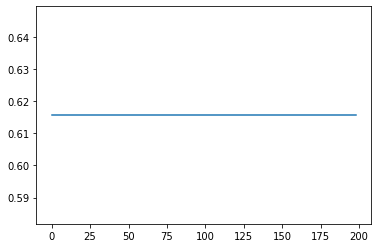

In [152]:
plt.plot(acc)

In [153]:
acc

[0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417910447,
 0.6156716417

In [64]:
max(acc)

0.828358210734467

In [65]:
test_loss, test_acc = model.evaluate(test_data_zeros, np.array(y_test))

268/268 [==============================] - 0s 159us/step


In [66]:
test_acc

0.8097014943165566

In [80]:
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn import tree, metrics
from sklearn import ensemble
from sklearn import neighbors
import xgboost as xgb
import random
from sklearn.ensemble import GradientBoostingClassifier

In [140]:
random_forest = tree.DecisionTreeClassifier()
cross_score_ans_1 = cross_val_score(random_forest, train_balanced, y_balanced, cv = 10)

In [141]:
cross_score_ans_1.mean()

0.8429824561403508

In [142]:
random_forest_2 = ensemble.BaggingClassifier(random_forest, n_estimators = 100)

In [143]:
cross_score_ans_2 = cross_val_score(random_forest_2, train_balanced, y_balanced, cv = 10)

In [144]:
cross_score_ans_2.mean()

0.8584008097165992

In [154]:
random_forest_3 = ensemble.BaggingClassifier(random_forest, n_estimators = 100, max_features = 25)
cross_score_ans_3 = cross_val_score(random_forest_3, train_balanced, y_balanced, cv = 10)

In [155]:
cross_score_ans_3.mean()

0.8597503373819162

In [164]:
random_forest_4 = tree.DecisionTreeClassifier(max_features = 15)
random_forest_4 = ensemble.BaggingClassifier(random_forest_4, n_estimators = 100)
cross_score_ans_4 = cross_val_score(random_forest_4, train_balanced, y_balanced, cv = 10)

In [165]:
cross_score_ans_4.mean()

0.867476383265857

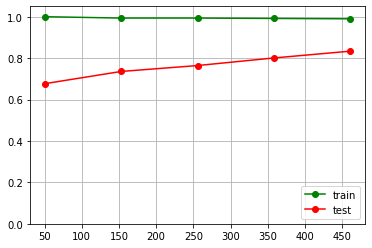

In [167]:
rf_classifier_low_depth = ensemble.RandomForestClassifier(n_estimators = 200, max_depth = 15, random_state = 1)

train_sizes, train_scores, test_scores = learning_curve(rf_classifier_low_depth, train_balanced, y_balanced, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=3, scoring='accuracy')

plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
plt.ylim((0.0, 1.05))
plt.legend(loc='lower right')

In [168]:
cross_score_ans_5 = cross_val_score(rf_classifier_low_depth, train_balanced, y_balanced, cv = 10)

In [169]:
cross_score_ans_5.mean()

0.8596491228070174

In [585]:
%%time
lrs = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.85, 0.87, 0.9, 0.93, 0.95, 0.99]
sc = []
for lr in lrs:
    n_trees = [1] + [i for i in range(10, 100, 5)] 
    xgb_scoring = []
    for n_tree in n_trees:
        estimator = GradientBoostingClassifier(learning_rate=lr)
        score = cross_val_score(estimator, train_balanced, y_balanced, 
                                                 scoring = 'accuracy', cv = 3)    
        xgb_scoring.append(score)
    xgb_scoring = np.asmatrix(xgb_scoring)
    sc.append(xgb_scoring.mean())

CPU times: user 40.5 s, sys: 79.5 ms, total: 40.6 s
Wall time: 40.7 s


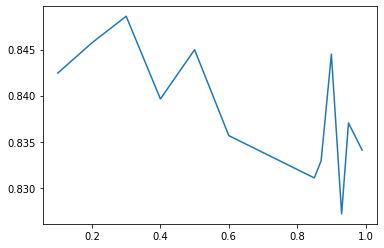

In [586]:
plt.plot(lrs, sc)

In [560]:
class xgb_keras:
    def __init__(self, n_est = 10, params = None, epoch = 20, lr = 0.01):
        self.n_est = n_est
        if params:
            self.layers = params["layers"]
            self.optimizer = params["optimizer"]
            self.metrics = params["metrics"]
            self.epoch = params["epoch"]
            self.lr = params["lr"]
            self.loss = params["loss"]
        else :
            
            self.layers = [[10, "relu"], [1, "relu"]]
            self.optimizer = 'rmsprop'
            self.metrics = ['mae', 'mse']
            self.loss = 'mse'
            self.epoch = epoch
            self.lr = 0.01
        self.models = [self.make_model() for _ in range(self.n_est)]
    
    def make_model(self):
        
        model = keras.Sequential([
                keras.layers.Dense(layer[0], activation = layer[1]) 
                for layer in self.layers
            ])
        
        opt = keras.optimizers.RMSprop(lr = self.lr)
        model.compile(loss=self.loss,
                optimizer=opt,
                metrics=self.metrics)
        return model
        
    def fit(self, X, y):
        pred = y.copy()
        pred = np.array(pred, dtype = float)
        self.models[0].fit(X, y, epochs=self.epoch)
        pred = (self.models[0].predict(X)).reshape(X.shape[0]) - pred
        for i in range(1,self.n_est):
            self.models[i].fit(X, -pred, epochs=self.epoch)
            pred += (self.models[i].predict(X)).reshape(X.shape[0])
        
    def predict(self, X):
        pred = np.zeros(X.shape[0])
        for i in range(self.n_est):
            pred += (self.models[i].predict(X)).reshape(X.shape[0])
            
        pred[pred >= 0.5] = 1
        pred[pred < 0.5] = 0
        return np.array(pred, dtype = int)

In [568]:
class ensemble_for_titanic:
    def __init__(self, n_trees = 10, n_neural = 11, n_xgb = 10, n_neigh = 0, n_grad_boost = 0):
        self.n_trees = n_trees
        self.n_neural = n_neural
        self.n_xgb = n_xgb
        self.n_neigh = n_neigh
        self.n_grad_boost = n_grad_boost
        self.params_tree = {
            "n_est" : [50, 250],
            "max_depth" : [5, 25],
            "size" : [1, 1],
            "f":[1, 1]
        }
        
        self.params_net = {
            "epoches" : [10, 40],
            "size" : [0.9, 1],
            "f":[0.9, 1],
            "n_est" : [10, 30],
            "lr" :[0.008, 0.012]
        }
        self.params_xgb = {
            "lr" : [0.85, 0.95],
            "n_est" : [50, 250],
            "max_depth" : [5, 25],
            "size" : [1, 1],
            "f":[1, 1]
        }
        
        self.params_neigh = {
            "k" : [1, 10],
            "size" : [0.8, 1],
            "f":[0.8, 1]
        }
        
        self.params_grad_boost = {
            "lr" : [0.2, 0.4],
            "n_est" : [100, 250],
            "size" : [1, 1],
            "f":[1, 1]
        }
        
        
    
    def get_param(self, params, tp = None):
        
        res = params[0] + random.random()*(params[1] - params[0])
        if tp:
            res = int(res)
        return res
    
    def get_idx(self,params, size):
        idx = np.linspace(0, size - 1, size, dtype = int)
        random.shuffle(idx)
        bound = self.get_param(params)
        idx = idx[:int(bound*size)]
        return idx
    
    def fit(self, X, y):
        self.models = []
        self.idx = []
        for _ in range(self.n_trees):
            
            n_est = self.get_param(self.params_tree["n_est"] , tp = "int")
            depth = self.get_param(self.params_tree["max_depth"] , tp = "int")
                        
            idx = self.get_idx(self.params_tree["size"], X.shape[0])           
            idx2 = self.get_idx(self.params_tree["f"], X.shape[1])
            self.idx.append(idx2)
                      
            rf_classifier_low_depth = ensemble.RandomForestClassifier(n_estimators = n_est, max_depth = depth)
           
            rf_classifier_low_depth.fit(X[idx,:][:, idx2], y[idx])
            self.models.append(rf_classifier_low_depth)
        
        for _ in range(self.n_neural):
            
            epoch = self.get_param(self.params_net["epoches"] , tp = "int")
            n_est = self.get_param(self.params_net["n_est"] , tp = "int")
            lr = self.get_param(self.params_net["lr"])
            
            model = xgb_keras(n_est = n_est, epoch = epoch, lr = lr)
            
            idx = self.get_idx(self.params_net["size"], X.shape[0])           
            idx2 = self.get_idx(self.params_net["f"], X.shape[1])
            self.idx.append(idx2)
            
            model.fit(X[idx,:][:, idx2], y[idx])
            self.models.append(model)
            
        for _ in range(self.n_xgb):
            lr = self.get_param(self.params_xgb["lr"])
            n_est = self.get_param(self.params_xgb["n_est"] , tp = "int")
            depth = self.get_param(self.params_xgb["max_depth"] , tp = "int")
            
            idx = self.get_idx(self.params_xgb["size"], X.shape[0])           
            idx2 = self.get_idx(self.params_xgb["f"], X.shape[1])
            self.idx.append(idx2)
                
            model = xgb.XGBClassifier(learning_rate=lr, max_depth=depth, n_estimators=n_est, min_child_weight=3)
            model.fit(X[idx,:][:, idx2], y[idx])
            self.models.append(model)
        
        for _ in range(self.n_neigh):
            
            idx = self.get_idx(self.params_neigh["size"], X.shape[0])           
            idx2 = self.get_idx(self.params_neigh["f"], X.shape[1])
            self.idx.append(idx2)
            k = self.get_param(self.params_neigh["k"] , tp = "int")            
            model = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance')
            model.fit(X[idx,:][:, idx2], y[idx])
            self.models.append(model)
            
            
            
        for _ in range(self.n_grad_boost):
            lr = self.get_param(self.params_grad_boost["lr"])
            n_est = self.get_param(self.params_grad_boost["n_est"] , tp = "int")
            
            idx = self.get_idx(self.params_grad_boost["size"], X.shape[0])           
            idx2 = self.get_idx(self.params_grad_boost["f"], X.shape[1])
            self.idx.append(idx2)
            
            model = GradientBoostingClassifier(learning_rate=lr, n_estimators=n_est)
            
            model.fit(X[idx,:][:, idx2], y[idx])
            self.models.append(model)
            
    def predict(self, X):
        prediction = []
        for i in range(self.n_trees):
            X_predicted = self.models[i].predict(X[:,self.idx[i]])
            prediction.append(X_predicted)
    
        for i in range(self.n_neural):
            ans = self.models[i + self.n_trees].predict(X[:,self.idx[i+self.n_trees]])
            prediction.append(ans)
            
        for i in range(self.n_xgb):
            
            ans = self.models[i + self.n_trees + self.n_neural].predict(X[:,self.idx[i+self.n_trees+self.n_neural]])
            
            prediction.append(ans)
            
        for i in range(self.n_neigh):
            
            ans = self.models[i + self.n_trees + self.n_neural + self.n_xgb].predict(X[:,self.idx[i+self.n_trees+self.n_neural+self.n_xgb]])
            
            prediction.append(ans)
            
        for i in range(self.n_grad_boost):
            
            ans = self.models[i + self.n_trees + self.n_neural + self.n_xgb + self.n_neigh].predict(X[:,self.idx[i+self.n_trees+self.n_neural+self.n_xgb + self.n_neigh]])
            
            prediction.append(ans)
            
        return prediction, self.make_prediction(prediction)
    
    
    def make_prediction(self, prediction):
        final = np.zeros(len(prediction[0]))
        prediction = np.array(prediction)
        size = len(prediction[0])
        prediction = prediction.T
        for i in range(size):
            if (prediction[i].mean() > 0.5):
                final[i] = 1
            
            
        
        return final

In [569]:
est = ensemble_for_titanic(n_trees = 10, n_neural = 11, n_xgb = 9, n_neigh= 0, n_grad_boost=11)

In [570]:
# est.fit(np.vstack((train_balanced,test_data_zeros)), np.append(y_balanced,y_test)) #for submission
est.fit(train_data_zeros, np.array(y_train))

Epoch 1/14
606/606 [==============================] - 1s 981us/step - loss: 0.1959 - mean_absolute_error: 0.3455 - mean_squared_error: 0.1959
Epoch 2/14
606/606 [==============================] - 0s 144us/step - loss: 0.1598 - mean_absolute_error: 0.2922 - mean_squared_error: 0.1598
Epoch 3/14
606/606 [==============================] - 0s 145us/step - loss: 0.1488 - mean_absolute_error: 0.2787 - mean_squared_error: 0.1488
Epoch 4/14
606/606 [==============================] - 0s 144us/step - loss: 0.1443 - mean_absolute_error: 0.2646 - mean_squared_error: 0.1443
Epoch 5/14
606/606 [==============================] - 0s 144us/step - loss: 0.1390 - mean_absolute_error: 0.2531 - mean_squared_error: 0.1390
Epoch 6/14
606/606 [==============================] - 0s 144us/step - loss: 0.1384 - mean_absolute_error: 0.2437 - mean_squared_error: 0.1384
Epoch 7/14
606/606 [==============================] - 0s 147us/step - loss: 0.1346 - mean_absolute_error: 0.2460 - mean_squared_error: 0.1346
Epoch 

606/606 [==============================] - 0s 152us/step - loss: 0.1022 - mean_absolute_error: 0.1987 - mean_squared_error: 0.1022
Epoch 3/14
606/606 [==============================] - 0s 143us/step - loss: 0.1017 - mean_absolute_error: 0.1981 - mean_squared_error: 0.1017
Epoch 4/14
606/606 [==============================] - 0s 142us/step - loss: 0.1005 - mean_absolute_error: 0.1973 - mean_squared_error: 0.1005
Epoch 5/14
606/606 [==============================] - 0s 145us/step - loss: 0.1009 - mean_absolute_error: 0.1970 - mean_squared_error: 0.1009
Epoch 6/14
606/606 [==============================] - 0s 147us/step - loss: 0.1007 - mean_absolute_error: 0.1972 - mean_squared_error: 0.1007
Epoch 7/14
606/606 [==============================] - 0s 149us/step - loss: 0.0997 - mean_absolute_error: 0.1935 - mean_squared_error: 0.0997
Epoch 8/14
606/606 [==============================] - 0s 147us/step - loss: 0.0997 - mean_absolute_error: 0.1942 - mean_squared_error: 0.0997
Epoch 9/14
606/60

606/606 [==============================] - 0s 146us/step - loss: 0.0982 - mean_absolute_error: 0.1916 - mean_squared_error: 0.0982
Epoch 4/14
606/606 [==============================] - 0s 143us/step - loss: 0.0982 - mean_absolute_error: 0.1916 - mean_squared_error: 0.0982
Epoch 5/14
606/606 [==============================] - 0s 145us/step - loss: 0.0982 - mean_absolute_error: 0.1916 - mean_squared_error: 0.0982
Epoch 6/14
606/606 [==============================] - 0s 145us/step - loss: 0.0982 - mean_absolute_error: 0.1916 - mean_squared_error: 0.0982
Epoch 7/14
606/606 [==============================] - 0s 148us/step - loss: 0.0982 - mean_absolute_error: 0.1916 - mean_squared_error: 0.0982
Epoch 8/14
606/606 [==============================] - 0s 147us/step - loss: 0.0982 - mean_absolute_error: 0.1916 - mean_squared_error: 0.0982
Epoch 9/14
606/606 [==============================] - 0s 147us/step - loss: 0.0982 - mean_absolute_error: 0.1916 - mean_squared_error: 0.0982
Epoch 10/14
606/6

606/606 [==============================] - 0s 149us/step - loss: 0.0975 - mean_absolute_error: 0.1914 - mean_squared_error: 0.0975
Epoch 5/14
606/606 [==============================] - 0s 147us/step - loss: 0.0975 - mean_absolute_error: 0.1914 - mean_squared_error: 0.0975
Epoch 6/14
606/606 [==============================] - 0s 147us/step - loss: 0.0975 - mean_absolute_error: 0.1914 - mean_squared_error: 0.0975
Epoch 7/14
606/606 [==============================] - 0s 150us/step - loss: 0.0975 - mean_absolute_error: 0.1914 - mean_squared_error: 0.0975
Epoch 8/14
606/606 [==============================] - 0s 149us/step - loss: 0.0975 - mean_absolute_error: 0.1914 - mean_squared_error: 0.0975
Epoch 9/14
606/606 [==============================] - 0s 149us/step - loss: 0.0975 - mean_absolute_error: 0.1914 - mean_squared_error: 0.0975
Epoch 10/14
606/606 [==============================] - 0s 145us/step - loss: 0.0975 - mean_absolute_error: 0.1914 - mean_squared_error: 0.0975
Epoch 11/14
606/

606/606 [==============================] - 0s 147us/step - loss: 0.0964 - mean_absolute_error: 0.1902 - mean_squared_error: 0.0964
Epoch 6/14
606/606 [==============================] - 0s 144us/step - loss: 0.0964 - mean_absolute_error: 0.1902 - mean_squared_error: 0.0964
Epoch 7/14
606/606 [==============================] - 0s 148us/step - loss: 0.0964 - mean_absolute_error: 0.1902 - mean_squared_error: 0.0964
Epoch 8/14
606/606 [==============================] - 0s 150us/step - loss: 0.0964 - mean_absolute_error: 0.1902 - mean_squared_error: 0.0964
Epoch 9/14
606/606 [==============================] - 0s 145us/step - loss: 0.0964 - mean_absolute_error: 0.1902 - mean_squared_error: 0.0964
Epoch 10/14
606/606 [==============================] - 0s 148us/step - loss: 0.0964 - mean_absolute_error: 0.1902 - mean_squared_error: 0.0964
Epoch 11/14
606/606 [==============================] - 0s 146us/step - loss: 0.0964 - mean_absolute_error: 0.1902 - mean_squared_error: 0.0964
Epoch 12/14
606

606/606 [==============================] - 0s 144us/step - loss: 0.0964 - mean_absolute_error: 0.1902 - mean_squared_error: 0.0964
Epoch 7/14
606/606 [==============================] - 0s 142us/step - loss: 0.0964 - mean_absolute_error: 0.1902 - mean_squared_error: 0.0964
Epoch 8/14
606/606 [==============================] - 0s 145us/step - loss: 0.0964 - mean_absolute_error: 0.1902 - mean_squared_error: 0.0964
Epoch 9/14
606/606 [==============================] - 0s 145us/step - loss: 0.0964 - mean_absolute_error: 0.1902 - mean_squared_error: 0.0964
Epoch 10/14
606/606 [==============================] - 0s 145us/step - loss: 0.0964 - mean_absolute_error: 0.1902 - mean_squared_error: 0.0964
Epoch 11/14
606/606 [==============================] - 0s 147us/step - loss: 0.0964 - mean_absolute_error: 0.1902 - mean_squared_error: 0.0964
Epoch 12/14
606/606 [==============================] - 0s 147us/step - loss: 0.0964 - mean_absolute_error: 0.1902 - mean_squared_error: 0.0964
Epoch 13/14
60

569/569 [==============================] - 0s 140us/step - loss: 0.1032 - mean_absolute_error: 0.1770 - mean_squared_error: 0.1032
Epoch 10/20
569/569 [==============================] - 0s 141us/step - loss: 0.1032 - mean_absolute_error: 0.1770 - mean_squared_error: 0.1032
Epoch 11/20
569/569 [==============================] - 0s 142us/step - loss: 0.1032 - mean_absolute_error: 0.1770 - mean_squared_error: 0.1032
Epoch 12/20
569/569 [==============================] - 0s 138us/step - loss: 0.1032 - mean_absolute_error: 0.1770 - mean_squared_error: 0.1032
Epoch 13/20
569/569 [==============================] - 0s 144us/step - loss: 0.1032 - mean_absolute_error: 0.1770 - mean_squared_error: 0.1032
Epoch 14/20
569/569 [==============================] - 0s 148us/step - loss: 0.1032 - mean_absolute_error: 0.1770 - mean_squared_error: 0.1032
Epoch 15/20
569/569 [==============================] - 0s 146us/step - loss: 0.1032 - mean_absolute_error: 0.1770 - mean_squared_error: 0.1032
Epoch 16/20

569/569 [==============================] - 0s 145us/step - loss: 0.0850 - mean_absolute_error: 0.1675 - mean_squared_error: 0.0850
Epoch 7/20
569/569 [==============================] - 0s 147us/step - loss: 0.0850 - mean_absolute_error: 0.1675 - mean_squared_error: 0.0850
Epoch 8/20
569/569 [==============================] - 0s 148us/step - loss: 0.0850 - mean_absolute_error: 0.1675 - mean_squared_error: 0.0850
Epoch 9/20
569/569 [==============================] - 0s 149us/step - loss: 0.0850 - mean_absolute_error: 0.1675 - mean_squared_error: 0.0850
Epoch 10/20
569/569 [==============================] - 0s 147us/step - loss: 0.0850 - mean_absolute_error: 0.1675 - mean_squared_error: 0.0850
Epoch 11/20
569/569 [==============================] - 0s 139us/step - loss: 0.0850 - mean_absolute_error: 0.1675 - mean_squared_error: 0.0850
Epoch 12/20
569/569 [==============================] - 0s 145us/step - loss: 0.0850 - mean_absolute_error: 0.1675 - mean_squared_error: 0.0850
Epoch 13/20
56

569/569 [==============================] - 0s 142us/step - loss: 0.0817 - mean_absolute_error: 0.1597 - mean_squared_error: 0.0817
Epoch 4/20
569/569 [==============================] - 0s 145us/step - loss: 0.0817 - mean_absolute_error: 0.1604 - mean_squared_error: 0.0817
Epoch 5/20
569/569 [==============================] - 0s 145us/step - loss: 0.0821 - mean_absolute_error: 0.1601 - mean_squared_error: 0.0821
Epoch 6/20
569/569 [==============================] - 0s 140us/step - loss: 0.0820 - mean_absolute_error: 0.1600 - mean_squared_error: 0.0820
Epoch 7/20
569/569 [==============================] - 0s 147us/step - loss: 0.0823 - mean_absolute_error: 0.1606 - mean_squared_error: 0.0823
Epoch 8/20
569/569 [==============================] - 0s 147us/step - loss: 0.0822 - mean_absolute_error: 0.1604 - mean_squared_error: 0.0822
Epoch 9/20
569/569 [==============================] - 0s 145us/step - loss: 0.0820 - mean_absolute_error: 0.1598 - mean_squared_error: 0.0820
Epoch 10/20
569/5

569/569 [==============================] - 0s 146us/step - loss: 0.0800 - mean_absolute_error: 0.1574 - mean_squared_error: 0.0800
Epoch 1/20
569/569 [==============================] - 0s 154us/step - loss: 0.0801 - mean_absolute_error: 0.1578 - mean_squared_error: 0.0801
Epoch 2/20
569/569 [==============================] - 0s 146us/step - loss: 0.0800 - mean_absolute_error: 0.1574 - mean_squared_error: 0.0800
Epoch 3/20
569/569 [==============================] - 0s 145us/step - loss: 0.0800 - mean_absolute_error: 0.1574 - mean_squared_error: 0.0800
Epoch 4/20
569/569 [==============================] - 0s 147us/step - loss: 0.0800 - mean_absolute_error: 0.1574 - mean_squared_error: 0.0800
Epoch 5/20
569/569 [==============================] - 0s 147us/step - loss: 0.0800 - mean_absolute_error: 0.1574 - mean_squared_error: 0.0800
Epoch 6/20
569/569 [==============================] - 0s 148us/step - loss: 0.0800 - mean_absolute_error: 0.1574 - mean_squared_error: 0.0800
Epoch 7/20
569/56

566/566 [==============================] - 0s 142us/step - loss: 0.1093 - mean_absolute_error: 0.2164 - mean_squared_error: 0.1093
Epoch 5/11
566/566 [==============================] - 0s 146us/step - loss: 0.1110 - mean_absolute_error: 0.2180 - mean_squared_error: 0.1110
Epoch 6/11
566/566 [==============================] - 0s 142us/step - loss: 0.1087 - mean_absolute_error: 0.2158 - mean_squared_error: 0.1087
Epoch 7/11
566/566 [==============================] - 0s 141us/step - loss: 0.1092 - mean_absolute_error: 0.2158 - mean_squared_error: 0.1092
Epoch 8/11
566/566 [==============================] - 0s 147us/step - loss: 0.1085 - mean_absolute_error: 0.2144 - mean_squared_error: 0.1085
Epoch 9/11
566/566 [==============================] - 0s 147us/step - loss: 0.1098 - mean_absolute_error: 0.2163 - mean_squared_error: 0.1098
Epoch 10/11
566/566 [==============================] - 0s 149us/step - loss: 0.1085 - mean_absolute_error: 0.2147 - mean_squared_error: 0.1085
Epoch 11/11
566/

566/566 [==============================] - 0s 147us/step - loss: 0.1209 - mean_absolute_error: 0.2311 - mean_squared_error: 0.1209
Epoch 7/11
566/566 [==============================] - 0s 147us/step - loss: 0.1209 - mean_absolute_error: 0.2311 - mean_squared_error: 0.1209
Epoch 8/11
566/566 [==============================] - 0s 147us/step - loss: 0.1209 - mean_absolute_error: 0.2311 - mean_squared_error: 0.1209
Epoch 9/11
566/566 [==============================] - 0s 148us/step - loss: 0.1209 - mean_absolute_error: 0.2311 - mean_squared_error: 0.1209
Epoch 10/11
566/566 [==============================] - 0s 145us/step - loss: 0.1209 - mean_absolute_error: 0.2311 - mean_squared_error: 0.1209
Epoch 11/11
566/566 [==============================] - 0s 149us/step - loss: 0.1209 - mean_absolute_error: 0.2311 - mean_squared_error: 0.1209
Epoch 1/11
566/566 [==============================] - 0s 158us/step - loss: 0.1228 - mean_absolute_error: 0.2360 - mean_squared_error: 0.1228
Epoch 2/11
566/

561/561 [==============================] - 0s 146us/step - loss: 0.1122 - mean_absolute_error: 0.2085 - mean_squared_error: 0.1122
Epoch 31/35
561/561 [==============================] - 0s 147us/step - loss: 0.1116 - mean_absolute_error: 0.2149 - mean_squared_error: 0.1116
Epoch 32/35
561/561 [==============================] - 0s 150us/step - loss: 0.1141 - mean_absolute_error: 0.2104 - mean_squared_error: 0.1141
Epoch 33/35
561/561 [==============================] - 0s 151us/step - loss: 0.1102 - mean_absolute_error: 0.2169 - mean_squared_error: 0.1102
Epoch 34/35
561/561 [==============================] - 0s 152us/step - loss: 0.1087 - mean_absolute_error: 0.2158 - mean_squared_error: 0.1087
Epoch 35/35
561/561 [==============================] - 0s 149us/step - loss: 0.1110 - mean_absolute_error: 0.2050 - mean_squared_error: 0.1110
Epoch 1/35
561/561 [==============================] - 0s 151us/step - loss: 0.1953 - mean_absolute_error: 0.2924 - mean_squared_error: 0.1953
Epoch 2/35
5

561/561 [==============================] - 0s 150us/step - loss: 0.1036 - mean_absolute_error: 0.1881 - mean_squared_error: 0.1036
Epoch 18/35
561/561 [==============================] - 0s 146us/step - loss: 0.1023 - mean_absolute_error: 0.1865 - mean_squared_error: 0.1023
Epoch 19/35
561/561 [==============================] - 0s 152us/step - loss: 0.1026 - mean_absolute_error: 0.1856 - mean_squared_error: 0.1026
Epoch 20/35
561/561 [==============================] - 0s 151us/step - loss: 0.1020 - mean_absolute_error: 0.1855 - mean_squared_error: 0.1020
Epoch 21/35
561/561 [==============================] - 0s 149us/step - loss: 0.1019 - mean_absolute_error: 0.1858 - mean_squared_error: 0.1019
Epoch 22/35
561/561 [==============================] - 0s 147us/step - loss: 0.1018 - mean_absolute_error: 0.1849 - mean_squared_error: 0.1018
Epoch 23/35
561/561 [==============================] - 0s 145us/step - loss: 0.1028 - mean_absolute_error: 0.1874 - mean_squared_error: 0.1028
Epoch 24/35

561/561 [==============================] - 0s 150us/step - loss: 0.0893 - mean_absolute_error: 0.1705 - mean_squared_error: 0.0893
Epoch 5/35
561/561 [==============================] - 0s 144us/step - loss: 0.0902 - mean_absolute_error: 0.1720 - mean_squared_error: 0.0902
Epoch 6/35
561/561 [==============================] - 0s 141us/step - loss: 0.0898 - mean_absolute_error: 0.1716 - mean_squared_error: 0.0898
Epoch 7/35
561/561 [==============================] - 0s 143us/step - loss: 0.0879 - mean_absolute_error: 0.1697 - mean_squared_error: 0.0879
Epoch 8/35
561/561 [==============================] - 0s 145us/step - loss: 0.0885 - mean_absolute_error: 0.1703 - mean_squared_error: 0.0885
Epoch 9/35
561/561 [==============================] - 0s 146us/step - loss: 0.0876 - mean_absolute_error: 0.1691 - mean_squared_error: 0.0876
Epoch 10/35
561/561 [==============================] - 0s 152us/step - loss: 0.0877 - mean_absolute_error: 0.1694 - mean_squared_error: 0.0877
Epoch 11/35
561/

561/561 [==============================] - 0s 151us/step - loss: 0.0873 - mean_absolute_error: 0.1680 - mean_squared_error: 0.0873
Epoch 27/35
561/561 [==============================] - 0s 147us/step - loss: 0.0873 - mean_absolute_error: 0.1680 - mean_squared_error: 0.0873
Epoch 28/35
561/561 [==============================] - 0s 143us/step - loss: 0.0873 - mean_absolute_error: 0.1680 - mean_squared_error: 0.0873
Epoch 29/35
561/561 [==============================] - 0s 142us/step - loss: 0.0873 - mean_absolute_error: 0.1680 - mean_squared_error: 0.0873
Epoch 30/35
561/561 [==============================] - 0s 150us/step - loss: 0.0873 - mean_absolute_error: 0.1680 - mean_squared_error: 0.0873
Epoch 31/35
561/561 [==============================] - 0s 151us/step - loss: 0.0873 - mean_absolute_error: 0.1680 - mean_squared_error: 0.0873
Epoch 32/35
561/561 [==============================] - 0s 149us/step - loss: 0.0873 - mean_absolute_error: 0.1680 - mean_squared_error: 0.0873
Epoch 33/35

561/561 [==============================] - 0s 147us/step - loss: 0.0864 - mean_absolute_error: 0.1696 - mean_squared_error: 0.0864
Epoch 14/35
561/561 [==============================] - 0s 148us/step - loss: 0.0857 - mean_absolute_error: 0.1693 - mean_squared_error: 0.0857
Epoch 15/35
561/561 [==============================] - 0s 147us/step - loss: 0.0841 - mean_absolute_error: 0.1711 - mean_squared_error: 0.0841
Epoch 16/35
561/561 [==============================] - 0s 150us/step - loss: 0.0853 - mean_absolute_error: 0.1685 - mean_squared_error: 0.0853
Epoch 17/35
561/561 [==============================] - 0s 148us/step - loss: 0.0842 - mean_absolute_error: 0.1692 - mean_squared_error: 0.0842
Epoch 18/35
561/561 [==============================] - 0s 153us/step - loss: 0.0845 - mean_absolute_error: 0.1681 - mean_squared_error: 0.0845
Epoch 19/35
561/561 [==============================] - 0s 148us/step - loss: 0.0849 - mean_absolute_error: 0.1678 - mean_squared_error: 0.0849
Epoch 20/35

561/561 [==============================] - 0s 143us/step - loss: 0.0834 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0834
Epoch 1/35
561/561 [==============================] - 0s 153us/step - loss: 0.0989 - mean_absolute_error: 0.1862 - mean_squared_error: 0.0989
Epoch 2/35
561/561 [==============================] - 0s 143us/step - loss: 0.0843 - mean_absolute_error: 0.1687 - mean_squared_error: 0.0843
Epoch 3/35
561/561 [==============================] - 0s 139us/step - loss: 0.0834 - mean_absolute_error: 0.1659 - mean_squared_error: 0.0834
Epoch 4/35
561/561 [==============================] - 0s 150us/step - loss: 0.0832 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0832
Epoch 5/35
561/561 [==============================] - 0s 143us/step - loss: 0.0832 - mean_absolute_error: 0.1660 - mean_squared_error: 0.0832
Epoch 6/35
561/561 [==============================] - 0s 146us/step - loss: 0.0829 - mean_absolute_error: 0.1649 - mean_squared_error: 0.0829
Epoch 7/35
561/56

561/561 [==============================] - 0s 148us/step - loss: 0.0834 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0834
Epoch 23/35
561/561 [==============================] - 0s 147us/step - loss: 0.0834 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0834
Epoch 24/35
561/561 [==============================] - 0s 146us/step - loss: 0.0834 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0834
Epoch 25/35
561/561 [==============================] - 0s 149us/step - loss: 0.0834 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0834
Epoch 26/35
561/561 [==============================] - 0s 151us/step - loss: 0.0834 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0834
Epoch 27/35
561/561 [==============================] - 0s 150us/step - loss: 0.0834 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0834
Epoch 28/35
561/561 [==============================] - 0s 150us/step - loss: 0.0834 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0834
Epoch 29/35

561/561 [==============================] - 0s 147us/step - loss: 0.0834 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0834
Epoch 10/35
561/561 [==============================] - 0s 147us/step - loss: 0.0834 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0834
Epoch 11/35
561/561 [==============================] - 0s 140us/step - loss: 0.0834 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0834
Epoch 12/35
561/561 [==============================] - 0s 142us/step - loss: 0.0834 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0834
Epoch 13/35
561/561 [==============================] - 0s 142us/step - loss: 0.0834 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0834
Epoch 14/35
561/561 [==============================] - 0s 147us/step - loss: 0.0834 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0834
Epoch 15/35
561/561 [==============================] - 0s 151us/step - loss: 0.0834 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0834
Epoch 16/35

561/561 [==============================] - 0s 148us/step - loss: 0.0834 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0834
Epoch 32/35
561/561 [==============================] - 0s 150us/step - loss: 0.0834 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0834
Epoch 33/35
561/561 [==============================] - 0s 144us/step - loss: 0.0834 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0834
Epoch 34/35
561/561 [==============================] - 0s 142us/step - loss: 0.0834 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0834
Epoch 35/35
561/561 [==============================] - 0s 149us/step - loss: 0.0834 - mean_absolute_error: 0.1658 - mean_squared_error: 0.0834
Epoch 1/37
608/608 [==============================] - 0s 149us/step - loss: 0.2218 - mean_absolute_error: 0.3851 - mean_squared_error: 0.2218
Epoch 2/37
608/608 [==============================] - 0s 143us/step - loss: 0.1639 - mean_absolute_error: 0.3174 - mean_squared_error: 0.1639
Epoch 3/37
60

608/608 [==============================] - 0s 145us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 17/37
608/608 [==============================] - 0s 143us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 18/37
608/608 [==============================] - 0s 142us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 19/37
608/608 [==============================] - 0s 146us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 20/37
608/608 [==============================] - 0s 146us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 21/37
608/608 [==============================] - 0s 148us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 22/37
608/608 [==============================] - 0s 145us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 23/37

608/608 [==============================] - 0s 145us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 37/37
608/608 [==============================] - 0s 146us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 1/37
608/608 [==============================] - 0s 148us/step - loss: 0.0841 - mean_absolute_error: 0.1856 - mean_squared_error: 0.0841
Epoch 2/37
608/608 [==============================] - 0s 141us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 3/37
608/608 [==============================] - 0s 137us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 4/37
608/608 [==============================] - 0s 141us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 5/37
608/608 [==============================] - 0s 147us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 6/37
608/6

608/608 [==============================] - 0s 143us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 20/37
608/608 [==============================] - 0s 147us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 21/37
608/608 [==============================] - 0s 145us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 22/37
608/608 [==============================] - 0s 146us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 23/37
608/608 [==============================] - 0s 144us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 24/37
608/608 [==============================] - 0s 145us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 25/37
608/608 [==============================] - 0s 144us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 26/37

608/608 [==============================] - 0s 143us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 3/37
608/608 [==============================] - 0s 144us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 4/37
608/608 [==============================] - 0s 143us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 5/37
608/608 [==============================] - 0s 146us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 6/37
608/608 [==============================] - 0s 143us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 7/37
608/608 [==============================] - 0s 147us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 8/37
608/608 [==============================] - 0s 149us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 9/37
608/60

608/608 [==============================] - 0s 145us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 23/37
608/608 [==============================] - 0s 143us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 24/37
608/608 [==============================] - 0s 145us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 25/37
608/608 [==============================] - 0s 147us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 26/37
608/608 [==============================] - 0s 147us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 27/37
608/608 [==============================] - 0s 146us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 28/37
608/608 [==============================] - 0s 145us/step - loss: 0.0848 - mean_absolute_error: 0.1854 - mean_squared_error: 0.0848
Epoch 29/37

608/608 [==============================] - 0s 144us/step - loss: 0.0847 - mean_absolute_error: 0.1850 - mean_squared_error: 0.0847
Epoch 6/37
608/608 [==============================] - 0s 142us/step - loss: 0.0847 - mean_absolute_error: 0.1851 - mean_squared_error: 0.0847
Epoch 7/37
608/608 [==============================] - 0s 147us/step - loss: 0.0849 - mean_absolute_error: 0.1855 - mean_squared_error: 0.0849
Epoch 8/37
608/608 [==============================] - 0s 145us/step - loss: 0.0848 - mean_absolute_error: 0.1853 - mean_squared_error: 0.0848
Epoch 9/37
608/608 [==============================] - 0s 141us/step - loss: 0.0847 - mean_absolute_error: 0.1851 - mean_squared_error: 0.0847
Epoch 10/37
608/608 [==============================] - 0s 143us/step - loss: 0.0848 - mean_absolute_error: 0.1853 - mean_squared_error: 0.0848
Epoch 11/37
608/608 [==============================] - 0s 141us/step - loss: 0.0848 - mean_absolute_error: 0.1855 - mean_squared_error: 0.0848
Epoch 12/37
608

608/608 [==============================] - 0s 142us/step - loss: 0.0847 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0847
Epoch 26/37
608/608 [==============================] - 0s 143us/step - loss: 0.0847 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0847
Epoch 27/37
608/608 [==============================] - 0s 140us/step - loss: 0.0847 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0847
Epoch 28/37
608/608 [==============================] - 0s 138us/step - loss: 0.0847 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0847
Epoch 29/37
608/608 [==============================] - 0s 139us/step - loss: 0.0847 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0847
Epoch 30/37
608/608 [==============================] - 0s 139us/step - loss: 0.0847 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0847
Epoch 31/37
608/608 [==============================] - 0s 139us/step - loss: 0.0847 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0847
Epoch 32/37

608/608 [==============================] - 0s 141us/step - loss: 0.0847 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0847
Epoch 9/37
608/608 [==============================] - 0s 142us/step - loss: 0.0847 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0847
Epoch 10/37
608/608 [==============================] - 0s 141us/step - loss: 0.0847 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0847
Epoch 11/37
608/608 [==============================] - 0s 141us/step - loss: 0.0847 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0847
Epoch 12/37
608/608 [==============================] - 0s 143us/step - loss: 0.0847 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0847
Epoch 13/37
608/608 [==============================] - 0s 141us/step - loss: 0.0847 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0847
Epoch 14/37
608/608 [==============================] - 0s 141us/step - loss: 0.0847 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0847
Epoch 15/37


608/608 [==============================] - 0s 141us/step - loss: 0.0847 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0847
Epoch 29/37
608/608 [==============================] - 0s 138us/step - loss: 0.0847 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0847
Epoch 30/37
608/608 [==============================] - 0s 139us/step - loss: 0.0847 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0847
Epoch 31/37
608/608 [==============================] - 0s 138us/step - loss: 0.0847 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0847
Epoch 32/37
608/608 [==============================] - 0s 148us/step - loss: 0.0847 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0847
Epoch 33/37
608/608 [==============================] - 0s 139us/step - loss: 0.0847 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0847
Epoch 34/37
608/608 [==============================] - 0s 141us/step - loss: 0.0847 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0847
Epoch 35/37

607/607 [==============================] - 0s 139us/step - loss: 0.1253 - mean_absolute_error: 0.2382 - mean_squared_error: 0.1253
Epoch 12/36
607/607 [==============================] - 0s 145us/step - loss: 0.1254 - mean_absolute_error: 0.2374 - mean_squared_error: 0.1254
Epoch 13/36
607/607 [==============================] - 0s 145us/step - loss: 0.1240 - mean_absolute_error: 0.2418 - mean_squared_error: 0.1240
Epoch 14/36
607/607 [==============================] - 0s 140us/step - loss: 0.1268 - mean_absolute_error: 0.2404 - mean_squared_error: 0.1268
Epoch 15/36
607/607 [==============================] - 0s 144us/step - loss: 0.1205 - mean_absolute_error: 0.2363 - mean_squared_error: 0.1205
Epoch 16/36
607/607 [==============================] - 0s 149us/step - loss: 0.1210 - mean_absolute_error: 0.2388 - mean_squared_error: 0.1210
Epoch 17/36
607/607 [==============================] - 0s 138us/step - loss: 0.1252 - mean_absolute_error: 0.2337 - mean_squared_error: 0.1252
Epoch 18/36

607/607 [==============================] - 0s 146us/step - loss: 0.1007 - mean_absolute_error: 0.1952 - mean_squared_error: 0.1007
Epoch 33/36
607/607 [==============================] - 0s 147us/step - loss: 0.1007 - mean_absolute_error: 0.1952 - mean_squared_error: 0.1007
Epoch 34/36
607/607 [==============================] - 0s 148us/step - loss: 0.1007 - mean_absolute_error: 0.1952 - mean_squared_error: 0.1007
Epoch 35/36
607/607 [==============================] - 0s 145us/step - loss: 0.1007 - mean_absolute_error: 0.1952 - mean_squared_error: 0.1007
Epoch 36/36
607/607 [==============================] - 0s 147us/step - loss: 0.1007 - mean_absolute_error: 0.1952 - mean_squared_error: 0.1007
Epoch 1/36
607/607 [==============================] - 0s 156us/step - loss: 0.1250 - mean_absolute_error: 0.2357 - mean_squared_error: 0.1250
Epoch 2/36
607/607 [==============================] - 0s 144us/step - loss: 0.1011 - mean_absolute_error: 0.1996 - mean_squared_error: 0.1011
Epoch 3/36
60

607/607 [==============================] - 0s 148us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 18/36
607/607 [==============================] - 0s 148us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 19/36
607/607 [==============================] - 0s 146us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 20/36
607/607 [==============================] - 0s 148us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 21/36
607/607 [==============================] - 0s 148us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 22/36
607/607 [==============================] - 0s 145us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 23/36
607/607 [==============================] - 0s 146us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 24/36

607/607 [==============================] - 0s 147us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 3/36
607/607 [==============================] - 0s 139us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 4/36
607/607 [==============================] - 0s 141us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 5/36
607/607 [==============================] - 0s 150us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 6/36
607/607 [==============================] - 0s 142us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 7/36
607/607 [==============================] - 0s 140us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 8/36
607/607 [==============================] - 0s 144us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 9/36
607/60

607/607 [==============================] - 0s 150us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 24/36
607/607 [==============================] - 0s 145us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 25/36
607/607 [==============================] - 0s 147us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 26/36
607/607 [==============================] - 0s 146us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 27/36
607/607 [==============================] - 0s 147us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 28/36
607/607 [==============================] - 0s 147us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 29/36
607/607 [==============================] - 0s 148us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 30/36

607/607 [==============================] - 0s 142us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 9/36
607/607 [==============================] - 0s 145us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 10/36
607/607 [==============================] - 0s 143us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 11/36
607/607 [==============================] - 0s 148us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 12/36
607/607 [==============================] - 0s 138us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 13/36
607/607 [==============================] - 0s 146us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 14/36
607/607 [==============================] - 0s 146us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 15/36


607/607 [==============================] - 0s 139us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 30/36
607/607 [==============================] - 0s 138us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 31/36
607/607 [==============================] - 0s 141us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 32/36
607/607 [==============================] - 0s 147us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 33/36
607/607 [==============================] - 0s 146us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 34/36
607/607 [==============================] - 0s 137us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 35/36
607/607 [==============================] - 0s 143us/step - loss: 0.1004 - mean_absolute_error: 0.1947 - mean_squared_error: 0.1004
Epoch 36/36

607/607 [==============================] - 0s 142us/step - loss: 0.1003 - mean_absolute_error: 0.1945 - mean_squared_error: 0.1003
Epoch 15/36
607/607 [==============================] - 0s 137us/step - loss: 0.1003 - mean_absolute_error: 0.1945 - mean_squared_error: 0.1003
Epoch 16/36
607/607 [==============================] - 0s 140us/step - loss: 0.1003 - mean_absolute_error: 0.1945 - mean_squared_error: 0.1003
Epoch 17/36
607/607 [==============================] - 0s 144us/step - loss: 0.1003 - mean_absolute_error: 0.1945 - mean_squared_error: 0.1003
Epoch 18/36
607/607 [==============================] - 0s 147us/step - loss: 0.1003 - mean_absolute_error: 0.1945 - mean_squared_error: 0.1003
Epoch 19/36
607/607 [==============================] - 0s 151us/step - loss: 0.1003 - mean_absolute_error: 0.1945 - mean_squared_error: 0.1003
Epoch 20/36
607/607 [==============================] - 0s 137us/step - loss: 0.1003 - mean_absolute_error: 0.1945 - mean_squared_error: 0.1003
Epoch 21/36

607/607 [==============================] - 0s 135us/step - loss: 0.1003 - mean_absolute_error: 0.1945 - mean_squared_error: 0.1003
Epoch 36/36
607/607 [==============================] - 0s 144us/step - loss: 0.1003 - mean_absolute_error: 0.1945 - mean_squared_error: 0.1003
Epoch 1/36
607/607 [==============================] - 0s 145us/step - loss: 0.1007 - mean_absolute_error: 0.1966 - mean_squared_error: 0.1007
Epoch 2/36
607/607 [==============================] - 0s 144us/step - loss: 0.1003 - mean_absolute_error: 0.1945 - mean_squared_error: 0.1003
Epoch 3/36
607/607 [==============================] - 0s 140us/step - loss: 0.1003 - mean_absolute_error: 0.1945 - mean_squared_error: 0.1003
Epoch 4/36
607/607 [==============================] - 0s 137us/step - loss: 0.1003 - mean_absolute_error: 0.1945 - mean_squared_error: 0.1003
Epoch 5/36
607/607 [==============================] - 0s 140us/step - loss: 0.1003 - mean_absolute_error: 0.1945 - mean_squared_error: 0.1003
Epoch 6/36
607/6

607/607 [==============================] - 0s 150us/step - loss: 0.1003 - mean_absolute_error: 0.1945 - mean_squared_error: 0.1003
Epoch 21/36
607/607 [==============================] - 0s 140us/step - loss: 0.1003 - mean_absolute_error: 0.1945 - mean_squared_error: 0.1003
Epoch 22/36
607/607 [==============================] - 0s 139us/step - loss: 0.1003 - mean_absolute_error: 0.1945 - mean_squared_error: 0.1003
Epoch 23/36
607/607 [==============================] - 0s 148us/step - loss: 0.1003 - mean_absolute_error: 0.1945 - mean_squared_error: 0.1003
Epoch 24/36
607/607 [==============================] - 0s 151us/step - loss: 0.1003 - mean_absolute_error: 0.1945 - mean_squared_error: 0.1003
Epoch 25/36
607/607 [==============================] - 0s 151us/step - loss: 0.1003 - mean_absolute_error: 0.1945 - mean_squared_error: 0.1003
Epoch 26/36
607/607 [==============================] - 0s 136us/step - loss: 0.1003 - mean_absolute_error: 0.1945 - mean_squared_error: 0.1003
Epoch 27/36

607/607 [==============================] - 0s 137us/step - loss: 0.1010 - mean_absolute_error: 0.1956 - mean_squared_error: 0.1010
Epoch 6/36
607/607 [==============================] - 0s 143us/step - loss: 0.1003 - mean_absolute_error: 0.1954 - mean_squared_error: 0.1003
Epoch 7/36
607/607 [==============================] - 0s 146us/step - loss: 0.0999 - mean_absolute_error: 0.1937 - mean_squared_error: 0.0999
Epoch 8/36
607/607 [==============================] - 0s 140us/step - loss: 0.1004 - mean_absolute_error: 0.1950 - mean_squared_error: 0.1004
Epoch 9/36
607/607 [==============================] - 0s 136us/step - loss: 0.1001 - mean_absolute_error: 0.1943 - mean_squared_error: 0.1001
Epoch 10/36
607/607 [==============================] - 0s 137us/step - loss: 0.1002 - mean_absolute_error: 0.1943 - mean_squared_error: 0.1002
Epoch 11/36
607/607 [==============================] - 0s 139us/step - loss: 0.0998 - mean_absolute_error: 0.1934 - mean_squared_error: 0.0998
Epoch 12/36
607

607/607 [==============================] - 0s 136us/step - loss: 0.0998 - mean_absolute_error: 0.1935 - mean_squared_error: 0.0998
Epoch 27/36
607/607 [==============================] - 0s 138us/step - loss: 0.0998 - mean_absolute_error: 0.1935 - mean_squared_error: 0.0998
Epoch 28/36
607/607 [==============================] - 0s 135us/step - loss: 0.0998 - mean_absolute_error: 0.1935 - mean_squared_error: 0.0998
Epoch 29/36
607/607 [==============================] - 0s 138us/step - loss: 0.0998 - mean_absolute_error: 0.1935 - mean_squared_error: 0.0998
Epoch 30/36
607/607 [==============================] - 0s 138us/step - loss: 0.0998 - mean_absolute_error: 0.1935 - mean_squared_error: 0.0998
Epoch 31/36
607/607 [==============================] - 0s 136us/step - loss: 0.0998 - mean_absolute_error: 0.1935 - mean_squared_error: 0.0998
Epoch 32/36
607/607 [==============================] - 0s 152us/step - loss: 0.0998 - mean_absolute_error: 0.1935 - mean_squared_error: 0.0998
Epoch 33/36

607/607 [==============================] - 0s 137us/step - loss: 0.0994 - mean_absolute_error: 0.1928 - mean_squared_error: 0.0994
Epoch 12/36
607/607 [==============================] - 0s 145us/step - loss: 0.0994 - mean_absolute_error: 0.1928 - mean_squared_error: 0.0994
Epoch 13/36
607/607 [==============================] - 0s 144us/step - loss: 0.0994 - mean_absolute_error: 0.1928 - mean_squared_error: 0.0994
Epoch 14/36
607/607 [==============================] - 0s 145us/step - loss: 0.0994 - mean_absolute_error: 0.1928 - mean_squared_error: 0.0994
Epoch 15/36
607/607 [==============================] - 0s 142us/step - loss: 0.0994 - mean_absolute_error: 0.1928 - mean_squared_error: 0.0994
Epoch 16/36
607/607 [==============================] - 0s 146us/step - loss: 0.0994 - mean_absolute_error: 0.1928 - mean_squared_error: 0.0994
Epoch 17/36
607/607 [==============================] - 0s 149us/step - loss: 0.0994 - mean_absolute_error: 0.1928 - mean_squared_error: 0.0994
Epoch 18/36

592/592 [==============================] - 0s 149us/step - loss: 0.1168 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1168
Epoch 14/19
592/592 [==============================] - 0s 140us/step - loss: 0.1168 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1168
Epoch 15/19
592/592 [==============================] - 0s 151us/step - loss: 0.1168 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1168
Epoch 16/19
592/592 [==============================] - 0s 150us/step - loss: 0.1168 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1168
Epoch 17/19
592/592 [==============================] - 0s 142us/step - loss: 0.1168 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1168
Epoch 18/19
592/592 [==============================] - 0s 144us/step - loss: 0.1168 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1168
Epoch 19/19
592/592 [==============================] - 0s 146us/step - loss: 0.1168 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1168
Epoch 1/19


592/592 [==============================] - 0s 152us/step - loss: 0.1168 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1168
Epoch 14/19
592/592 [==============================] - 0s 148us/step - loss: 0.1168 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1168
Epoch 15/19
592/592 [==============================] - 0s 139us/step - loss: 0.1168 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1168
Epoch 16/19
592/592 [==============================] - 0s 149us/step - loss: 0.1168 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1168
Epoch 17/19
592/592 [==============================] - 0s 148us/step - loss: 0.1168 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1168
Epoch 18/19
592/592 [==============================] - 0s 150us/step - loss: 0.1168 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1168
Epoch 19/19
592/592 [==============================] - 0s 145us/step - loss: 0.1168 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1168
Epoch 1/19


592/592 [==============================] - 0s 146us/step - loss: 0.1168 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1168
Epoch 14/19
592/592 [==============================] - 0s 143us/step - loss: 0.1168 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1168
Epoch 15/19
592/592 [==============================] - 0s 143us/step - loss: 0.1168 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1168
Epoch 16/19
592/592 [==============================] - 0s 141us/step - loss: 0.1168 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1168
Epoch 17/19
592/592 [==============================] - 0s 139us/step - loss: 0.1168 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1168
Epoch 18/19
592/592 [==============================] - 0s 148us/step - loss: 0.1168 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1168
Epoch 19/19
592/592 [==============================] - 0s 150us/step - loss: 0.1168 - mean_absolute_error: 0.2471 - mean_squared_error: 0.1168
Epoch 1/19


Epoch 2/11
605/605 [==============================] - 0s 149us/step - loss: 0.1174 - mean_absolute_error: 0.2090 - mean_squared_error: 0.1174
Epoch 3/11
605/605 [==============================] - 0s 144us/step - loss: 0.1167 - mean_absolute_error: 0.2087 - mean_squared_error: 0.1167
Epoch 4/11
605/605 [==============================] - 0s 142us/step - loss: 0.1157 - mean_absolute_error: 0.2089 - mean_squared_error: 0.1157
Epoch 5/11
605/605 [==============================] - 0s 138us/step - loss: 0.1161 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1161
Epoch 6/11
605/605 [==============================] - 0s 143us/step - loss: 0.1147 - mean_absolute_error: 0.2065 - mean_squared_error: 0.1147
Epoch 7/11
605/605 [==============================] - 0s 150us/step - loss: 0.1146 - mean_absolute_error: 0.2058 - mean_squared_error: 0.1146
Epoch 8/11
605/605 [==============================] - 0s 148us/step - loss: 0.1140 - mean_absolute_error: 0.2039 - mean_squared_error: 0.1140
Epoch 

605/605 [==============================] - 0s 142us/step - loss: 0.1032 - mean_absolute_error: 0.1923 - mean_squared_error: 0.1032
Epoch 5/11
605/605 [==============================] - 0s 145us/step - loss: 0.1031 - mean_absolute_error: 0.1928 - mean_squared_error: 0.1031
Epoch 6/11
605/605 [==============================] - 0s 148us/step - loss: 0.1032 - mean_absolute_error: 0.1916 - mean_squared_error: 0.1032
Epoch 7/11
605/605 [==============================] - 0s 140us/step - loss: 0.1032 - mean_absolute_error: 0.1913 - mean_squared_error: 0.1032
Epoch 8/11
605/605 [==============================] - 0s 145us/step - loss: 0.1032 - mean_absolute_error: 0.1912 - mean_squared_error: 0.1032
Epoch 9/11
605/605 [==============================] - 0s 145us/step - loss: 0.1033 - mean_absolute_error: 0.1923 - mean_squared_error: 0.1033
Epoch 10/11
605/605 [==============================] - 0s 143us/step - loss: 0.1033 - mean_absolute_error: 0.1916 - mean_squared_error: 0.1033
Epoch 11/11
605/

562/562 [==============================] - 0s 145us/step - loss: 0.1207 - mean_absolute_error: 0.2178 - mean_squared_error: 0.1207
Epoch 18/28
562/562 [==============================] - 0s 146us/step - loss: 0.1183 - mean_absolute_error: 0.2129 - mean_squared_error: 0.1183
Epoch 19/28
562/562 [==============================] - 0s 146us/step - loss: 0.1156 - mean_absolute_error: 0.2081 - mean_squared_error: 0.1156
Epoch 20/28
562/562 [==============================] - 0s 150us/step - loss: 0.1184 - mean_absolute_error: 0.2159 - mean_squared_error: 0.1184
Epoch 21/28
562/562 [==============================] - 0s 149us/step - loss: 0.1165 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1165
Epoch 22/28
562/562 [==============================] - 0s 145us/step - loss: 0.1135 - mean_absolute_error: 0.2068 - mean_squared_error: 0.1135
Epoch 23/28
562/562 [==============================] - 0s 145us/step - loss: 0.1154 - mean_absolute_error: 0.2103 - mean_squared_error: 0.1154
Epoch 24/28

562/562 [==============================] - 0s 139us/step - loss: 0.1018 - mean_absolute_error: 0.1820 - mean_squared_error: 0.1018
Epoch 19/28
562/562 [==============================] - 0s 151us/step - loss: 0.1018 - mean_absolute_error: 0.1820 - mean_squared_error: 0.1018
Epoch 20/28
562/562 [==============================] - 0s 146us/step - loss: 0.1018 - mean_absolute_error: 0.1820 - mean_squared_error: 0.1018
Epoch 21/28
562/562 [==============================] - 0s 148us/step - loss: 0.1018 - mean_absolute_error: 0.1820 - mean_squared_error: 0.1018
Epoch 22/28
562/562 [==============================] - 0s 152us/step - loss: 0.1018 - mean_absolute_error: 0.1820 - mean_squared_error: 0.1018
Epoch 23/28
562/562 [==============================] - 0s 149us/step - loss: 0.1018 - mean_absolute_error: 0.1820 - mean_squared_error: 0.1018
Epoch 24/28
562/562 [==============================] - 0s 152us/step - loss: 0.1018 - mean_absolute_error: 0.1820 - mean_squared_error: 0.1018
Epoch 25/28

562/562 [==============================] - 0s 140us/step - loss: 0.1018 - mean_absolute_error: 0.1820 - mean_squared_error: 0.1018
Epoch 20/28
562/562 [==============================] - 0s 138us/step - loss: 0.1018 - mean_absolute_error: 0.1820 - mean_squared_error: 0.1018
Epoch 21/28
562/562 [==============================] - 0s 143us/step - loss: 0.1018 - mean_absolute_error: 0.1820 - mean_squared_error: 0.1018
Epoch 22/28
562/562 [==============================] - 0s 146us/step - loss: 0.1018 - mean_absolute_error: 0.1820 - mean_squared_error: 0.1018
Epoch 23/28
562/562 [==============================] - 0s 140us/step - loss: 0.1018 - mean_absolute_error: 0.1820 - mean_squared_error: 0.1018
Epoch 24/28
562/562 [==============================] - 0s 138us/step - loss: 0.1018 - mean_absolute_error: 0.1820 - mean_squared_error: 0.1018
Epoch 25/28
562/562 [==============================] - 0s 149us/step - loss: 0.1018 - mean_absolute_error: 0.1820 - mean_squared_error: 0.1018
Epoch 26/28

562/562 [==============================] - 0s 142us/step - loss: 0.1018 - mean_absolute_error: 0.1820 - mean_squared_error: 0.1018
Epoch 21/28
562/562 [==============================] - 0s 139us/step - loss: 0.1018 - mean_absolute_error: 0.1820 - mean_squared_error: 0.1018
Epoch 22/28
562/562 [==============================] - 0s 145us/step - loss: 0.1018 - mean_absolute_error: 0.1820 - mean_squared_error: 0.1018
Epoch 23/28
562/562 [==============================] - 0s 154us/step - loss: 0.1018 - mean_absolute_error: 0.1820 - mean_squared_error: 0.1018
Epoch 24/28
562/562 [==============================] - 0s 151us/step - loss: 0.1018 - mean_absolute_error: 0.1820 - mean_squared_error: 0.1018
Epoch 25/28
562/562 [==============================] - 0s 151us/step - loss: 0.1018 - mean_absolute_error: 0.1820 - mean_squared_error: 0.1018
Epoch 26/28
562/562 [==============================] - 0s 150us/step - loss: 0.1018 - mean_absolute_error: 0.1820 - mean_squared_error: 0.1018
Epoch 27/28

562/562 [==============================] - 0s 138us/step - loss: 0.1012 - mean_absolute_error: 0.1805 - mean_squared_error: 0.1012
Epoch 22/28
562/562 [==============================] - 0s 142us/step - loss: 0.1007 - mean_absolute_error: 0.1802 - mean_squared_error: 0.1007
Epoch 23/28
562/562 [==============================] - 0s 140us/step - loss: 0.1006 - mean_absolute_error: 0.1793 - mean_squared_error: 0.1006
Epoch 24/28
562/562 [==============================] - 0s 152us/step - loss: 0.1008 - mean_absolute_error: 0.1802 - mean_squared_error: 0.1008
Epoch 25/28
562/562 [==============================] - 0s 150us/step - loss: 0.1006 - mean_absolute_error: 0.1795 - mean_squared_error: 0.1006
Epoch 26/28
562/562 [==============================] - 0s 151us/step - loss: 0.1006 - mean_absolute_error: 0.1805 - mean_squared_error: 0.1006
Epoch 27/28
562/562 [==============================] - 0s 144us/step - loss: 0.1011 - mean_absolute_error: 0.1804 - mean_squared_error: 0.1011
Epoch 28/28

562/562 [==============================] - 0s 141us/step - loss: 0.0876 - mean_absolute_error: 0.1749 - mean_squared_error: 0.0876
Epoch 23/28
562/562 [==============================] - 0s 140us/step - loss: 0.0878 - mean_absolute_error: 0.1750 - mean_squared_error: 0.0878
Epoch 24/28
562/562 [==============================] - 0s 140us/step - loss: 0.0877 - mean_absolute_error: 0.1752 - mean_squared_error: 0.0877
Epoch 25/28
562/562 [==============================] - 0s 143us/step - loss: 0.0881 - mean_absolute_error: 0.1752 - mean_squared_error: 0.0881
Epoch 26/28
562/562 [==============================] - 0s 149us/step - loss: 0.0876 - mean_absolute_error: 0.1750 - mean_squared_error: 0.0876
Epoch 27/28
562/562 [==============================] - 0s 147us/step - loss: 0.0875 - mean_absolute_error: 0.1749 - mean_squared_error: 0.0875
Epoch 28/28
562/562 [==============================] - 0s 147us/step - loss: 0.0881 - mean_absolute_error: 0.1759 - mean_squared_error: 0.0881
Epoch 1/28


562/562 [==============================] - 0s 146us/step - loss: 0.0874 - mean_absolute_error: 0.1747 - mean_squared_error: 0.0874
Epoch 24/28
562/562 [==============================] - 0s 149us/step - loss: 0.0874 - mean_absolute_error: 0.1747 - mean_squared_error: 0.0874
Epoch 25/28
562/562 [==============================] - 0s 137us/step - loss: 0.0874 - mean_absolute_error: 0.1747 - mean_squared_error: 0.0874
Epoch 26/28
562/562 [==============================] - 0s 151us/step - loss: 0.0874 - mean_absolute_error: 0.1747 - mean_squared_error: 0.0874
Epoch 27/28
562/562 [==============================] - 0s 151us/step - loss: 0.0874 - mean_absolute_error: 0.1747 - mean_squared_error: 0.0874
Epoch 28/28
562/562 [==============================] - 0s 143us/step - loss: 0.0874 - mean_absolute_error: 0.1747 - mean_squared_error: 0.0874
Epoch 1/28
562/562 [==============================] - 0s 147us/step - loss: 0.0888 - mean_absolute_error: 0.1783 - mean_squared_error: 0.0888
Epoch 2/28
5

562/562 [==============================] - 0s 143us/step - loss: 0.0874 - mean_absolute_error: 0.1747 - mean_squared_error: 0.0874
Epoch 25/28
562/562 [==============================] - 0s 148us/step - loss: 0.0874 - mean_absolute_error: 0.1747 - mean_squared_error: 0.0874
Epoch 26/28
562/562 [==============================] - 0s 143us/step - loss: 0.0874 - mean_absolute_error: 0.1747 - mean_squared_error: 0.0874
Epoch 27/28
562/562 [==============================] - 0s 149us/step - loss: 0.0874 - mean_absolute_error: 0.1747 - mean_squared_error: 0.0874
Epoch 28/28
562/562 [==============================] - 0s 141us/step - loss: 0.0874 - mean_absolute_error: 0.1747 - mean_squared_error: 0.0874
Epoch 1/28
562/562 [==============================] - 0s 159us/step - loss: 0.0998 - mean_absolute_error: 0.1872 - mean_squared_error: 0.0998
Epoch 2/28
562/562 [==============================] - 0s 140us/step - loss: 0.0874 - mean_absolute_error: 0.1747 - mean_squared_error: 0.0874
Epoch 3/28
56

562/562 [==============================] - 0s 149us/step - loss: 0.0860 - mean_absolute_error: 0.1732 - mean_squared_error: 0.0860
Epoch 26/28
562/562 [==============================] - 0s 145us/step - loss: 0.0859 - mean_absolute_error: 0.1743 - mean_squared_error: 0.0859
Epoch 27/28
562/562 [==============================] - 0s 142us/step - loss: 0.0862 - mean_absolute_error: 0.1738 - mean_squared_error: 0.0862
Epoch 28/28
562/562 [==============================] - 0s 140us/step - loss: 0.0863 - mean_absolute_error: 0.1743 - mean_squared_error: 0.0863
Epoch 1/28
562/562 [==============================] - 0s 151us/step - loss: 0.0869 - mean_absolute_error: 0.1751 - mean_squared_error: 0.0869
Epoch 2/28
562/562 [==============================] - 0s 150us/step - loss: 0.0859 - mean_absolute_error: 0.1724 - mean_squared_error: 0.0859
Epoch 3/28
562/562 [==============================] - 0s 152us/step - loss: 0.0856 - mean_absolute_error: 0.1716 - mean_squared_error: 0.0856
Epoch 4/28
562

562/562 [==============================] - 0s 140us/step - loss: 0.0842 - mean_absolute_error: 0.1689 - mean_squared_error: 0.0842
Epoch 27/28
562/562 [==============================] - 0s 140us/step - loss: 0.0842 - mean_absolute_error: 0.1689 - mean_squared_error: 0.0842
Epoch 28/28
562/562 [==============================] - 0s 140us/step - loss: 0.0842 - mean_absolute_error: 0.1689 - mean_squared_error: 0.0842
Epoch 1/27
600/600 [==============================] - 0s 160us/step - loss: 0.2627 - mean_absolute_error: 0.4123 - mean_squared_error: 0.2627
Epoch 2/27
600/600 [==============================] - 0s 144us/step - loss: 0.1867 - mean_absolute_error: 0.3464 - mean_squared_error: 0.1867
Epoch 3/27
600/600 [==============================] - 0s 147us/step - loss: 0.1575 - mean_absolute_error: 0.3095 - mean_squared_error: 0.1575
Epoch 4/27
600/600 [==============================] - 0s 149us/step - loss: 0.1440 - mean_absolute_error: 0.2893 - mean_squared_error: 0.1440
Epoch 5/27
600/

600/600 [==============================] - 0s 152us/step - loss: 0.0989 - mean_absolute_error: 0.2151 - mean_squared_error: 0.0989
Epoch 2/27
600/600 [==============================] - 0s 145us/step - loss: 0.0975 - mean_absolute_error: 0.2138 - mean_squared_error: 0.0975
Epoch 3/27
600/600 [==============================] - 0s 140us/step - loss: 0.0975 - mean_absolute_error: 0.2138 - mean_squared_error: 0.0975
Epoch 4/27
600/600 [==============================] - 0s 138us/step - loss: 0.0975 - mean_absolute_error: 0.2138 - mean_squared_error: 0.0975
Epoch 5/27
600/600 [==============================] - 0s 147us/step - loss: 0.0975 - mean_absolute_error: 0.2138 - mean_squared_error: 0.0975
Epoch 6/27
600/600 [==============================] - 0s 148us/step - loss: 0.0975 - mean_absolute_error: 0.2138 - mean_squared_error: 0.0975
Epoch 7/27
600/600 [==============================] - 0s 149us/step - loss: 0.0975 - mean_absolute_error: 0.2138 - mean_squared_error: 0.0975
Epoch 8/27
600/60

600/600 [==============================] - 0s 142us/step - loss: 0.0975 - mean_absolute_error: 0.2138 - mean_squared_error: 0.0975
Epoch 5/27
600/600 [==============================] - 0s 140us/step - loss: 0.0975 - mean_absolute_error: 0.2138 - mean_squared_error: 0.0975
Epoch 6/27
600/600 [==============================] - 0s 140us/step - loss: 0.0975 - mean_absolute_error: 0.2138 - mean_squared_error: 0.0975
Epoch 7/27
600/600 [==============================] - 0s 149us/step - loss: 0.0975 - mean_absolute_error: 0.2138 - mean_squared_error: 0.0975
Epoch 8/27
600/600 [==============================] - 0s 141us/step - loss: 0.0975 - mean_absolute_error: 0.2138 - mean_squared_error: 0.0975
Epoch 9/27
600/600 [==============================] - 0s 142us/step - loss: 0.0975 - mean_absolute_error: 0.2138 - mean_squared_error: 0.0975
Epoch 10/27
600/600 [==============================] - 0s 145us/step - loss: 0.0975 - mean_absolute_error: 0.2138 - mean_squared_error: 0.0975
Epoch 11/27
600/

600/600 [==============================] - 0s 146us/step - loss: 0.0963 - mean_absolute_error: 0.2109 - mean_squared_error: 0.0963
Epoch 8/27
600/600 [==============================] - 0s 148us/step - loss: 0.0963 - mean_absolute_error: 0.2109 - mean_squared_error: 0.0963
Epoch 9/27
600/600 [==============================] - 0s 151us/step - loss: 0.0963 - mean_absolute_error: 0.2109 - mean_squared_error: 0.0963
Epoch 10/27
600/600 [==============================] - 0s 149us/step - loss: 0.0963 - mean_absolute_error: 0.2109 - mean_squared_error: 0.0963
Epoch 11/27
600/600 [==============================] - 0s 151us/step - loss: 0.0963 - mean_absolute_error: 0.2109 - mean_squared_error: 0.0963
Epoch 12/27
600/600 [==============================] - 0s 148us/step - loss: 0.0963 - mean_absolute_error: 0.2109 - mean_squared_error: 0.0963
Epoch 13/27
600/600 [==============================] - 0s 150us/step - loss: 0.0963 - mean_absolute_error: 0.2109 - mean_squared_error: 0.0963
Epoch 14/27
6

600/600 [==============================] - 0s 145us/step - loss: 0.0963 - mean_absolute_error: 0.2109 - mean_squared_error: 0.0963
Epoch 11/27
600/600 [==============================] - 0s 146us/step - loss: 0.0963 - mean_absolute_error: 0.2109 - mean_squared_error: 0.0963
Epoch 12/27
600/600 [==============================] - 0s 143us/step - loss: 0.0963 - mean_absolute_error: 0.2109 - mean_squared_error: 0.0963
Epoch 13/27
600/600 [==============================] - 0s 147us/step - loss: 0.0963 - mean_absolute_error: 0.2109 - mean_squared_error: 0.0963
Epoch 14/27
600/600 [==============================] - 0s 150us/step - loss: 0.0963 - mean_absolute_error: 0.2109 - mean_squared_error: 0.0963
Epoch 15/27
600/600 [==============================] - 0s 147us/step - loss: 0.0963 - mean_absolute_error: 0.2109 - mean_squared_error: 0.0963
Epoch 16/27
600/600 [==============================] - 0s 144us/step - loss: 0.0963 - mean_absolute_error: 0.2109 - mean_squared_error: 0.0963
Epoch 17/27

600/600 [==============================] - 0s 154us/step - loss: 0.0947 - mean_absolute_error: 0.2080 - mean_squared_error: 0.0947
Epoch 14/27
600/600 [==============================] - 0s 143us/step - loss: 0.0947 - mean_absolute_error: 0.2080 - mean_squared_error: 0.0947
Epoch 15/27
600/600 [==============================] - 0s 145us/step - loss: 0.0947 - mean_absolute_error: 0.2080 - mean_squared_error: 0.0947
Epoch 16/27
600/600 [==============================] - 0s 147us/step - loss: 0.0947 - mean_absolute_error: 0.2080 - mean_squared_error: 0.0947
Epoch 17/27
600/600 [==============================] - 0s 149us/step - loss: 0.0947 - mean_absolute_error: 0.2080 - mean_squared_error: 0.0947
Epoch 18/27
600/600 [==============================] - 0s 145us/step - loss: 0.0947 - mean_absolute_error: 0.2080 - mean_squared_error: 0.0947
Epoch 19/27
600/600 [==============================] - 0s 147us/step - loss: 0.0947 - mean_absolute_error: 0.2080 - mean_squared_error: 0.0947
Epoch 20/27

600/600 [==============================] - 0s 142us/step - loss: 0.0947 - mean_absolute_error: 0.2080 - mean_squared_error: 0.0947
Epoch 17/27
600/600 [==============================] - 0s 140us/step - loss: 0.0947 - mean_absolute_error: 0.2080 - mean_squared_error: 0.0947
Epoch 18/27
600/600 [==============================] - 0s 141us/step - loss: 0.0947 - mean_absolute_error: 0.2080 - mean_squared_error: 0.0947
Epoch 19/27
600/600 [==============================] - 0s 150us/step - loss: 0.0947 - mean_absolute_error: 0.2080 - mean_squared_error: 0.0947
Epoch 20/27
600/600 [==============================] - 0s 146us/step - loss: 0.0947 - mean_absolute_error: 0.2080 - mean_squared_error: 0.0947
Epoch 21/27
600/600 [==============================] - 0s 150us/step - loss: 0.0947 - mean_absolute_error: 0.2080 - mean_squared_error: 0.0947
Epoch 22/27
600/600 [==============================] - 0s 139us/step - loss: 0.0947 - mean_absolute_error: 0.2080 - mean_squared_error: 0.0947
Epoch 23/27

600/600 [==============================] - 0s 145us/step - loss: 0.0933 - mean_absolute_error: 0.2053 - mean_squared_error: 0.0933
Epoch 20/27
600/600 [==============================] - 0s 141us/step - loss: 0.0931 - mean_absolute_error: 0.2056 - mean_squared_error: 0.0931
Epoch 21/27
600/600 [==============================] - 0s 145us/step - loss: 0.0936 - mean_absolute_error: 0.2067 - mean_squared_error: 0.0936
Epoch 22/27
600/600 [==============================] - 0s 148us/step - loss: 0.0931 - mean_absolute_error: 0.2055 - mean_squared_error: 0.0931
Epoch 23/27
600/600 [==============================] - 0s 148us/step - loss: 0.0931 - mean_absolute_error: 0.2054 - mean_squared_error: 0.0931
Epoch 24/27
600/600 [==============================] - 0s 147us/step - loss: 0.0926 - mean_absolute_error: 0.2046 - mean_squared_error: 0.0926
Epoch 25/27
600/600 [==============================] - 0s 149us/step - loss: 0.0924 - mean_absolute_error: 0.2043 - mean_squared_error: 0.0924
Epoch 26/27

600/600 [==============================] - 0s 150us/step - loss: 0.0916 - mean_absolute_error: 0.2027 - mean_squared_error: 0.0916
Epoch 23/27
600/600 [==============================] - 0s 142us/step - loss: 0.0913 - mean_absolute_error: 0.2011 - mean_squared_error: 0.0913
Epoch 24/27
600/600 [==============================] - 0s 138us/step - loss: 0.0918 - mean_absolute_error: 0.2020 - mean_squared_error: 0.0918
Epoch 25/27
600/600 [==============================] - 0s 146us/step - loss: 0.0914 - mean_absolute_error: 0.2021 - mean_squared_error: 0.0914
Epoch 26/27
600/600 [==============================] - 0s 142us/step - loss: 0.0915 - mean_absolute_error: 0.2017 - mean_squared_error: 0.0915
Epoch 27/27
600/600 [==============================] - 0s 144us/step - loss: 0.0913 - mean_absolute_error: 0.2016 - mean_squared_error: 0.0913
Epoch 1/27
600/600 [==============================] - 0s 154us/step - loss: 0.0924 - mean_absolute_error: 0.2026 - mean_squared_error: 0.0924
Epoch 2/27
6

600/600 [==============================] - 0s 149us/step - loss: 0.0912 - mean_absolute_error: 0.2009 - mean_squared_error: 0.0912
Epoch 26/27
600/600 [==============================] - 0s 149us/step - loss: 0.0912 - mean_absolute_error: 0.2009 - mean_squared_error: 0.0912
Epoch 27/27
600/600 [==============================] - 0s 146us/step - loss: 0.0912 - mean_absolute_error: 0.2009 - mean_squared_error: 0.0912
Epoch 1/27
600/600 [==============================] - 0s 153us/step - loss: 0.0912 - mean_absolute_error: 0.2010 - mean_squared_error: 0.0912
Epoch 2/27
600/600 [==============================] - 0s 141us/step - loss: 0.0912 - mean_absolute_error: 0.2009 - mean_squared_error: 0.0912
Epoch 3/27
600/600 [==============================] - 0s 141us/step - loss: 0.0912 - mean_absolute_error: 0.2009 - mean_squared_error: 0.0912
Epoch 4/27
600/600 [==============================] - 0s 149us/step - loss: 0.0912 - mean_absolute_error: 0.2009 - mean_squared_error: 0.0912
Epoch 5/27
600/

606/606 [==============================] - 0s 432us/step - loss: 0.3056 - mean_absolute_error: 0.3981 - mean_squared_error: 0.3056
Epoch 2/19
606/606 [==============================] - 0s 151us/step - loss: 0.1663 - mean_absolute_error: 0.3121 - mean_squared_error: 0.1663
Epoch 3/19
606/606 [==============================] - 0s 148us/step - loss: 0.1521 - mean_absolute_error: 0.2924 - mean_squared_error: 0.1521
Epoch 4/19
606/606 [==============================] - 0s 145us/step - loss: 0.1382 - mean_absolute_error: 0.2788 - mean_squared_error: 0.1382
Epoch 5/19
606/606 [==============================] - 0s 145us/step - loss: 0.1360 - mean_absolute_error: 0.2628 - mean_squared_error: 0.1360
Epoch 6/19
606/606 [==============================] - 0s 146us/step - loss: 0.1329 - mean_absolute_error: 0.2629 - mean_squared_error: 0.1329
Epoch 7/19
606/606 [==============================] - 0s 138us/step - loss: 0.1314 - mean_absolute_error: 0.2565 - mean_squared_error: 0.1314
Epoch 8/19
606/60

606/606 [==============================] - 0s 159us/step - loss: 0.1123 - mean_absolute_error: 0.2218 - mean_squared_error: 0.1123
Epoch 2/19
606/606 [==============================] - 0s 143us/step - loss: 0.1064 - mean_absolute_error: 0.2124 - mean_squared_error: 0.1064
Epoch 3/19
606/606 [==============================] - 0s 147us/step - loss: 0.1056 - mean_absolute_error: 0.2115 - mean_squared_error: 0.1056
Epoch 4/19
606/606 [==============================] - 0s 147us/step - loss: 0.1055 - mean_absolute_error: 0.2113 - mean_squared_error: 0.1055
Epoch 5/19
606/606 [==============================] - 0s 145us/step - loss: 0.1055 - mean_absolute_error: 0.2113 - mean_squared_error: 0.1055
Epoch 6/19
606/606 [==============================] - 0s 150us/step - loss: 0.1055 - mean_absolute_error: 0.2113 - mean_squared_error: 0.1055
Epoch 7/19
606/606 [==============================] - 0s 148us/step - loss: 0.1055 - mean_absolute_error: 0.2113 - mean_squared_error: 0.1055
Epoch 8/19
606/60

606/606 [==============================] - 0s 145us/step - loss: 0.1318 - mean_absolute_error: 0.2441 - mean_squared_error: 0.1318
Epoch 2/19
606/606 [==============================] - 0s 142us/step - loss: 0.1035 - mean_absolute_error: 0.2137 - mean_squared_error: 0.1035
Epoch 3/19
606/606 [==============================] - 0s 146us/step - loss: 0.1031 - mean_absolute_error: 0.2122 - mean_squared_error: 0.1031
Epoch 4/19
606/606 [==============================] - 0s 143us/step - loss: 0.1031 - mean_absolute_error: 0.2122 - mean_squared_error: 0.1031
Epoch 5/19
606/606 [==============================] - 0s 144us/step - loss: 0.1032 - mean_absolute_error: 0.2122 - mean_squared_error: 0.1032
Epoch 6/19
606/606 [==============================] - 0s 149us/step - loss: 0.1031 - mean_absolute_error: 0.2118 - mean_squared_error: 0.1031
Epoch 7/19
606/606 [==============================] - 0s 147us/step - loss: 0.1034 - mean_absolute_error: 0.2123 - mean_squared_error: 0.1034
Epoch 8/19
606/60

606/606 [==============================] - 0s 147us/step - loss: 0.1034 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1034
Epoch 2/19
606/606 [==============================] - 0s 143us/step - loss: 0.1033 - mean_absolute_error: 0.2127 - mean_squared_error: 0.1033
Epoch 3/19
606/606 [==============================] - 0s 144us/step - loss: 0.1033 - mean_absolute_error: 0.2127 - mean_squared_error: 0.1033
Epoch 4/19
606/606 [==============================] - 0s 137us/step - loss: 0.1033 - mean_absolute_error: 0.2127 - mean_squared_error: 0.1033
Epoch 5/19
606/606 [==============================] - 0s 133us/step - loss: 0.1033 - mean_absolute_error: 0.2127 - mean_squared_error: 0.1033
Epoch 6/19
606/606 [==============================] - 0s 142us/step - loss: 0.1033 - mean_absolute_error: 0.2127 - mean_squared_error: 0.1033
Epoch 7/19
606/606 [==============================] - 0s 148us/step - loss: 0.1033 - mean_absolute_error: 0.2127 - mean_squared_error: 0.1033
Epoch 8/19
606/60

606/606 [==============================] - 0s 155us/step - loss: 0.1053 - mean_absolute_error: 0.2151 - mean_squared_error: 0.1053
Epoch 2/19
606/606 [==============================] - 0s 145us/step - loss: 0.1031 - mean_absolute_error: 0.2121 - mean_squared_error: 0.1031
Epoch 3/19
606/606 [==============================] - 0s 148us/step - loss: 0.1031 - mean_absolute_error: 0.2121 - mean_squared_error: 0.1031
Epoch 4/19
606/606 [==============================] - 0s 139us/step - loss: 0.1031 - mean_absolute_error: 0.2121 - mean_squared_error: 0.1031
Epoch 5/19
606/606 [==============================] - 0s 141us/step - loss: 0.1031 - mean_absolute_error: 0.2121 - mean_squared_error: 0.1031
Epoch 6/19
606/606 [==============================] - 0s 147us/step - loss: 0.1031 - mean_absolute_error: 0.2121 - mean_squared_error: 0.1031
Epoch 7/19
606/606 [==============================] - 0s 145us/step - loss: 0.1031 - mean_absolute_error: 0.2121 - mean_squared_error: 0.1031
Epoch 8/19
606/60

606/606 [==============================] - 0s 149us/step - loss: 0.1174 - mean_absolute_error: 0.2293 - mean_squared_error: 0.1174
Epoch 2/19
606/606 [==============================] - 0s 145us/step - loss: 0.1035 - mean_absolute_error: 0.2133 - mean_squared_error: 0.1035
Epoch 3/19
606/606 [==============================] - 0s 144us/step - loss: 0.1030 - mean_absolute_error: 0.2121 - mean_squared_error: 0.1030
Epoch 4/19
606/606 [==============================] - 0s 139us/step - loss: 0.1037 - mean_absolute_error: 0.2129 - mean_squared_error: 0.1037
Epoch 5/19
606/606 [==============================] - 0s 138us/step - loss: 0.1026 - mean_absolute_error: 0.2112 - mean_squared_error: 0.1026
Epoch 6/19
606/606 [==============================] - 0s 144us/step - loss: 0.1025 - mean_absolute_error: 0.2110 - mean_squared_error: 0.1025
Epoch 7/19
606/606 [==============================] - 0s 147us/step - loss: 0.1065 - mean_absolute_error: 0.2180 - mean_squared_error: 0.1065
Epoch 8/19
606/60

In [571]:
pred, ans = est.predict(test_data_zeros)

In [572]:
metrics.accuracy_score(ans, np.array(y_test))

0.8395522388059702

In [577]:
ac = []
for i in pred:
    ac.append(metrics.accuracy_score(i, y_test))

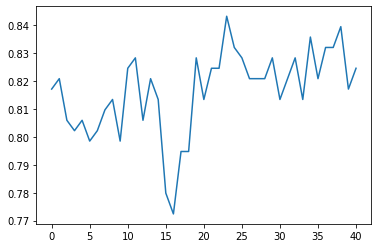

In [578]:
plt.plot(ac)

In [561]:
ac = []
lrs = [0.008, 0.007,0.006, 0.005,0.009,0.01,0.011,0.012, 0.013, 0.014, 0.015, 0.016, 0.017 ]
for lr in lrs:
    params = {
        "layers" : [[10, "relu"], [1, "relu"]],
            "optimizer" : 'rmsprop',
            "metrics" : ['mae', 'mse'],
            "loss" : 'mse',
            "epoch" : 20,
            "lr" : lr
    }
    model = xgb_keras(params = params)
    model.fit(train_data_zeros, np.array(y_train))
    ans = model.predict(test_data_zeros)
    ac.append(metrics.accuracy_score(ans, np.array(y_test)))
    

Epoch 1/20
623/623 [==============================] - 0s 278us/step - loss: 0.3204 - mean_absolute_error: 0.4015 - mean_squared_error: 0.3204
Epoch 2/20
623/623 [==============================] - 0s 147us/step - loss: 0.2119 - mean_absolute_error: 0.3239 - mean_squared_error: 0.2119
Epoch 3/20
623/623 [==============================] - 0s 147us/step - loss: 0.1670 - mean_absolute_error: 0.2831 - mean_squared_error: 0.1670
Epoch 4/20
623/623 [==============================] - 0s 146us/step - loss: 0.1496 - mean_absolute_error: 0.2575 - mean_squared_error: 0.1496
Epoch 5/20
623/623 [==============================] - 0s 147us/step - loss: 0.1473 - mean_absolute_error: 0.2534 - mean_squared_error: 0.1473
Epoch 6/20
623/623 [==============================] - 0s 145us/step - loss: 0.1383 - mean_absolute_error: 0.2507 - mean_squared_error: 0.1383
Epoch 7/20
623/623 [==============================] - 0s 148us/step - loss: 0.1362 - mean_absolute_error: 0.2468 - mean_squared_error: 0.1362
Epoch 

623/623 [==============================] - 0s 146us/step - loss: 0.1291 - mean_absolute_error: 0.2609 - mean_squared_error: 0.1291
Epoch 19/20
623/623 [==============================] - 0s 143us/step - loss: 0.1291 - mean_absolute_error: 0.2609 - mean_squared_error: 0.1291
Epoch 20/20
623/623 [==============================] - 0s 140us/step - loss: 0.1291 - mean_absolute_error: 0.2609 - mean_squared_error: 0.1291
Epoch 1/20
623/623 [==============================] - 0s 167us/step - loss: 0.1791 - mean_absolute_error: 0.2926 - mean_squared_error: 0.1791
Epoch 2/20
623/623 [==============================] - 0s 144us/step - loss: 0.1299 - mean_absolute_error: 0.2615 - mean_squared_error: 0.1299
Epoch 3/20
623/623 [==============================] - 0s 145us/step - loss: 0.1291 - mean_absolute_error: 0.2609 - mean_squared_error: 0.1291
Epoch 4/20
623/623 [==============================] - 0s 144us/step - loss: 0.1291 - mean_absolute_error: 0.2609 - mean_squared_error: 0.1291
Epoch 5/20
623/

623/623 [==============================] - 0s 147us/step - loss: 0.1280 - mean_absolute_error: 0.2584 - mean_squared_error: 0.1280
Epoch 16/20
623/623 [==============================] - 0s 151us/step - loss: 0.1275 - mean_absolute_error: 0.2584 - mean_squared_error: 0.1275
Epoch 17/20
623/623 [==============================] - 0s 143us/step - loss: 0.1280 - mean_absolute_error: 0.2585 - mean_squared_error: 0.1280
Epoch 18/20
623/623 [==============================] - 0s 142us/step - loss: 0.1281 - mean_absolute_error: 0.2582 - mean_squared_error: 0.1281
Epoch 19/20
623/623 [==============================] - 0s 143us/step - loss: 0.1274 - mean_absolute_error: 0.2579 - mean_squared_error: 0.1274
Epoch 20/20
623/623 [==============================] - 0s 140us/step - loss: 0.1273 - mean_absolute_error: 0.2576 - mean_squared_error: 0.1273
Epoch 1/20
623/623 [==============================] - 0s 168us/step - loss: 0.1336 - mean_absolute_error: 0.2665 - mean_squared_error: 0.1336
Epoch 2/20
6

623/623 [==============================] - 0s 140us/step - loss: 0.1256 - mean_absolute_error: 0.2557 - mean_squared_error: 0.1256
Epoch 13/20
623/623 [==============================] - 0s 144us/step - loss: 0.1256 - mean_absolute_error: 0.2557 - mean_squared_error: 0.1256
Epoch 14/20
623/623 [==============================] - 0s 144us/step - loss: 0.1256 - mean_absolute_error: 0.2557 - mean_squared_error: 0.1256
Epoch 15/20
623/623 [==============================] - 0s 141us/step - loss: 0.1256 - mean_absolute_error: 0.2557 - mean_squared_error: 0.1256
Epoch 16/20
623/623 [==============================] - 0s 143us/step - loss: 0.1256 - mean_absolute_error: 0.2557 - mean_squared_error: 0.1256
Epoch 17/20
623/623 [==============================] - 0s 142us/step - loss: 0.1256 - mean_absolute_error: 0.2557 - mean_squared_error: 0.1256
Epoch 18/20
623/623 [==============================] - 0s 140us/step - loss: 0.1256 - mean_absolute_error: 0.2557 - mean_squared_error: 0.1256
Epoch 19/20

623/623 [==============================] - 0s 143us/step - loss: 0.1060 - mean_absolute_error: 0.2341 - mean_squared_error: 0.1060
Epoch 10/20
623/623 [==============================] - 0s 141us/step - loss: 0.1057 - mean_absolute_error: 0.2332 - mean_squared_error: 0.1057
Epoch 11/20
623/623 [==============================] - 0s 143us/step - loss: 0.1054 - mean_absolute_error: 0.2321 - mean_squared_error: 0.1054
Epoch 12/20
623/623 [==============================] - 0s 140us/step - loss: 0.1054 - mean_absolute_error: 0.2326 - mean_squared_error: 0.1054
Epoch 13/20
623/623 [==============================] - 0s 142us/step - loss: 0.1051 - mean_absolute_error: 0.2321 - mean_squared_error: 0.1051
Epoch 14/20
623/623 [==============================] - 0s 141us/step - loss: 0.1050 - mean_absolute_error: 0.2315 - mean_squared_error: 0.1050
Epoch 15/20
623/623 [==============================] - 0s 145us/step - loss: 0.1052 - mean_absolute_error: 0.2323 - mean_squared_error: 0.1052
Epoch 16/20

623/623 [==============================] - 0s 142us/step - loss: 0.1016 - mean_absolute_error: 0.2253 - mean_squared_error: 0.1016
Epoch 7/20
623/623 [==============================] - 0s 145us/step - loss: 0.1016 - mean_absolute_error: 0.2253 - mean_squared_error: 0.1016
Epoch 8/20
623/623 [==============================] - 0s 142us/step - loss: 0.1016 - mean_absolute_error: 0.2253 - mean_squared_error: 0.1016
Epoch 9/20
623/623 [==============================] - 0s 145us/step - loss: 0.1016 - mean_absolute_error: 0.2253 - mean_squared_error: 0.1016
Epoch 10/20
623/623 [==============================] - 0s 143us/step - loss: 0.1016 - mean_absolute_error: 0.2253 - mean_squared_error: 0.1016
Epoch 11/20
623/623 [==============================] - 0s 140us/step - loss: 0.1016 - mean_absolute_error: 0.2253 - mean_squared_error: 0.1016
Epoch 12/20
623/623 [==============================] - 0s 142us/step - loss: 0.1016 - mean_absolute_error: 0.2253 - mean_squared_error: 0.1016
Epoch 13/20
62

623/623 [==============================] - 0s 144us/step - loss: 0.0961 - mean_absolute_error: 0.2170 - mean_squared_error: 0.0961
Epoch 4/20
623/623 [==============================] - 0s 144us/step - loss: 0.0961 - mean_absolute_error: 0.2170 - mean_squared_error: 0.0961
Epoch 5/20
623/623 [==============================] - 0s 143us/step - loss: 0.0961 - mean_absolute_error: 0.2170 - mean_squared_error: 0.0961
Epoch 6/20
623/623 [==============================] - 0s 144us/step - loss: 0.0961 - mean_absolute_error: 0.2170 - mean_squared_error: 0.0961
Epoch 7/20
623/623 [==============================] - 0s 143us/step - loss: 0.0961 - mean_absolute_error: 0.2170 - mean_squared_error: 0.0961
Epoch 8/20
623/623 [==============================] - 0s 144us/step - loss: 0.0961 - mean_absolute_error: 0.2170 - mean_squared_error: 0.0961
Epoch 9/20
623/623 [==============================] - 0s 140us/step - loss: 0.0961 - mean_absolute_error: 0.2170 - mean_squared_error: 0.0961
Epoch 10/20
623/6

623/623 [==============================] - 0s 143us/step - loss: 0.0953 - mean_absolute_error: 0.2157 - mean_squared_error: 0.0953
Epoch 1/20
623/623 [==============================] - 0s 164us/step - loss: 0.2516 - mean_absolute_error: 0.3494 - mean_squared_error: 0.2516
Epoch 2/20
623/623 [==============================] - 0s 145us/step - loss: 0.1706 - mean_absolute_error: 0.2833 - mean_squared_error: 0.1706
Epoch 3/20
623/623 [==============================] - 0s 143us/step - loss: 0.1485 - mean_absolute_error: 0.2567 - mean_squared_error: 0.1485
Epoch 4/20
623/623 [==============================] - 0s 141us/step - loss: 0.1465 - mean_absolute_error: 0.2452 - mean_squared_error: 0.1465
Epoch 5/20
623/623 [==============================] - 0s 141us/step - loss: 0.1351 - mean_absolute_error: 0.2354 - mean_squared_error: 0.1351
Epoch 6/20
623/623 [==============================] - 0s 140us/step - loss: 0.1326 - mean_absolute_error: 0.2355 - mean_squared_error: 0.1326
Epoch 7/20
623/62

623/623 [==============================] - 0s 146us/step - loss: 0.1064 - mean_absolute_error: 0.2145 - mean_squared_error: 0.1064
Epoch 18/20
623/623 [==============================] - 0s 148us/step - loss: 0.1057 - mean_absolute_error: 0.2137 - mean_squared_error: 0.1057
Epoch 19/20
623/623 [==============================] - 0s 147us/step - loss: 0.1057 - mean_absolute_error: 0.2137 - mean_squared_error: 0.1057
Epoch 20/20
623/623 [==============================] - 0s 140us/step - loss: 0.1058 - mean_absolute_error: 0.2140 - mean_squared_error: 0.1058
Epoch 1/20
623/623 [==============================] - 0s 157us/step - loss: 0.1090 - mean_absolute_error: 0.2164 - mean_squared_error: 0.1090
Epoch 2/20
623/623 [==============================] - 0s 146us/step - loss: 0.1057 - mean_absolute_error: 0.2137 - mean_squared_error: 0.1057
Epoch 3/20
623/623 [==============================] - 0s 147us/step - loss: 0.1061 - mean_absolute_error: 0.2136 - mean_squared_error: 0.1061
Epoch 4/20
623

623/623 [==============================] - 0s 142us/step - loss: 0.1030 - mean_absolute_error: 0.2097 - mean_squared_error: 0.1030
Epoch 15/20
623/623 [==============================] - 0s 143us/step - loss: 0.1032 - mean_absolute_error: 0.2100 - mean_squared_error: 0.1032
Epoch 16/20
623/623 [==============================] - 0s 141us/step - loss: 0.1025 - mean_absolute_error: 0.2091 - mean_squared_error: 0.1025
Epoch 17/20
623/623 [==============================] - 0s 145us/step - loss: 0.1027 - mean_absolute_error: 0.2094 - mean_squared_error: 0.1027
Epoch 18/20
623/623 [==============================] - 0s 147us/step - loss: 0.1021 - mean_absolute_error: 0.2090 - mean_squared_error: 0.1021
Epoch 19/20
623/623 [==============================] - 0s 149us/step - loss: 0.1024 - mean_absolute_error: 0.2096 - mean_squared_error: 0.1024
Epoch 20/20
623/623 [==============================] - 0s 146us/step - loss: 0.1028 - mean_absolute_error: 0.2090 - mean_squared_error: 0.1028
Epoch 1/20


623/623 [==============================] - 0s 139us/step - loss: 0.0999 - mean_absolute_error: 0.2056 - mean_squared_error: 0.0999
Epoch 12/20
623/623 [==============================] - 0s 148us/step - loss: 0.0999 - mean_absolute_error: 0.2056 - mean_squared_error: 0.0999
Epoch 13/20
623/623 [==============================] - 0s 142us/step - loss: 0.0999 - mean_absolute_error: 0.2056 - mean_squared_error: 0.0999
Epoch 14/20
623/623 [==============================] - 0s 146us/step - loss: 0.0999 - mean_absolute_error: 0.2056 - mean_squared_error: 0.0999
Epoch 15/20
623/623 [==============================] - 0s 147us/step - loss: 0.0999 - mean_absolute_error: 0.2056 - mean_squared_error: 0.0999
Epoch 16/20
623/623 [==============================] - 0s 147us/step - loss: 0.0999 - mean_absolute_error: 0.2056 - mean_squared_error: 0.0999
Epoch 17/20
623/623 [==============================] - 0s 146us/step - loss: 0.0999 - mean_absolute_error: 0.2056 - mean_squared_error: 0.0999
Epoch 18/20

623/623 [==============================] - 0s 140us/step - loss: 0.1120 - mean_absolute_error: 0.1976 - mean_squared_error: 0.1120
Epoch 9/20
623/623 [==============================] - 0s 147us/step - loss: 0.1120 - mean_absolute_error: 0.1976 - mean_squared_error: 0.1120
Epoch 10/20
623/623 [==============================] - 0s 150us/step - loss: 0.1120 - mean_absolute_error: 0.1976 - mean_squared_error: 0.1120
Epoch 11/20
623/623 [==============================] - 0s 147us/step - loss: 0.1120 - mean_absolute_error: 0.1976 - mean_squared_error: 0.1120
Epoch 12/20
623/623 [==============================] - 0s 147us/step - loss: 0.1120 - mean_absolute_error: 0.1976 - mean_squared_error: 0.1120
Epoch 13/20
623/623 [==============================] - 0s 146us/step - loss: 0.1120 - mean_absolute_error: 0.1976 - mean_squared_error: 0.1120
Epoch 14/20
623/623 [==============================] - 0s 148us/step - loss: 0.1120 - mean_absolute_error: 0.1976 - mean_squared_error: 0.1120
Epoch 15/20


623/623 [==============================] - 0s 139us/step - loss: 0.1029 - mean_absolute_error: 0.1974 - mean_squared_error: 0.1029
Epoch 6/20
623/623 [==============================] - 0s 146us/step - loss: 0.1027 - mean_absolute_error: 0.1969 - mean_squared_error: 0.1027
Epoch 7/20
623/623 [==============================] - 0s 150us/step - loss: 0.1025 - mean_absolute_error: 0.1964 - mean_squared_error: 0.1025
Epoch 8/20
623/623 [==============================] - 0s 144us/step - loss: 0.1030 - mean_absolute_error: 0.1972 - mean_squared_error: 0.1030
Epoch 9/20
623/623 [==============================] - 0s 142us/step - loss: 0.1029 - mean_absolute_error: 0.1964 - mean_squared_error: 0.1029
Epoch 10/20
623/623 [==============================] - 0s 147us/step - loss: 0.1028 - mean_absolute_error: 0.1972 - mean_squared_error: 0.1028
Epoch 11/20
623/623 [==============================] - 0s 146us/step - loss: 0.1026 - mean_absolute_error: 0.1967 - mean_squared_error: 0.1026
Epoch 12/20
623

623/623 [==============================] - 0s 147us/step - loss: 0.0960 - mean_absolute_error: 0.2033 - mean_squared_error: 0.0960
Epoch 3/20
623/623 [==============================] - 0s 148us/step - loss: 0.0955 - mean_absolute_error: 0.2039 - mean_squared_error: 0.0955
Epoch 4/20
623/623 [==============================] - 0s 139us/step - loss: 0.0957 - mean_absolute_error: 0.2044 - mean_squared_error: 0.0957
Epoch 5/20
623/623 [==============================] - 0s 147us/step - loss: 0.0957 - mean_absolute_error: 0.2042 - mean_squared_error: 0.0957
Epoch 6/20
623/623 [==============================] - 0s 146us/step - loss: 0.0955 - mean_absolute_error: 0.2038 - mean_squared_error: 0.0955
Epoch 7/20
623/623 [==============================] - 0s 146us/step - loss: 0.0955 - mean_absolute_error: 0.2040 - mean_squared_error: 0.0955
Epoch 8/20
623/623 [==============================] - 0s 149us/step - loss: 0.0955 - mean_absolute_error: 0.2036 - mean_squared_error: 0.0955
Epoch 9/20
623/62

623/623 [==============================] - 0s 141us/step - loss: 0.0899 - mean_absolute_error: 0.1988 - mean_squared_error: 0.0899
Epoch 20/20
623/623 [==============================] - 0s 140us/step - loss: 0.0901 - mean_absolute_error: 0.1993 - mean_squared_error: 0.0901
Epoch 1/20
623/623 [==============================] - 0s 162us/step - loss: 0.2286 - mean_absolute_error: 0.3749 - mean_squared_error: 0.2286
Epoch 2/20
623/623 [==============================] - 0s 148us/step - loss: 0.1594 - mean_absolute_error: 0.3047 - mean_squared_error: 0.1594
Epoch 3/20
623/623 [==============================] - 0s 147us/step - loss: 0.1411 - mean_absolute_error: 0.2773 - mean_squared_error: 0.1411
Epoch 4/20
623/623 [==============================] - 0s 147us/step - loss: 0.1345 - mean_absolute_error: 0.2755 - mean_squared_error: 0.1345
Epoch 5/20
623/623 [==============================] - 0s 146us/step - loss: 0.1371 - mean_absolute_error: 0.2652 - mean_squared_error: 0.1371
Epoch 6/20
623/6

623/623 [==============================] - 0s 147us/step - loss: 0.1035 - mean_absolute_error: 0.1943 - mean_squared_error: 0.1035
Epoch 17/20
623/623 [==============================] - 0s 151us/step - loss: 0.1034 - mean_absolute_error: 0.1944 - mean_squared_error: 0.1034
Epoch 18/20
623/623 [==============================] - 0s 147us/step - loss: 0.1033 - mean_absolute_error: 0.1950 - mean_squared_error: 0.1033
Epoch 19/20
623/623 [==============================] - 0s 149us/step - loss: 0.1029 - mean_absolute_error: 0.1946 - mean_squared_error: 0.1029
Epoch 20/20
623/623 [==============================] - 0s 148us/step - loss: 0.1033 - mean_absolute_error: 0.1920 - mean_squared_error: 0.1033
Epoch 1/20
623/623 [==============================] - 0s 161us/step - loss: 0.1036 - mean_absolute_error: 0.1936 - mean_squared_error: 0.1036
Epoch 2/20
623/623 [==============================] - 0s 148us/step - loss: 0.1034 - mean_absolute_error: 0.1932 - mean_squared_error: 0.1034
Epoch 3/20
62

623/623 [==============================] - 0s 153us/step - loss: 0.1028 - mean_absolute_error: 0.1919 - mean_squared_error: 0.1028
Epoch 14/20
623/623 [==============================] - 0s 149us/step - loss: 0.1028 - mean_absolute_error: 0.1919 - mean_squared_error: 0.1028
Epoch 15/20
623/623 [==============================] - 0s 149us/step - loss: 0.1028 - mean_absolute_error: 0.1919 - mean_squared_error: 0.1028
Epoch 16/20
623/623 [==============================] - 0s 151us/step - loss: 0.1028 - mean_absolute_error: 0.1919 - mean_squared_error: 0.1028
Epoch 17/20
623/623 [==============================] - 0s 148us/step - loss: 0.1028 - mean_absolute_error: 0.1919 - mean_squared_error: 0.1028
Epoch 18/20
623/623 [==============================] - 0s 141us/step - loss: 0.1028 - mean_absolute_error: 0.1919 - mean_squared_error: 0.1028
Epoch 19/20
623/623 [==============================] - 0s 143us/step - loss: 0.1028 - mean_absolute_error: 0.1919 - mean_squared_error: 0.1028
Epoch 20/20

623/623 [==============================] - 0s 151us/step - loss: 0.1006 - mean_absolute_error: 0.1884 - mean_squared_error: 0.1006
Epoch 11/20
623/623 [==============================] - 0s 150us/step - loss: 0.1014 - mean_absolute_error: 0.1902 - mean_squared_error: 0.1014
Epoch 12/20
623/623 [==============================] - 0s 150us/step - loss: 0.1002 - mean_absolute_error: 0.1888 - mean_squared_error: 0.1002
Epoch 13/20
623/623 [==============================] - 0s 149us/step - loss: 0.1002 - mean_absolute_error: 0.1880 - mean_squared_error: 0.1002
Epoch 14/20
623/623 [==============================] - 0s 148us/step - loss: 0.1002 - mean_absolute_error: 0.1880 - mean_squared_error: 0.1002
Epoch 15/20
623/623 [==============================] - 0s 147us/step - loss: 0.0999 - mean_absolute_error: 0.1875 - mean_squared_error: 0.0999
Epoch 16/20
623/623 [==============================] - 0s 146us/step - loss: 0.0994 - mean_absolute_error: 0.1865 - mean_squared_error: 0.0994
Epoch 17/20

623/623 [==============================] - 0s 142us/step - loss: 0.1048 - mean_absolute_error: 0.1889 - mean_squared_error: 0.1048
Epoch 8/20
623/623 [==============================] - 0s 142us/step - loss: 0.1048 - mean_absolute_error: 0.1889 - mean_squared_error: 0.1048
Epoch 9/20
623/623 [==============================] - 0s 143us/step - loss: 0.1048 - mean_absolute_error: 0.1889 - mean_squared_error: 0.1048
Epoch 10/20
623/623 [==============================] - 0s 151us/step - loss: 0.1048 - mean_absolute_error: 0.1889 - mean_squared_error: 0.1048
Epoch 11/20
623/623 [==============================] - 0s 150us/step - loss: 0.1048 - mean_absolute_error: 0.1889 - mean_squared_error: 0.1048
Epoch 12/20
623/623 [==============================] - 0s 148us/step - loss: 0.1048 - mean_absolute_error: 0.1889 - mean_squared_error: 0.1048
Epoch 13/20
623/623 [==============================] - 0s 147us/step - loss: 0.1048 - mean_absolute_error: 0.1889 - mean_squared_error: 0.1048
Epoch 14/20
6

623/623 [==============================] - 0s 142us/step - loss: 0.0940 - mean_absolute_error: 0.1796 - mean_squared_error: 0.0940
Epoch 5/20
623/623 [==============================] - 0s 145us/step - loss: 0.0941 - mean_absolute_error: 0.1793 - mean_squared_error: 0.0941
Epoch 6/20
623/623 [==============================] - 0s 148us/step - loss: 0.0939 - mean_absolute_error: 0.1792 - mean_squared_error: 0.0939
Epoch 7/20
623/623 [==============================] - 0s 150us/step - loss: 0.0939 - mean_absolute_error: 0.1790 - mean_squared_error: 0.0939
Epoch 8/20
623/623 [==============================] - 0s 149us/step - loss: 0.0942 - mean_absolute_error: 0.1789 - mean_squared_error: 0.0942
Epoch 9/20
623/623 [==============================] - 0s 149us/step - loss: 0.0941 - mean_absolute_error: 0.1799 - mean_squared_error: 0.0941
Epoch 10/20
623/623 [==============================] - 0s 147us/step - loss: 0.0941 - mean_absolute_error: 0.1799 - mean_squared_error: 0.0941
Epoch 11/20
623/

623/623 [==============================] - 0s 161us/step - loss: 0.0945 - mean_absolute_error: 0.1805 - mean_squared_error: 0.0945
Epoch 2/20
623/623 [==============================] - 0s 144us/step - loss: 0.0941 - mean_absolute_error: 0.1799 - mean_squared_error: 0.0941
Epoch 3/20
623/623 [==============================] - 0s 145us/step - loss: 0.0941 - mean_absolute_error: 0.1799 - mean_squared_error: 0.0941
Epoch 4/20
623/623 [==============================] - 0s 144us/step - loss: 0.0941 - mean_absolute_error: 0.1799 - mean_squared_error: 0.0941
Epoch 5/20
623/623 [==============================] - 0s 142us/step - loss: 0.0941 - mean_absolute_error: 0.1799 - mean_squared_error: 0.0941
Epoch 6/20
623/623 [==============================] - 0s 144us/step - loss: 0.0941 - mean_absolute_error: 0.1799 - mean_squared_error: 0.0941
Epoch 7/20
623/623 [==============================] - 0s 142us/step - loss: 0.0941 - mean_absolute_error: 0.1799 - mean_squared_error: 0.0941
Epoch 8/20
623/62

623/623 [==============================] - 0s 146us/step - loss: 0.0941 - mean_absolute_error: 0.1799 - mean_squared_error: 0.0941
Epoch 19/20
623/623 [==============================] - 0s 146us/step - loss: 0.0941 - mean_absolute_error: 0.1799 - mean_squared_error: 0.0941
Epoch 20/20
623/623 [==============================] - 0s 147us/step - loss: 0.0941 - mean_absolute_error: 0.1799 - mean_squared_error: 0.0941
Epoch 1/20
623/623 [==============================] - 0s 159us/step - loss: 0.3079 - mean_absolute_error: 0.3823 - mean_squared_error: 0.3079
Epoch 2/20
623/623 [==============================] - 0s 149us/step - loss: 0.1921 - mean_absolute_error: 0.2850 - mean_squared_error: 0.1921
Epoch 3/20
623/623 [==============================] - 0s 150us/step - loss: 0.1653 - mean_absolute_error: 0.2627 - mean_squared_error: 0.1653
Epoch 4/20
623/623 [==============================] - 0s 147us/step - loss: 0.1581 - mean_absolute_error: 0.2539 - mean_squared_error: 0.1581
Epoch 5/20
623/

623/623 [==============================] - 0s 152us/step - loss: 0.1053 - mean_absolute_error: 0.1928 - mean_squared_error: 0.1053
Epoch 16/20
623/623 [==============================] - 0s 149us/step - loss: 0.1053 - mean_absolute_error: 0.1927 - mean_squared_error: 0.1053
Epoch 17/20
623/623 [==============================] - 0s 150us/step - loss: 0.1053 - mean_absolute_error: 0.1927 - mean_squared_error: 0.1053
Epoch 18/20
623/623 [==============================] - 0s 148us/step - loss: 0.1053 - mean_absolute_error: 0.1928 - mean_squared_error: 0.1053
Epoch 19/20
623/623 [==============================] - 0s 149us/step - loss: 0.1053 - mean_absolute_error: 0.1927 - mean_squared_error: 0.1053
Epoch 20/20
623/623 [==============================] - 0s 149us/step - loss: 0.1053 - mean_absolute_error: 0.1928 - mean_squared_error: 0.1053
Epoch 1/20
623/623 [==============================] - 0s 322us/step - loss: 0.1149 - mean_absolute_error: 0.2060 - mean_squared_error: 0.1149
Epoch 2/20
6

623/623 [==============================] - 0s 150us/step - loss: 0.1045 - mean_absolute_error: 0.1920 - mean_squared_error: 0.1045
Epoch 13/20
623/623 [==============================] - 0s 140us/step - loss: 0.1045 - mean_absolute_error: 0.1920 - mean_squared_error: 0.1045
Epoch 14/20
623/623 [==============================] - 0s 144us/step - loss: 0.1045 - mean_absolute_error: 0.1920 - mean_squared_error: 0.1045
Epoch 15/20
623/623 [==============================] - 0s 147us/step - loss: 0.1045 - mean_absolute_error: 0.1920 - mean_squared_error: 0.1045
Epoch 16/20
623/623 [==============================] - 0s 148us/step - loss: 0.1045 - mean_absolute_error: 0.1920 - mean_squared_error: 0.1045
Epoch 17/20
623/623 [==============================] - 0s 148us/step - loss: 0.1045 - mean_absolute_error: 0.1920 - mean_squared_error: 0.1045
Epoch 18/20
623/623 [==============================] - 0s 147us/step - loss: 0.1045 - mean_absolute_error: 0.1920 - mean_squared_error: 0.1045
Epoch 19/20

623/623 [==============================] - 0s 149us/step - loss: 0.1005 - mean_absolute_error: 0.1858 - mean_squared_error: 0.1005
Epoch 10/20
623/623 [==============================] - 0s 149us/step - loss: 0.1005 - mean_absolute_error: 0.1856 - mean_squared_error: 0.1005
Epoch 11/20
623/623 [==============================] - 0s 140us/step - loss: 0.1004 - mean_absolute_error: 0.1854 - mean_squared_error: 0.1004
Epoch 12/20
623/623 [==============================] - 0s 138us/step - loss: 0.1003 - mean_absolute_error: 0.1850 - mean_squared_error: 0.1003
Epoch 13/20
623/623 [==============================] - 0s 141us/step - loss: 0.1003 - mean_absolute_error: 0.1852 - mean_squared_error: 0.1003
Epoch 14/20
623/623 [==============================] - 0s 146us/step - loss: 0.1005 - mean_absolute_error: 0.1857 - mean_squared_error: 0.1005
Epoch 15/20
623/623 [==============================] - 0s 142us/step - loss: 0.1004 - mean_absolute_error: 0.1855 - mean_squared_error: 0.1004
Epoch 16/20

623/623 [==============================] - 0s 148us/step - loss: 0.1024 - mean_absolute_error: 0.2167 - mean_squared_error: 0.1024
Epoch 7/20
623/623 [==============================] - 0s 147us/step - loss: 0.1024 - mean_absolute_error: 0.2167 - mean_squared_error: 0.1024
Epoch 8/20
623/623 [==============================] - 0s 147us/step - loss: 0.1024 - mean_absolute_error: 0.2167 - mean_squared_error: 0.1024
Epoch 9/20
623/623 [==============================] - 0s 139us/step - loss: 0.1024 - mean_absolute_error: 0.2167 - mean_squared_error: 0.1024
Epoch 10/20
623/623 [==============================] - 0s 146us/step - loss: 0.1024 - mean_absolute_error: 0.2167 - mean_squared_error: 0.1024
Epoch 11/20
623/623 [==============================] - 0s 149us/step - loss: 0.1024 - mean_absolute_error: 0.2167 - mean_squared_error: 0.1024
Epoch 12/20
623/623 [==============================] - 0s 148us/step - loss: 0.1024 - mean_absolute_error: 0.2167 - mean_squared_error: 0.1024
Epoch 13/20
62

623/623 [==============================] - 0s 142us/step - loss: 0.1014 - mean_absolute_error: 0.2156 - mean_squared_error: 0.1014
Epoch 4/20
623/623 [==============================] - 0s 138us/step - loss: 0.1053 - mean_absolute_error: 0.2189 - mean_squared_error: 0.1053
Epoch 5/20
623/623 [==============================] - 0s 140us/step - loss: 0.1024 - mean_absolute_error: 0.2171 - mean_squared_error: 0.1024
Epoch 6/20
623/623 [==============================] - 0s 147us/step - loss: 0.1019 - mean_absolute_error: 0.2161 - mean_squared_error: 0.1019
Epoch 7/20
623/623 [==============================] - 0s 146us/step - loss: 0.1010 - mean_absolute_error: 0.2155 - mean_squared_error: 0.1010
Epoch 8/20
623/623 [==============================] - 0s 145us/step - loss: 0.1025 - mean_absolute_error: 0.2169 - mean_squared_error: 0.1025
Epoch 9/20
623/623 [==============================] - 0s 147us/step - loss: 0.1027 - mean_absolute_error: 0.2168 - mean_squared_error: 0.1027
Epoch 10/20
623/6

623/623 [==============================] - 0s 153us/step - loss: 0.0995 - mean_absolute_error: 0.2138 - mean_squared_error: 0.0995
Epoch 1/20
623/623 [==============================] - 0s 154us/step - loss: 0.1016 - mean_absolute_error: 0.2179 - mean_squared_error: 0.1016
Epoch 2/20
623/623 [==============================] - 0s 142us/step - loss: 0.0995 - mean_absolute_error: 0.2138 - mean_squared_error: 0.0995
Epoch 3/20
623/623 [==============================] - 0s 142us/step - loss: 0.0993 - mean_absolute_error: 0.2134 - mean_squared_error: 0.0993
Epoch 4/20
623/623 [==============================] - 0s 145us/step - loss: 0.0994 - mean_absolute_error: 0.2134 - mean_squared_error: 0.0994
Epoch 5/20
623/623 [==============================] - 0s 146us/step - loss: 0.0997 - mean_absolute_error: 0.2140 - mean_squared_error: 0.0997
Epoch 6/20
623/623 [==============================] - 0s 146us/step - loss: 0.1000 - mean_absolute_error: 0.2144 - mean_squared_error: 0.1000
Epoch 7/20
623/62

623/623 [==============================] - 0s 148us/step - loss: 0.0995 - mean_absolute_error: 0.2138 - mean_squared_error: 0.0995
Epoch 18/20
623/623 [==============================] - 0s 146us/step - loss: 0.0995 - mean_absolute_error: 0.2138 - mean_squared_error: 0.0995
Epoch 19/20
623/623 [==============================] - 0s 149us/step - loss: 0.0995 - mean_absolute_error: 0.2138 - mean_squared_error: 0.0995
Epoch 20/20
623/623 [==============================] - 0s 149us/step - loss: 0.0995 - mean_absolute_error: 0.2138 - mean_squared_error: 0.0995
Epoch 1/20
623/623 [==============================] - 0s 156us/step - loss: 0.2196 - mean_absolute_error: 0.3525 - mean_squared_error: 0.2196
Epoch 2/20
623/623 [==============================] - 0s 148us/step - loss: 0.1481 - mean_absolute_error: 0.2773 - mean_squared_error: 0.1481
Epoch 3/20
623/623 [==============================] - 0s 148us/step - loss: 0.1490 - mean_absolute_error: 0.2534 - mean_squared_error: 0.1490
Epoch 4/20
623

623/623 [==============================] - 0s 148us/step - loss: 0.1258 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1258
Epoch 15/20
623/623 [==============================] - 0s 148us/step - loss: 0.1258 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1258
Epoch 16/20
623/623 [==============================] - 0s 149us/step - loss: 0.1258 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1258
Epoch 17/20
623/623 [==============================] - 0s 146us/step - loss: 0.1258 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1258
Epoch 18/20
623/623 [==============================] - 0s 145us/step - loss: 0.1258 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1258
Epoch 19/20
623/623 [==============================] - 0s 147us/step - loss: 0.1258 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1258
Epoch 20/20
623/623 [==============================] - 0s 149us/step - loss: 0.1258 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1258
Epoch 1/20


623/623 [==============================] - 0s 147us/step - loss: 0.1258 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1258
Epoch 12/20
623/623 [==============================] - 0s 148us/step - loss: 0.1258 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1258
Epoch 13/20
623/623 [==============================] - 0s 137us/step - loss: 0.1258 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1258
Epoch 14/20
623/623 [==============================] - 0s 149us/step - loss: 0.1258 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1258
Epoch 15/20
623/623 [==============================] - 0s 147us/step - loss: 0.1258 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1258
Epoch 16/20
623/623 [==============================] - 0s 148us/step - loss: 0.1258 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1258
Epoch 17/20
623/623 [==============================] - 0s 147us/step - loss: 0.1258 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1258
Epoch 18/20

623/623 [==============================] - 0s 150us/step - loss: 0.1258 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1258
Epoch 9/20
623/623 [==============================] - 0s 150us/step - loss: 0.1258 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1258
Epoch 10/20
623/623 [==============================] - 0s 149us/step - loss: 0.1258 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1258
Epoch 11/20
623/623 [==============================] - 0s 147us/step - loss: 0.1258 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1258
Epoch 12/20
623/623 [==============================] - 0s 144us/step - loss: 0.1258 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1258
Epoch 13/20
623/623 [==============================] - 0s 148us/step - loss: 0.1258 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1258
Epoch 14/20
623/623 [==============================] - 0s 149us/step - loss: 0.1258 - mean_absolute_error: 0.2621 - mean_squared_error: 0.1258
Epoch 15/20


623/623 [==============================] - 0s 150us/step - loss: 0.1118 - mean_absolute_error: 0.2542 - mean_squared_error: 0.1118
Epoch 6/20
623/623 [==============================] - 0s 147us/step - loss: 0.1115 - mean_absolute_error: 0.2544 - mean_squared_error: 0.1115
Epoch 7/20
623/623 [==============================] - 0s 150us/step - loss: 0.1109 - mean_absolute_error: 0.2528 - mean_squared_error: 0.1109
Epoch 8/20
623/623 [==============================] - 0s 146us/step - loss: 0.1116 - mean_absolute_error: 0.2544 - mean_squared_error: 0.1116
Epoch 9/20
623/623 [==============================] - 0s 148us/step - loss: 0.1120 - mean_absolute_error: 0.2541 - mean_squared_error: 0.1120
Epoch 10/20
623/623 [==============================] - 0s 149us/step - loss: 0.1117 - mean_absolute_error: 0.2549 - mean_squared_error: 0.1117
Epoch 11/20
623/623 [==============================] - 0s 148us/step - loss: 0.1113 - mean_absolute_error: 0.2540 - mean_squared_error: 0.1113
Epoch 12/20
623

623/623 [==============================] - 0s 149us/step - loss: 0.1117 - mean_absolute_error: 0.2547 - mean_squared_error: 0.1117
Epoch 3/20
623/623 [==============================] - 0s 146us/step - loss: 0.1117 - mean_absolute_error: 0.2547 - mean_squared_error: 0.1117
Epoch 4/20
623/623 [==============================] - 0s 149us/step - loss: 0.1117 - mean_absolute_error: 0.2547 - mean_squared_error: 0.1117
Epoch 5/20
623/623 [==============================] - 0s 148us/step - loss: 0.1117 - mean_absolute_error: 0.2547 - mean_squared_error: 0.1117
Epoch 6/20
623/623 [==============================] - 0s 148us/step - loss: 0.1117 - mean_absolute_error: 0.2547 - mean_squared_error: 0.1117
Epoch 7/20
623/623 [==============================] - 0s 149us/step - loss: 0.1117 - mean_absolute_error: 0.2547 - mean_squared_error: 0.1117
Epoch 8/20
623/623 [==============================] - 0s 147us/step - loss: 0.1117 - mean_absolute_error: 0.2547 - mean_squared_error: 0.1117
Epoch 9/20
623/62

623/623 [==============================] - 0s 139us/step - loss: 0.1117 - mean_absolute_error: 0.2547 - mean_squared_error: 0.1117
Epoch 20/20
623/623 [==============================] - 0s 145us/step - loss: 0.1117 - mean_absolute_error: 0.2547 - mean_squared_error: 0.1117
Epoch 1/20
623/623 [==============================] - 0s 155us/step - loss: 0.1241 - mean_absolute_error: 0.2663 - mean_squared_error: 0.1241
Epoch 2/20
623/623 [==============================] - 0s 148us/step - loss: 0.1117 - mean_absolute_error: 0.2547 - mean_squared_error: 0.1117
Epoch 3/20
623/623 [==============================] - 0s 147us/step - loss: 0.1117 - mean_absolute_error: 0.2547 - mean_squared_error: 0.1117
Epoch 4/20
623/623 [==============================] - 0s 150us/step - loss: 0.1117 - mean_absolute_error: 0.2547 - mean_squared_error: 0.1117
Epoch 5/20
623/623 [==============================] - 0s 150us/step - loss: 0.1117 - mean_absolute_error: 0.2547 - mean_squared_error: 0.1117
Epoch 6/20
623/6

623/623 [==============================] - 0s 147us/step - loss: 0.1117 - mean_absolute_error: 0.2547 - mean_squared_error: 0.1117
Epoch 17/20
623/623 [==============================] - 0s 143us/step - loss: 0.1117 - mean_absolute_error: 0.2547 - mean_squared_error: 0.1117
Epoch 18/20
623/623 [==============================] - 0s 138us/step - loss: 0.1117 - mean_absolute_error: 0.2547 - mean_squared_error: 0.1117
Epoch 19/20
623/623 [==============================] - 0s 147us/step - loss: 0.1117 - mean_absolute_error: 0.2547 - mean_squared_error: 0.1117
Epoch 20/20
623/623 [==============================] - 0s 148us/step - loss: 0.1117 - mean_absolute_error: 0.2547 - mean_squared_error: 0.1117
Epoch 1/20
623/623 [==============================] - 0s 152us/step - loss: 0.2335 - mean_absolute_error: 0.3239 - mean_squared_error: 0.2335
Epoch 2/20
623/623 [==============================] - 0s 143us/step - loss: 0.1646 - mean_absolute_error: 0.2641 - mean_squared_error: 0.1646
Epoch 3/20
62

623/623 [==============================] - 0s 152us/step - loss: 0.1014 - mean_absolute_error: 0.1759 - mean_squared_error: 0.1014
Epoch 14/20
623/623 [==============================] - 0s 148us/step - loss: 0.1014 - mean_absolute_error: 0.1759 - mean_squared_error: 0.1014
Epoch 15/20
623/623 [==============================] - 0s 151us/step - loss: 0.1014 - mean_absolute_error: 0.1759 - mean_squared_error: 0.1014
Epoch 16/20
623/623 [==============================] - 0s 151us/step - loss: 0.1014 - mean_absolute_error: 0.1759 - mean_squared_error: 0.1014
Epoch 17/20
623/623 [==============================] - 0s 146us/step - loss: 0.1014 - mean_absolute_error: 0.1759 - mean_squared_error: 0.1014
Epoch 18/20
623/623 [==============================] - 0s 147us/step - loss: 0.1014 - mean_absolute_error: 0.1759 - mean_squared_error: 0.1014
Epoch 19/20
623/623 [==============================] - 0s 145us/step - loss: 0.1014 - mean_absolute_error: 0.1759 - mean_squared_error: 0.1014
Epoch 20/20

623/623 [==============================] - 0s 148us/step - loss: 0.0978 - mean_absolute_error: 0.1729 - mean_squared_error: 0.0978
Epoch 11/20
623/623 [==============================] - 0s 147us/step - loss: 0.0978 - mean_absolute_error: 0.1729 - mean_squared_error: 0.0978
Epoch 12/20
623/623 [==============================] - 0s 148us/step - loss: 0.0978 - mean_absolute_error: 0.1729 - mean_squared_error: 0.0978
Epoch 13/20
623/623 [==============================] - 0s 149us/step - loss: 0.0978 - mean_absolute_error: 0.1729 - mean_squared_error: 0.0978
Epoch 14/20
623/623 [==============================] - 0s 150us/step - loss: 0.0978 - mean_absolute_error: 0.1729 - mean_squared_error: 0.0978
Epoch 15/20
623/623 [==============================] - 0s 148us/step - loss: 0.0978 - mean_absolute_error: 0.1729 - mean_squared_error: 0.0978
Epoch 16/20
623/623 [==============================] - 0s 151us/step - loss: 0.0978 - mean_absolute_error: 0.1729 - mean_squared_error: 0.0978
Epoch 17/20

623/623 [==============================] - 0s 147us/step - loss: 0.0978 - mean_absolute_error: 0.1729 - mean_squared_error: 0.0978
Epoch 8/20
623/623 [==============================] - 0s 147us/step - loss: 0.0978 - mean_absolute_error: 0.1729 - mean_squared_error: 0.0978
Epoch 9/20
623/623 [==============================] - 0s 149us/step - loss: 0.0978 - mean_absolute_error: 0.1729 - mean_squared_error: 0.0978
Epoch 10/20
623/623 [==============================] - 0s 148us/step - loss: 0.0978 - mean_absolute_error: 0.1729 - mean_squared_error: 0.0978
Epoch 11/20
623/623 [==============================] - 0s 148us/step - loss: 0.0978 - mean_absolute_error: 0.1729 - mean_squared_error: 0.0978
Epoch 12/20
623/623 [==============================] - 0s 150us/step - loss: 0.0978 - mean_absolute_error: 0.1729 - mean_squared_error: 0.0978
Epoch 13/20
623/623 [==============================] - 0s 148us/step - loss: 0.0978 - mean_absolute_error: 0.1729 - mean_squared_error: 0.0978
Epoch 14/20
6

623/623 [==============================] - 0s 145us/step - loss: 0.1594 - mean_absolute_error: 0.2605 - mean_squared_error: 0.1594
Epoch 5/20
623/623 [==============================] - 0s 151us/step - loss: 0.1473 - mean_absolute_error: 0.2575 - mean_squared_error: 0.1473
Epoch 6/20
623/623 [==============================] - 0s 148us/step - loss: 0.1388 - mean_absolute_error: 0.2422 - mean_squared_error: 0.1388
Epoch 7/20
623/623 [==============================] - 0s 148us/step - loss: 0.1369 - mean_absolute_error: 0.2413 - mean_squared_error: 0.1369
Epoch 8/20
623/623 [==============================] - 0s 149us/step - loss: 0.1289 - mean_absolute_error: 0.2367 - mean_squared_error: 0.1289
Epoch 9/20
623/623 [==============================] - 0s 148us/step - loss: 0.1378 - mean_absolute_error: 0.2406 - mean_squared_error: 0.1378
Epoch 10/20
623/623 [==============================] - 0s 139us/step - loss: 0.1272 - mean_absolute_error: 0.2246 - mean_squared_error: 0.1272
Epoch 11/20
623/

623/623 [==============================] - 0s 163us/step - loss: 0.1237 - mean_absolute_error: 0.2531 - mean_squared_error: 0.1237
Epoch 2/20
623/623 [==============================] - 0s 148us/step - loss: 0.1214 - mean_absolute_error: 0.2502 - mean_squared_error: 0.1214
Epoch 3/20
623/623 [==============================] - 0s 151us/step - loss: 0.1214 - mean_absolute_error: 0.2505 - mean_squared_error: 0.1214
Epoch 4/20
623/623 [==============================] - 0s 148us/step - loss: 0.1221 - mean_absolute_error: 0.2509 - mean_squared_error: 0.1221
Epoch 5/20
623/623 [==============================] - 0s 151us/step - loss: 0.1214 - mean_absolute_error: 0.2501 - mean_squared_error: 0.1214
Epoch 6/20
623/623 [==============================] - 0s 149us/step - loss: 0.1218 - mean_absolute_error: 0.2509 - mean_squared_error: 0.1218
Epoch 7/20
623/623 [==============================] - 0s 147us/step - loss: 0.1224 - mean_absolute_error: 0.2509 - mean_squared_error: 0.1224
Epoch 8/20
623/62

623/623 [==============================] - 0s 151us/step - loss: 0.1214 - mean_absolute_error: 0.2503 - mean_squared_error: 0.1214
Epoch 19/20
623/623 [==============================] - 0s 151us/step - loss: 0.1214 - mean_absolute_error: 0.2503 - mean_squared_error: 0.1214
Epoch 20/20
623/623 [==============================] - 0s 151us/step - loss: 0.1214 - mean_absolute_error: 0.2503 - mean_squared_error: 0.1214
Epoch 1/20
623/623 [==============================] - 0s 158us/step - loss: 0.1230 - mean_absolute_error: 0.2528 - mean_squared_error: 0.1230
Epoch 2/20
623/623 [==============================] - 0s 148us/step - loss: 0.1212 - mean_absolute_error: 0.2499 - mean_squared_error: 0.1212
Epoch 3/20
623/623 [==============================] - 0s 151us/step - loss: 0.1215 - mean_absolute_error: 0.2495 - mean_squared_error: 0.1215
Epoch 4/20
623/623 [==============================] - 0s 148us/step - loss: 0.1216 - mean_absolute_error: 0.2505 - mean_squared_error: 0.1216
Epoch 5/20
623/

623/623 [==============================] - 0s 140us/step - loss: 0.1170 - mean_absolute_error: 0.2452 - mean_squared_error: 0.1170
Epoch 16/20
623/623 [==============================] - 0s 143us/step - loss: 0.1170 - mean_absolute_error: 0.2452 - mean_squared_error: 0.1170
Epoch 17/20
623/623 [==============================] - 0s 145us/step - loss: 0.1170 - mean_absolute_error: 0.2452 - mean_squared_error: 0.1170
Epoch 18/20
623/623 [==============================] - 0s 151us/step - loss: 0.1170 - mean_absolute_error: 0.2452 - mean_squared_error: 0.1170
Epoch 19/20
623/623 [==============================] - 0s 148us/step - loss: 0.1170 - mean_absolute_error: 0.2452 - mean_squared_error: 0.1170
Epoch 20/20
623/623 [==============================] - 0s 152us/step - loss: 0.1170 - mean_absolute_error: 0.2452 - mean_squared_error: 0.1170
Epoch 1/20
623/623 [==============================] - 0s 164us/step - loss: 0.2380 - mean_absolute_error: 0.3656 - mean_squared_error: 0.2380
Epoch 2/20
6

623/623 [==============================] - 0s 146us/step - loss: 0.1120 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1120
Epoch 13/20
623/623 [==============================] - 0s 141us/step - loss: 0.1120 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1120
Epoch 14/20
623/623 [==============================] - 0s 142us/step - loss: 0.1120 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1120
Epoch 15/20
623/623 [==============================] - 0s 152us/step - loss: 0.1120 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1120
Epoch 16/20
623/623 [==============================] - 0s 150us/step - loss: 0.1120 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1120
Epoch 17/20
623/623 [==============================] - 0s 152us/step - loss: 0.1120 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1120
Epoch 18/20
623/623 [==============================] - 0s 150us/step - loss: 0.1120 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1120
Epoch 19/20

623/623 [==============================] - 0s 148us/step - loss: 0.1120 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1120
Epoch 10/20
623/623 [==============================] - 0s 146us/step - loss: 0.1120 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1120
Epoch 11/20
623/623 [==============================] - 0s 150us/step - loss: 0.1120 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1120
Epoch 12/20
623/623 [==============================] - 0s 150us/step - loss: 0.1120 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1120
Epoch 13/20
623/623 [==============================] - 0s 145us/step - loss: 0.1120 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1120
Epoch 14/20
623/623 [==============================] - 0s 141us/step - loss: 0.1120 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1120
Epoch 15/20
623/623 [==============================] - 0s 140us/step - loss: 0.1120 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1120
Epoch 16/20

623/623 [==============================] - 0s 147us/step - loss: 0.1120 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1120
Epoch 7/20
623/623 [==============================] - 0s 150us/step - loss: 0.1120 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1120
Epoch 8/20
623/623 [==============================] - 0s 147us/step - loss: 0.1120 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1120
Epoch 9/20
623/623 [==============================] - 0s 149us/step - loss: 0.1120 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1120
Epoch 10/20
623/623 [==============================] - 0s 149us/step - loss: 0.1120 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1120
Epoch 11/20
623/623 [==============================] - 0s 149us/step - loss: 0.1120 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1120
Epoch 12/20
623/623 [==============================] - 0s 152us/step - loss: 0.1120 - mean_absolute_error: 0.2130 - mean_squared_error: 0.1120
Epoch 13/20
62

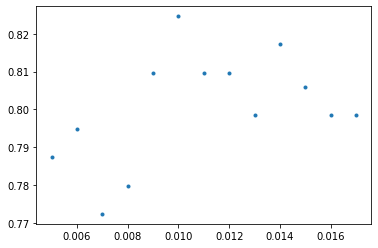

In [562]:
plt.plot(lrs, ac, '.')

In [575]:
ac = []
n_ests = [10, 20, 30, 50, 60, 70]
for n_est in n_ests:
    params = {
        "layers" : [[10, "relu"], [1, "relu"]],
            "optimizer" : 'rmsprop',
            "metrics" : ['mae', 'mse'],
            "loss" : 'mse',
            "epoch" : 20,
            "lr" : 0.01
    }
    model = xgb_keras(n_est = n_est, params = params)
    model.fit(train_data_zeros, np.array(y_train))
    ans = model.predict(train_data_zeros)
    ac.append(metrics.accuracy_score(ans, np.array(y_train)))
    

Epoch 1/20
623/623 [==============================] - 0s 164us/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_squared_error: 0.3836
Epoch 2/20
623/623 [==============================] - 0s 144us/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_squared_error: 0.3836
Epoch 3/20
623/623 [==============================] - 0s 143us/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_squared_error: 0.3836
Epoch 4/20
623/623 [==============================] - 0s 146us/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_squared_error: 0.3836
Epoch 5/20
623/623 [==============================] - 0s 145us/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_squared_error: 0.3836
Epoch 6/20
623/623 [==============================] - 0s 145us/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_squared_error: 0.3836
Epoch 7/20
623/623 [==============================] - 0s 147us/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_squared_error: 0.3836
Epoch 

623/623 [==============================] - 0s 147us/step - loss: 0.1065 - mean_absolute_error: 0.1915 - mean_squared_error: 0.1065
Epoch 19/20
623/623 [==============================] - 0s 142us/step - loss: 0.1069 - mean_absolute_error: 0.1922 - mean_squared_error: 0.1069
Epoch 20/20
623/623 [==============================] - 0s 143us/step - loss: 0.1066 - mean_absolute_error: 0.1916 - mean_squared_error: 0.1066
Epoch 1/20
623/623 [==============================] - 0s 157us/step - loss: 0.1130 - mean_absolute_error: 0.1993 - mean_squared_error: 0.1130
Epoch 2/20
623/623 [==============================] - 0s 149us/step - loss: 0.1063 - mean_absolute_error: 0.1908 - mean_squared_error: 0.1063
Epoch 3/20
623/623 [==============================] - 0s 142us/step - loss: 0.1063 - mean_absolute_error: 0.1908 - mean_squared_error: 0.1063
Epoch 4/20
623/623 [==============================] - 0s 146us/step - loss: 0.1063 - mean_absolute_error: 0.1908 - mean_squared_error: 0.1063
Epoch 5/20
623/

623/623 [==============================] - 0s 141us/step - loss: 0.1063 - mean_absolute_error: 0.1908 - mean_squared_error: 0.1063
Epoch 16/20
623/623 [==============================] - 0s 144us/step - loss: 0.1063 - mean_absolute_error: 0.1908 - mean_squared_error: 0.1063
Epoch 17/20
623/623 [==============================] - 0s 142us/step - loss: 0.1063 - mean_absolute_error: 0.1908 - mean_squared_error: 0.1063
Epoch 18/20
623/623 [==============================] - 0s 140us/step - loss: 0.1063 - mean_absolute_error: 0.1908 - mean_squared_error: 0.1063
Epoch 19/20
623/623 [==============================] - 0s 143us/step - loss: 0.1063 - mean_absolute_error: 0.1908 - mean_squared_error: 0.1063
Epoch 20/20
623/623 [==============================] - 0s 144us/step - loss: 0.1063 - mean_absolute_error: 0.1908 - mean_squared_error: 0.1063
Epoch 1/20
623/623 [==============================] - 0s 149us/step - loss: 0.1089 - mean_absolute_error: 0.1958 - mean_squared_error: 0.1089
Epoch 2/20
6

623/623 [==============================] - 0s 141us/step - loss: 0.1032 - mean_absolute_error: 0.1845 - mean_squared_error: 0.1032
Epoch 13/20
623/623 [==============================] - 0s 142us/step - loss: 0.1032 - mean_absolute_error: 0.1845 - mean_squared_error: 0.1032
Epoch 14/20
623/623 [==============================] - 0s 143us/step - loss: 0.1032 - mean_absolute_error: 0.1845 - mean_squared_error: 0.1032
Epoch 15/20
623/623 [==============================] - 0s 142us/step - loss: 0.1032 - mean_absolute_error: 0.1845 - mean_squared_error: 0.1032
Epoch 16/20
623/623 [==============================] - 0s 144us/step - loss: 0.1032 - mean_absolute_error: 0.1845 - mean_squared_error: 0.1032
Epoch 17/20
623/623 [==============================] - 0s 143us/step - loss: 0.1032 - mean_absolute_error: 0.1845 - mean_squared_error: 0.1032
Epoch 18/20
623/623 [==============================] - 0s 139us/step - loss: 0.1032 - mean_absolute_error: 0.1845 - mean_squared_error: 0.1032
Epoch 19/20

623/623 [==============================] - 0s 144us/step - loss: 0.1459 - mean_absolute_error: 0.2262 - mean_squared_error: 0.1459
Epoch 10/20
623/623 [==============================] - 0s 144us/step - loss: 0.1434 - mean_absolute_error: 0.2285 - mean_squared_error: 0.1434
Epoch 11/20
623/623 [==============================] - 0s 145us/step - loss: 0.1408 - mean_absolute_error: 0.2191 - mean_squared_error: 0.1408
Epoch 12/20
623/623 [==============================] - 0s 142us/step - loss: 0.1438 - mean_absolute_error: 0.2193 - mean_squared_error: 0.1438
Epoch 13/20
623/623 [==============================] - 0s 143us/step - loss: 0.1391 - mean_absolute_error: 0.2173 - mean_squared_error: 0.1391
Epoch 14/20
623/623 [==============================] - 0s 143us/step - loss: 0.1367 - mean_absolute_error: 0.2171 - mean_squared_error: 0.1367
Epoch 15/20
623/623 [==============================] - 0s 144us/step - loss: 0.1344 - mean_absolute_error: 0.2116 - mean_squared_error: 0.1344
Epoch 16/20

623/623 [==============================] - 0s 145us/step - loss: 0.1127 - mean_absolute_error: 0.1905 - mean_squared_error: 0.1127
Epoch 7/20
623/623 [==============================] - 0s 147us/step - loss: 0.1132 - mean_absolute_error: 0.1887 - mean_squared_error: 0.1132
Epoch 8/20
623/623 [==============================] - 0s 146us/step - loss: 0.1127 - mean_absolute_error: 0.1885 - mean_squared_error: 0.1127
Epoch 9/20
623/623 [==============================] - 0s 144us/step - loss: 0.1119 - mean_absolute_error: 0.1858 - mean_squared_error: 0.1119
Epoch 10/20
623/623 [==============================] - 0s 146us/step - loss: 0.1116 - mean_absolute_error: 0.1867 - mean_squared_error: 0.1116
Epoch 11/20
623/623 [==============================] - 0s 144us/step - loss: 0.1128 - mean_absolute_error: 0.1868 - mean_squared_error: 0.1128
Epoch 12/20
623/623 [==============================] - 0s 145us/step - loss: 0.1107 - mean_absolute_error: 0.1859 - mean_squared_error: 0.1107
Epoch 13/20
62

623/623 [==============================] - 0s 150us/step - loss: 0.1033 - mean_absolute_error: 0.1775 - mean_squared_error: 0.1033
Epoch 4/20
623/623 [==============================] - 0s 144us/step - loss: 0.1033 - mean_absolute_error: 0.1775 - mean_squared_error: 0.1033
Epoch 5/20
623/623 [==============================] - 0s 148us/step - loss: 0.1033 - mean_absolute_error: 0.1775 - mean_squared_error: 0.1033
Epoch 6/20
623/623 [==============================] - 0s 148us/step - loss: 0.1033 - mean_absolute_error: 0.1775 - mean_squared_error: 0.1033
Epoch 7/20
623/623 [==============================] - 0s 144us/step - loss: 0.1033 - mean_absolute_error: 0.1775 - mean_squared_error: 0.1033
Epoch 8/20
623/623 [==============================] - 0s 144us/step - loss: 0.1033 - mean_absolute_error: 0.1775 - mean_squared_error: 0.1033
Epoch 9/20
623/623 [==============================] - 0s 149us/step - loss: 0.1033 - mean_absolute_error: 0.1775 - mean_squared_error: 0.1033
Epoch 10/20
623/6

623/623 [==============================] - 0s 145us/step - loss: 0.0955 - mean_absolute_error: 0.1737 - mean_squared_error: 0.0955
Epoch 1/20
623/623 [==============================] - 0s 159us/step - loss: 0.0958 - mean_absolute_error: 0.1750 - mean_squared_error: 0.0958
Epoch 2/20
623/623 [==============================] - 0s 145us/step - loss: 0.0955 - mean_absolute_error: 0.1737 - mean_squared_error: 0.0955
Epoch 3/20
623/623 [==============================] - 0s 147us/step - loss: 0.0955 - mean_absolute_error: 0.1737 - mean_squared_error: 0.0955
Epoch 4/20
623/623 [==============================] - 0s 147us/step - loss: 0.0955 - mean_absolute_error: 0.1737 - mean_squared_error: 0.0955
Epoch 5/20
623/623 [==============================] - 0s 148us/step - loss: 0.0955 - mean_absolute_error: 0.1737 - mean_squared_error: 0.0955
Epoch 6/20
623/623 [==============================] - 0s 142us/step - loss: 0.0955 - mean_absolute_error: 0.1737 - mean_squared_error: 0.0955
Epoch 7/20
623/62

623/623 [==============================] - 0s 150us/step - loss: 0.0954 - mean_absolute_error: 0.1736 - mean_squared_error: 0.0954
Epoch 18/20
623/623 [==============================] - 0s 148us/step - loss: 0.0954 - mean_absolute_error: 0.1736 - mean_squared_error: 0.0954
Epoch 19/20
623/623 [==============================] - 0s 145us/step - loss: 0.0954 - mean_absolute_error: 0.1736 - mean_squared_error: 0.0954
Epoch 20/20
623/623 [==============================] - 0s 144us/step - loss: 0.0954 - mean_absolute_error: 0.1736 - mean_squared_error: 0.0954
Epoch 1/20
623/623 [==============================] - 0s 155us/step - loss: 0.1142 - mean_absolute_error: 0.1871 - mean_squared_error: 0.1142
Epoch 2/20
623/623 [==============================] - 0s 149us/step - loss: 0.0950 - mean_absolute_error: 0.1735 - mean_squared_error: 0.0950
Epoch 3/20
623/623 [==============================] - 0s 147us/step - loss: 0.0951 - mean_absolute_error: 0.1733 - mean_squared_error: 0.0951
Epoch 4/20
623

623/623 [==============================] - 0s 142us/step - loss: 0.0903 - mean_absolute_error: 0.1936 - mean_squared_error: 0.0903
Epoch 15/20
623/623 [==============================] - 0s 148us/step - loss: 0.0903 - mean_absolute_error: 0.1936 - mean_squared_error: 0.0903
Epoch 16/20
623/623 [==============================] - 0s 149us/step - loss: 0.0903 - mean_absolute_error: 0.1936 - mean_squared_error: 0.0903
Epoch 17/20
623/623 [==============================] - 0s 148us/step - loss: 0.0903 - mean_absolute_error: 0.1936 - mean_squared_error: 0.0903
Epoch 18/20
623/623 [==============================] - 0s 148us/step - loss: 0.0903 - mean_absolute_error: 0.1936 - mean_squared_error: 0.0903
Epoch 19/20
623/623 [==============================] - 0s 147us/step - loss: 0.0903 - mean_absolute_error: 0.1936 - mean_squared_error: 0.0903
Epoch 20/20
623/623 [==============================] - 0s 147us/step - loss: 0.0903 - mean_absolute_error: 0.1936 - mean_squared_error: 0.0903
Epoch 1/20


623/623 [==============================] - 0s 142us/step - loss: 0.0903 - mean_absolute_error: 0.1936 - mean_squared_error: 0.0903
Epoch 12/20
623/623 [==============================] - 0s 151us/step - loss: 0.0903 - mean_absolute_error: 0.1936 - mean_squared_error: 0.0903
Epoch 13/20
623/623 [==============================] - 0s 147us/step - loss: 0.0903 - mean_absolute_error: 0.1936 - mean_squared_error: 0.0903
Epoch 14/20
623/623 [==============================] - 0s 146us/step - loss: 0.0903 - mean_absolute_error: 0.1936 - mean_squared_error: 0.0903
Epoch 15/20
623/623 [==============================] - 0s 150us/step - loss: 0.0903 - mean_absolute_error: 0.1936 - mean_squared_error: 0.0903
Epoch 16/20
623/623 [==============================] - 0s 141us/step - loss: 0.0903 - mean_absolute_error: 0.1936 - mean_squared_error: 0.0903
Epoch 17/20
623/623 [==============================] - 0s 145us/step - loss: 0.0903 - mean_absolute_error: 0.1936 - mean_squared_error: 0.0903
Epoch 18/20

623/623 [==============================] - 0s 153us/step - loss: 0.1015 - mean_absolute_error: 0.2122 - mean_squared_error: 0.1015
Epoch 9/20
623/623 [==============================] - 0s 148us/step - loss: 0.1015 - mean_absolute_error: 0.2122 - mean_squared_error: 0.1015
Epoch 10/20
623/623 [==============================] - 0s 149us/step - loss: 0.1015 - mean_absolute_error: 0.2122 - mean_squared_error: 0.1015
Epoch 11/20
623/623 [==============================] - 0s 149us/step - loss: 0.1015 - mean_absolute_error: 0.2122 - mean_squared_error: 0.1015
Epoch 12/20
623/623 [==============================] - 0s 149us/step - loss: 0.1015 - mean_absolute_error: 0.2122 - mean_squared_error: 0.1015
Epoch 13/20
623/623 [==============================] - 0s 151us/step - loss: 0.1015 - mean_absolute_error: 0.2122 - mean_squared_error: 0.1015
Epoch 14/20
623/623 [==============================] - 0s 142us/step - loss: 0.1015 - mean_absolute_error: 0.2122 - mean_squared_error: 0.1015
Epoch 15/20


623/623 [==============================] - 0s 150us/step - loss: 0.1015 - mean_absolute_error: 0.2122 - mean_squared_error: 0.1015
Epoch 6/20
623/623 [==============================] - 0s 149us/step - loss: 0.1015 - mean_absolute_error: 0.2122 - mean_squared_error: 0.1015
Epoch 7/20
623/623 [==============================] - 0s 149us/step - loss: 0.1015 - mean_absolute_error: 0.2122 - mean_squared_error: 0.1015
Epoch 8/20
623/623 [==============================] - 0s 151us/step - loss: 0.1015 - mean_absolute_error: 0.2122 - mean_squared_error: 0.1015
Epoch 9/20
623/623 [==============================] - 0s 151us/step - loss: 0.1015 - mean_absolute_error: 0.2122 - mean_squared_error: 0.1015
Epoch 10/20
623/623 [==============================] - 0s 150us/step - loss: 0.1015 - mean_absolute_error: 0.2122 - mean_squared_error: 0.1015
Epoch 11/20
623/623 [==============================] - 0s 151us/step - loss: 0.1015 - mean_absolute_error: 0.2122 - mean_squared_error: 0.1015
Epoch 12/20
623

623/623 [==============================] - 0s 148us/step - loss: 0.1013 - mean_absolute_error: 0.2121 - mean_squared_error: 0.1013
Epoch 3/20
623/623 [==============================] - 0s 148us/step - loss: 0.1012 - mean_absolute_error: 0.2117 - mean_squared_error: 0.1012
Epoch 4/20
623/623 [==============================] - 0s 149us/step - loss: 0.1014 - mean_absolute_error: 0.2119 - mean_squared_error: 0.1014
Epoch 5/20
623/623 [==============================] - 0s 152us/step - loss: 0.1014 - mean_absolute_error: 0.2119 - mean_squared_error: 0.1014
Epoch 6/20
623/623 [==============================] - 0s 143us/step - loss: 0.1014 - mean_absolute_error: 0.2119 - mean_squared_error: 0.1014
Epoch 7/20
623/623 [==============================] - 0s 142us/step - loss: 0.1014 - mean_absolute_error: 0.2119 - mean_squared_error: 0.1014
Epoch 8/20
623/623 [==============================] - 0s 148us/step - loss: 0.1014 - mean_absolute_error: 0.2119 - mean_squared_error: 0.1014
Epoch 9/20
623/62

623/623 [==============================] - 0s 153us/step - loss: 0.1014 - mean_absolute_error: 0.2119 - mean_squared_error: 0.1014
Epoch 20/20
623/623 [==============================] - 0s 151us/step - loss: 0.1014 - mean_absolute_error: 0.2119 - mean_squared_error: 0.1014
Epoch 1/20
623/623 [==============================] - 0s 160us/step - loss: 0.1026 - mean_absolute_error: 0.2150 - mean_squared_error: 0.1026
Epoch 2/20
623/623 [==============================] - 0s 152us/step - loss: 0.1014 - mean_absolute_error: 0.2119 - mean_squared_error: 0.1014
Epoch 3/20
623/623 [==============================] - 0s 153us/step - loss: 0.1014 - mean_absolute_error: 0.2119 - mean_squared_error: 0.1014
Epoch 4/20
623/623 [==============================] - 0s 153us/step - loss: 0.1014 - mean_absolute_error: 0.2119 - mean_squared_error: 0.1014
Epoch 5/20
623/623 [==============================] - 0s 149us/step - loss: 0.1014 - mean_absolute_error: 0.2119 - mean_squared_error: 0.1014
Epoch 6/20
623/6

623/623 [==============================] - 0s 148us/step - loss: 0.1010 - mean_absolute_error: 0.2110 - mean_squared_error: 0.1010
Epoch 17/20
623/623 [==============================] - 0s 151us/step - loss: 0.1010 - mean_absolute_error: 0.2110 - mean_squared_error: 0.1010
Epoch 18/20
623/623 [==============================] - 0s 148us/step - loss: 0.1011 - mean_absolute_error: 0.2111 - mean_squared_error: 0.1011
Epoch 19/20
623/623 [==============================] - 0s 152us/step - loss: 0.1010 - mean_absolute_error: 0.2111 - mean_squared_error: 0.1010
Epoch 20/20
623/623 [==============================] - 0s 144us/step - loss: 0.1010 - mean_absolute_error: 0.2111 - mean_squared_error: 0.1010
Epoch 1/20
623/623 [==============================] - 0s 157us/step - loss: 0.1011 - mean_absolute_error: 0.2112 - mean_squared_error: 0.1011
Epoch 2/20
623/623 [==============================] - 0s 151us/step - loss: 0.1011 - mean_absolute_error: 0.2112 - mean_squared_error: 0.1011
Epoch 3/20
62

623/623 [==============================] - 0s 149us/step - loss: 0.1011 - mean_absolute_error: 0.2112 - mean_squared_error: 0.1011
Epoch 14/20
623/623 [==============================] - 0s 151us/step - loss: 0.1011 - mean_absolute_error: 0.2112 - mean_squared_error: 0.1011
Epoch 15/20
623/623 [==============================] - 0s 149us/step - loss: 0.1011 - mean_absolute_error: 0.2112 - mean_squared_error: 0.1011
Epoch 16/20
623/623 [==============================] - 0s 148us/step - loss: 0.1011 - mean_absolute_error: 0.2112 - mean_squared_error: 0.1011
Epoch 17/20
623/623 [==============================] - 0s 149us/step - loss: 0.1011 - mean_absolute_error: 0.2112 - mean_squared_error: 0.1011
Epoch 18/20
623/623 [==============================] - 0s 149us/step - loss: 0.1011 - mean_absolute_error: 0.2112 - mean_squared_error: 0.1011
Epoch 19/20
623/623 [==============================] - 0s 150us/step - loss: 0.1011 - mean_absolute_error: 0.2112 - mean_squared_error: 0.1011
Epoch 20/20

623/623 [==============================] - 0s 148us/step - loss: 0.0996 - mean_absolute_error: 0.2090 - mean_squared_error: 0.0996
Epoch 11/20
623/623 [==============================] - 0s 146us/step - loss: 0.0996 - mean_absolute_error: 0.2090 - mean_squared_error: 0.0996
Epoch 12/20
623/623 [==============================] - 0s 149us/step - loss: 0.0996 - mean_absolute_error: 0.2090 - mean_squared_error: 0.0996
Epoch 13/20
623/623 [==============================] - 0s 148us/step - loss: 0.0996 - mean_absolute_error: 0.2090 - mean_squared_error: 0.0996
Epoch 14/20
623/623 [==============================] - 0s 150us/step - loss: 0.0996 - mean_absolute_error: 0.2090 - mean_squared_error: 0.0996
Epoch 15/20
623/623 [==============================] - 0s 151us/step - loss: 0.0996 - mean_absolute_error: 0.2090 - mean_squared_error: 0.0996
Epoch 16/20
623/623 [==============================] - 0s 150us/step - loss: 0.0996 - mean_absolute_error: 0.2090 - mean_squared_error: 0.0996
Epoch 17/20

623/623 [==============================] - 0s 147us/step - loss: 0.0996 - mean_absolute_error: 0.2090 - mean_squared_error: 0.0996
Epoch 8/20
623/623 [==============================] - 0s 148us/step - loss: 0.0996 - mean_absolute_error: 0.2090 - mean_squared_error: 0.0996
Epoch 9/20
623/623 [==============================] - 0s 151us/step - loss: 0.0996 - mean_absolute_error: 0.2090 - mean_squared_error: 0.0996
Epoch 10/20
623/623 [==============================] - 0s 150us/step - loss: 0.0996 - mean_absolute_error: 0.2090 - mean_squared_error: 0.0996
Epoch 11/20
623/623 [==============================] - 0s 151us/step - loss: 0.0996 - mean_absolute_error: 0.2090 - mean_squared_error: 0.0996
Epoch 12/20
623/623 [==============================] - 0s 152us/step - loss: 0.0996 - mean_absolute_error: 0.2090 - mean_squared_error: 0.0996
Epoch 13/20
623/623 [==============================] - 0s 153us/step - loss: 0.0996 - mean_absolute_error: 0.2090 - mean_squared_error: 0.0996
Epoch 14/20
6

623/623 [==============================] - 0s 149us/step - loss: 0.0995 - mean_absolute_error: 0.2087 - mean_squared_error: 0.0995
Epoch 5/20
623/623 [==============================] - 0s 152us/step - loss: 0.0996 - mean_absolute_error: 0.2090 - mean_squared_error: 0.0996
Epoch 6/20
623/623 [==============================] - 0s 150us/step - loss: 0.0996 - mean_absolute_error: 0.2091 - mean_squared_error: 0.0996
Epoch 7/20
623/623 [==============================] - 0s 141us/step - loss: 0.0996 - mean_absolute_error: 0.2090 - mean_squared_error: 0.0996
Epoch 8/20
623/623 [==============================] - 0s 148us/step - loss: 0.0996 - mean_absolute_error: 0.2090 - mean_squared_error: 0.0996
Epoch 9/20
623/623 [==============================] - 0s 150us/step - loss: 0.0996 - mean_absolute_error: 0.2090 - mean_squared_error: 0.0996
Epoch 10/20
623/623 [==============================] - 0s 151us/step - loss: 0.0996 - mean_absolute_error: 0.2090 - mean_squared_error: 0.0996
Epoch 11/20
623/

623/623 [==============================] - 0s 154us/step - loss: 0.0997 - mean_absolute_error: 0.2096 - mean_squared_error: 0.0997
Epoch 2/20
623/623 [==============================] - 0s 153us/step - loss: 0.0995 - mean_absolute_error: 0.2088 - mean_squared_error: 0.0995
Epoch 3/20
623/623 [==============================] - 0s 148us/step - loss: 0.0995 - mean_absolute_error: 0.2088 - mean_squared_error: 0.0995
Epoch 4/20
623/623 [==============================] - 0s 147us/step - loss: 0.0995 - mean_absolute_error: 0.2088 - mean_squared_error: 0.0995
Epoch 5/20
623/623 [==============================] - 0s 147us/step - loss: 0.0995 - mean_absolute_error: 0.2088 - mean_squared_error: 0.0995
Epoch 6/20
623/623 [==============================] - 0s 149us/step - loss: 0.0995 - mean_absolute_error: 0.2088 - mean_squared_error: 0.0995
Epoch 7/20
623/623 [==============================] - 0s 154us/step - loss: 0.0995 - mean_absolute_error: 0.2088 - mean_squared_error: 0.0995
Epoch 8/20
623/62

623/623 [==============================] - 0s 151us/step - loss: 0.0995 - mean_absolute_error: 0.2088 - mean_squared_error: 0.0995
Epoch 19/20
623/623 [==============================] - 0s 149us/step - loss: 0.0995 - mean_absolute_error: 0.2088 - mean_squared_error: 0.0995
Epoch 20/20
623/623 [==============================] - 0s 149us/step - loss: 0.0995 - mean_absolute_error: 0.2088 - mean_squared_error: 0.0995
Epoch 1/20
623/623 [==============================] - 0s 156us/step - loss: 0.2682 - mean_absolute_error: 0.3764 - mean_squared_error: 0.2682
Epoch 2/20
623/623 [==============================] - 0s 148us/step - loss: 0.1622 - mean_absolute_error: 0.2765 - mean_squared_error: 0.1622
Epoch 3/20
623/623 [==============================] - 0s 149us/step - loss: 0.1516 - mean_absolute_error: 0.2654 - mean_squared_error: 0.1516
Epoch 4/20
623/623 [==============================] - 0s 149us/step - loss: 0.1450 - mean_absolute_error: 0.2531 - mean_squared_error: 0.1450
Epoch 5/20
623/

623/623 [==============================] - 0s 147us/step - loss: 0.1158 - mean_absolute_error: 0.2141 - mean_squared_error: 0.1158
Epoch 16/20
623/623 [==============================] - 0s 139us/step - loss: 0.1158 - mean_absolute_error: 0.2141 - mean_squared_error: 0.1158
Epoch 17/20
623/623 [==============================] - 0s 145us/step - loss: 0.1158 - mean_absolute_error: 0.2141 - mean_squared_error: 0.1158
Epoch 18/20
623/623 [==============================] - 0s 149us/step - loss: 0.1158 - mean_absolute_error: 0.2141 - mean_squared_error: 0.1158
Epoch 19/20
623/623 [==============================] - 0s 147us/step - loss: 0.1158 - mean_absolute_error: 0.2141 - mean_squared_error: 0.1158
Epoch 20/20
623/623 [==============================] - 0s 148us/step - loss: 0.1158 - mean_absolute_error: 0.2141 - mean_squared_error: 0.1158
Epoch 1/20
623/623 [==============================] - 0s 321us/step - loss: 0.1182 - mean_absolute_error: 0.2172 - mean_squared_error: 0.1182
Epoch 2/20
6

623/623 [==============================] - 0s 145us/step - loss: 0.1158 - mean_absolute_error: 0.2141 - mean_squared_error: 0.1158
Epoch 13/20
623/623 [==============================] - 0s 142us/step - loss: 0.1158 - mean_absolute_error: 0.2141 - mean_squared_error: 0.1158
Epoch 14/20
623/623 [==============================] - 0s 156us/step - loss: 0.1158 - mean_absolute_error: 0.2141 - mean_squared_error: 0.1158
Epoch 15/20
623/623 [==============================] - 0s 166us/step - loss: 0.1158 - mean_absolute_error: 0.2141 - mean_squared_error: 0.1158
Epoch 16/20
623/623 [==============================] - 0s 158us/step - loss: 0.1158 - mean_absolute_error: 0.2141 - mean_squared_error: 0.1158
Epoch 17/20
623/623 [==============================] - 0s 152us/step - loss: 0.1158 - mean_absolute_error: 0.2141 - mean_squared_error: 0.1158
Epoch 18/20
623/623 [==============================] - 0s 159us/step - loss: 0.1158 - mean_absolute_error: 0.2141 - mean_squared_error: 0.1158
Epoch 19/20

623/623 [==============================] - 0s 142us/step - loss: 0.1082 - mean_absolute_error: 0.2099 - mean_squared_error: 0.1082
Epoch 10/20
623/623 [==============================] - 0s 146us/step - loss: 0.1082 - mean_absolute_error: 0.2099 - mean_squared_error: 0.1082
Epoch 11/20
623/623 [==============================] - 0s 147us/step - loss: 0.1082 - mean_absolute_error: 0.2099 - mean_squared_error: 0.1082
Epoch 12/20
623/623 [==============================] - 0s 142us/step - loss: 0.1082 - mean_absolute_error: 0.2099 - mean_squared_error: 0.1082
Epoch 13/20
623/623 [==============================] - 0s 151us/step - loss: 0.1082 - mean_absolute_error: 0.2099 - mean_squared_error: 0.1082
Epoch 14/20
623/623 [==============================] - 0s 144us/step - loss: 0.1082 - mean_absolute_error: 0.2099 - mean_squared_error: 0.1082
Epoch 15/20
623/623 [==============================] - 0s 141us/step - loss: 0.1082 - mean_absolute_error: 0.2099 - mean_squared_error: 0.1082
Epoch 16/20

623/623 [==============================] - 0s 170us/step - loss: 0.1079 - mean_absolute_error: 0.2117 - mean_squared_error: 0.1079
Epoch 7/20
623/623 [==============================] - 0s 175us/step - loss: 0.1083 - mean_absolute_error: 0.2116 - mean_squared_error: 0.1083
Epoch 8/20
623/623 [==============================] - 0s 174us/step - loss: 0.1081 - mean_absolute_error: 0.2118 - mean_squared_error: 0.1081
Epoch 9/20
623/623 [==============================] - 0s 174us/step - loss: 0.1075 - mean_absolute_error: 0.2105 - mean_squared_error: 0.1075
Epoch 10/20
623/623 [==============================] - 0s 172us/step - loss: 0.1074 - mean_absolute_error: 0.2124 - mean_squared_error: 0.1074
Epoch 11/20
623/623 [==============================] - 0s 170us/step - loss: 0.1083 - mean_absolute_error: 0.2111 - mean_squared_error: 0.1083
Epoch 12/20
623/623 [==============================] - 0s 146us/step - loss: 0.1082 - mean_absolute_error: 0.2113 - mean_squared_error: 0.1082
Epoch 13/20
62

623/623 [==============================] - 0s 144us/step - loss: 0.1060 - mean_absolute_error: 0.2127 - mean_squared_error: 0.1060
Epoch 4/20
623/623 [==============================] - 0s 142us/step - loss: 0.1056 - mean_absolute_error: 0.2126 - mean_squared_error: 0.1056
Epoch 5/20
623/623 [==============================] - 0s 144us/step - loss: 0.1060 - mean_absolute_error: 0.2126 - mean_squared_error: 0.1060
Epoch 6/20
623/623 [==============================] - 0s 154us/step - loss: 0.1067 - mean_absolute_error: 0.2132 - mean_squared_error: 0.1067
Epoch 7/20
623/623 [==============================] - 0s 158us/step - loss: 0.1066 - mean_absolute_error: 0.2126 - mean_squared_error: 0.1066
Epoch 8/20
623/623 [==============================] - 0s 153us/step - loss: 0.1066 - mean_absolute_error: 0.2126 - mean_squared_error: 0.1066
Epoch 9/20
623/623 [==============================] - 0s 149us/step - loss: 0.1066 - mean_absolute_error: 0.2126 - mean_squared_error: 0.1066
Epoch 10/20
623/6

623/623 [==============================] - 0s 151us/step - loss: 0.1050 - mean_absolute_error: 0.2113 - mean_squared_error: 0.1050
Epoch 1/20
623/623 [==============================] - 0s 159us/step - loss: 0.1111 - mean_absolute_error: 0.2219 - mean_squared_error: 0.1111
Epoch 2/20
623/623 [==============================] - 0s 150us/step - loss: 0.1040 - mean_absolute_error: 0.2107 - mean_squared_error: 0.1040
Epoch 3/20
623/623 [==============================] - 0s 150us/step - loss: 0.1044 - mean_absolute_error: 0.2124 - mean_squared_error: 0.1044
Epoch 4/20
623/623 [==============================] - 0s 151us/step - loss: 0.1037 - mean_absolute_error: 0.2105 - mean_squared_error: 0.1037
Epoch 5/20
623/623 [==============================] - 0s 148us/step - loss: 0.1034 - mean_absolute_error: 0.2102 - mean_squared_error: 0.1034
Epoch 6/20
623/623 [==============================] - 0s 142us/step - loss: 0.1031 - mean_absolute_error: 0.2093 - mean_squared_error: 0.1031
Epoch 7/20
623/62

623/623 [==============================] - 0s 147us/step - loss: 0.1031 - mean_absolute_error: 0.2095 - mean_squared_error: 0.1031
Epoch 18/20
623/623 [==============================] - 0s 143us/step - loss: 0.1031 - mean_absolute_error: 0.2095 - mean_squared_error: 0.1031
Epoch 19/20
623/623 [==============================] - 0s 142us/step - loss: 0.1031 - mean_absolute_error: 0.2095 - mean_squared_error: 0.1031
Epoch 20/20
623/623 [==============================] - 0s 144us/step - loss: 0.1031 - mean_absolute_error: 0.2095 - mean_squared_error: 0.1031
Epoch 1/20
623/623 [==============================] - 0s 152us/step - loss: 0.1240 - mean_absolute_error: 0.2346 - mean_squared_error: 0.1240
Epoch 2/20
623/623 [==============================] - 0s 143us/step - loss: 0.1044 - mean_absolute_error: 0.2110 - mean_squared_error: 0.1044
Epoch 3/20
623/623 [==============================] - 0s 141us/step - loss: 0.1032 - mean_absolute_error: 0.2097 - mean_squared_error: 0.1032
Epoch 4/20
623

623/623 [==============================] - 0s 146us/step - loss: 0.1031 - mean_absolute_error: 0.2095 - mean_squared_error: 0.1031
Epoch 15/20
623/623 [==============================] - 0s 145us/step - loss: 0.1031 - mean_absolute_error: 0.2095 - mean_squared_error: 0.1031
Epoch 16/20
623/623 [==============================] - 0s 148us/step - loss: 0.1031 - mean_absolute_error: 0.2095 - mean_squared_error: 0.1031
Epoch 17/20
623/623 [==============================] - 0s 145us/step - loss: 0.1031 - mean_absolute_error: 0.2095 - mean_squared_error: 0.1031
Epoch 18/20
623/623 [==============================] - 0s 137us/step - loss: 0.1031 - mean_absolute_error: 0.2095 - mean_squared_error: 0.1031
Epoch 19/20
623/623 [==============================] - 0s 144us/step - loss: 0.1031 - mean_absolute_error: 0.2095 - mean_squared_error: 0.1031
Epoch 20/20
623/623 [==============================] - 0s 144us/step - loss: 0.1031 - mean_absolute_error: 0.2095 - mean_squared_error: 0.1031
Epoch 1/20


623/623 [==============================] - 0s 144us/step - loss: 0.1031 - mean_absolute_error: 0.2095 - mean_squared_error: 0.1031
Epoch 12/20
623/623 [==============================] - 0s 145us/step - loss: 0.1031 - mean_absolute_error: 0.2095 - mean_squared_error: 0.1031
Epoch 13/20
623/623 [==============================] - 0s 150us/step - loss: 0.1031 - mean_absolute_error: 0.2095 - mean_squared_error: 0.1031
Epoch 14/20
623/623 [==============================] - 0s 147us/step - loss: 0.1031 - mean_absolute_error: 0.2095 - mean_squared_error: 0.1031
Epoch 15/20
623/623 [==============================] - 0s 140us/step - loss: 0.1031 - mean_absolute_error: 0.2095 - mean_squared_error: 0.1031
Epoch 16/20
623/623 [==============================] - 0s 148us/step - loss: 0.1031 - mean_absolute_error: 0.2095 - mean_squared_error: 0.1031
Epoch 17/20
623/623 [==============================] - 0s 150us/step - loss: 0.1031 - mean_absolute_error: 0.2095 - mean_squared_error: 0.1031
Epoch 18/20

623/623 [==============================] - 0s 148us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 9/20
623/623 [==============================] - 0s 147us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 10/20
623/623 [==============================] - 0s 148us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 11/20
623/623 [==============================] - 0s 147us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 12/20
623/623 [==============================] - 0s 150us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 13/20
623/623 [==============================] - 0s 148us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 14/20
623/623 [==============================] - 0s 145us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 15/20


623/623 [==============================] - 0s 146us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 6/20
623/623 [==============================] - 0s 145us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 7/20
623/623 [==============================] - 0s 152us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 8/20
623/623 [==============================] - 0s 147us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 9/20
623/623 [==============================] - 0s 146us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 10/20
623/623 [==============================] - 0s 147us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 11/20
623/623 [==============================] - 0s 149us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 12/20
623

623/623 [==============================] - 0s 146us/step - loss: 0.1022 - mean_absolute_error: 0.2079 - mean_squared_error: 0.1022
Epoch 3/20
623/623 [==============================] - 0s 149us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 4/20
623/623 [==============================] - 0s 146us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 5/20
623/623 [==============================] - 0s 147us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 6/20
623/623 [==============================] - 0s 150us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 7/20
623/623 [==============================] - 0s 145us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 8/20
623/623 [==============================] - 0s 147us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 9/20
623/62

623/623 [==============================] - 0s 150us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 20/20
623/623 [==============================] - 0s 147us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 1/20
623/623 [==============================] - 0s 157us/step - loss: 0.1022 - mean_absolute_error: 0.2079 - mean_squared_error: 0.1022
Epoch 2/20
623/623 [==============================] - 0s 141us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 3/20
623/623 [==============================] - 0s 146us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 4/20
623/623 [==============================] - 0s 148us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 5/20
623/623 [==============================] - 0s 147us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 6/20
623/6

623/623 [==============================] - 0s 144us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 17/20
623/623 [==============================] - 0s 140us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 18/20
623/623 [==============================] - 0s 149us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 19/20
623/623 [==============================] - 0s 164us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 20/20
623/623 [==============================] - 0s 162us/step - loss: 0.1022 - mean_absolute_error: 0.2078 - mean_squared_error: 0.1022
Epoch 1/20
623/623 [==============================] - 0s 152us/step - loss: 0.1049 - mean_absolute_error: 0.2105 - mean_squared_error: 0.1049
Epoch 2/20
623/623 [==============================] - 0s 147us/step - loss: 0.1022 - mean_absolute_error: 0.2079 - mean_squared_error: 0.1022
Epoch 3/20
62

623/623 [==============================] - 0s 146us/step - loss: 0.1020 - mean_absolute_error: 0.2071 - mean_squared_error: 0.1020
Epoch 14/20
623/623 [==============================] - 0s 150us/step - loss: 0.1020 - mean_absolute_error: 0.2071 - mean_squared_error: 0.1020
Epoch 15/20
623/623 [==============================] - 0s 139us/step - loss: 0.1020 - mean_absolute_error: 0.2071 - mean_squared_error: 0.1020
Epoch 16/20
623/623 [==============================] - 0s 151us/step - loss: 0.1020 - mean_absolute_error: 0.2071 - mean_squared_error: 0.1020
Epoch 17/20
623/623 [==============================] - 0s 148us/step - loss: 0.1020 - mean_absolute_error: 0.2071 - mean_squared_error: 0.1020
Epoch 18/20
623/623 [==============================] - 0s 164us/step - loss: 0.1020 - mean_absolute_error: 0.2071 - mean_squared_error: 0.1020
Epoch 19/20
623/623 [==============================] - 0s 158us/step - loss: 0.1020 - mean_absolute_error: 0.2071 - mean_squared_error: 0.1020
Epoch 20/20

623/623 [==============================] - 0s 160us/step - loss: 0.1019 - mean_absolute_error: 0.2069 - mean_squared_error: 0.1019
Epoch 11/20
623/623 [==============================] - 0s 154us/step - loss: 0.1021 - mean_absolute_error: 0.2070 - mean_squared_error: 0.1021
Epoch 12/20
623/623 [==============================] - 0s 149us/step - loss: 0.1025 - mean_absolute_error: 0.2072 - mean_squared_error: 0.1025
Epoch 13/20
623/623 [==============================] - 0s 144us/step - loss: 0.1020 - mean_absolute_error: 0.2071 - mean_squared_error: 0.1020
Epoch 14/20
623/623 [==============================] - 0s 144us/step - loss: 0.1020 - mean_absolute_error: 0.2071 - mean_squared_error: 0.1020
Epoch 15/20
623/623 [==============================] - 0s 150us/step - loss: 0.1020 - mean_absolute_error: 0.2071 - mean_squared_error: 0.1020
Epoch 16/20
623/623 [==============================] - 0s 147us/step - loss: 0.1020 - mean_absolute_error: 0.2071 - mean_squared_error: 0.1020
Epoch 17/20

623/623 [==============================] - 0s 147us/step - loss: 0.1020 - mean_absolute_error: 0.2071 - mean_squared_error: 0.1020
Epoch 8/20
623/623 [==============================] - 0s 154us/step - loss: 0.1020 - mean_absolute_error: 0.2071 - mean_squared_error: 0.1020
Epoch 9/20
623/623 [==============================] - 0s 150us/step - loss: 0.1020 - mean_absolute_error: 0.2071 - mean_squared_error: 0.1020
Epoch 10/20
623/623 [==============================] - 0s 150us/step - loss: 0.1020 - mean_absolute_error: 0.2071 - mean_squared_error: 0.1020
Epoch 11/20
623/623 [==============================] - 0s 143us/step - loss: 0.1020 - mean_absolute_error: 0.2071 - mean_squared_error: 0.1020
Epoch 12/20
623/623 [==============================] - 0s 141us/step - loss: 0.1020 - mean_absolute_error: 0.2071 - mean_squared_error: 0.1020
Epoch 13/20
623/623 [==============================] - 0s 144us/step - loss: 0.1020 - mean_absolute_error: 0.2071 - mean_squared_error: 0.1020
Epoch 14/20
6

623/623 [==============================] - 0s 148us/step - loss: 0.1171 - mean_absolute_error: 0.2525 - mean_squared_error: 0.1171
Epoch 5/20
623/623 [==============================] - 0s 150us/step - loss: 0.1171 - mean_absolute_error: 0.2529 - mean_squared_error: 0.1171
Epoch 6/20
623/623 [==============================] - 0s 168us/step - loss: 0.1172 - mean_absolute_error: 0.2532 - mean_squared_error: 0.1172
Epoch 7/20
623/623 [==============================] - 0s 149us/step - loss: 0.1164 - mean_absolute_error: 0.2518 - mean_squared_error: 0.1164
Epoch 8/20
623/623 [==============================] - 0s 144us/step - loss: 0.1161 - mean_absolute_error: 0.2519 - mean_squared_error: 0.1161
Epoch 9/20
623/623 [==============================] - 0s 155us/step - loss: 0.1156 - mean_absolute_error: 0.2504 - mean_squared_error: 0.1156
Epoch 10/20
623/623 [==============================] - 0s 151us/step - loss: 0.1158 - mean_absolute_error: 0.2508 - mean_squared_error: 0.1158
Epoch 11/20
623/

623/623 [==============================] - 0s 158us/step - loss: 0.1204 - mean_absolute_error: 0.2585 - mean_squared_error: 0.1204
Epoch 2/20
623/623 [==============================] - 0s 148us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 3/20
623/623 [==============================] - 0s 147us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 4/20
623/623 [==============================] - 0s 150us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 5/20
623/623 [==============================] - 0s 140us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 6/20
623/623 [==============================] - 0s 148us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 7/20
623/623 [==============================] - 0s 152us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 8/20
623/62

623/623 [==============================] - 0s 150us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 19/20
623/623 [==============================] - 0s 149us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 20/20
623/623 [==============================] - 0s 149us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 1/20
623/623 [==============================] - 0s 152us/step - loss: 0.1264 - mean_absolute_error: 0.2628 - mean_squared_error: 0.1264
Epoch 2/20
623/623 [==============================] - 0s 144us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 3/20
623/623 [==============================] - 0s 141us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 4/20
623/623 [==============================] - 0s 148us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 5/20
623/

623/623 [==============================] - 0s 148us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 16/20
623/623 [==============================] - 0s 150us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 17/20
623/623 [==============================] - 0s 145us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 18/20
623/623 [==============================] - 0s 142us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 19/20
623/623 [==============================] - 0s 146us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 20/20
623/623 [==============================] - 0s 142us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 1/20
623/623 [==============================] - 0s 151us/step - loss: 0.1185 - mean_absolute_error: 0.2532 - mean_squared_error: 0.1185
Epoch 2/20
6

623/623 [==============================] - 0s 147us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 13/20
623/623 [==============================] - 0s 148us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 14/20
623/623 [==============================] - 0s 147us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 15/20
623/623 [==============================] - 0s 149us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 16/20
623/623 [==============================] - 0s 141us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 17/20
623/623 [==============================] - 0s 138us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 18/20
623/623 [==============================] - 0s 145us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 19/20

623/623 [==============================] - 0s 138us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 10/20
623/623 [==============================] - 0s 147us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 11/20
623/623 [==============================] - 0s 151us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 12/20
623/623 [==============================] - 0s 150us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 13/20
623/623 [==============================] - 0s 145us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 14/20
623/623 [==============================] - 0s 140us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 15/20
623/623 [==============================] - 0s 145us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 16/20

623/623 [==============================] - 0s 150us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 7/20
623/623 [==============================] - 0s 146us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 8/20
623/623 [==============================] - 0s 148us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 9/20
623/623 [==============================] - 0s 150us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 10/20
623/623 [==============================] - 0s 138us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 11/20
623/623 [==============================] - 0s 145us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 12/20
623/623 [==============================] - 0s 150us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 13/20
62

623/623 [==============================] - 0s 150us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 4/20
623/623 [==============================] - 0s 148us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 5/20
623/623 [==============================] - 0s 149us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 6/20
623/623 [==============================] - 0s 151us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 7/20
623/623 [==============================] - 0s 148us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 8/20
623/623 [==============================] - 0s 146us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 9/20
623/623 [==============================] - 0s 142us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 10/20
623/6

623/623 [==============================] - 0s 143us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 1/20
623/623 [==============================] - 0s 152us/step - loss: 0.1328 - mean_absolute_error: 0.2692 - mean_squared_error: 0.1328
Epoch 2/20
623/623 [==============================] - 0s 143us/step - loss: 0.1157 - mean_absolute_error: 0.2508 - mean_squared_error: 0.1157
Epoch 3/20
623/623 [==============================] - 0s 147us/step - loss: 0.1155 - mean_absolute_error: 0.2503 - mean_squared_error: 0.1155
Epoch 4/20
623/623 [==============================] - 0s 144us/step - loss: 0.1158 - mean_absolute_error: 0.2507 - mean_squared_error: 0.1158
Epoch 5/20
623/623 [==============================] - 0s 142us/step - loss: 0.1158 - mean_absolute_error: 0.2506 - mean_squared_error: 0.1158
Epoch 6/20
623/623 [==============================] - 0s 142us/step - loss: 0.1157 - mean_absolute_error: 0.2505 - mean_squared_error: 0.1157
Epoch 7/20
623/62

623/623 [==============================] - 0s 154us/step - loss: 0.1156 - mean_absolute_error: 0.2501 - mean_squared_error: 0.1156
Epoch 18/20
623/623 [==============================] - 0s 148us/step - loss: 0.1156 - mean_absolute_error: 0.2501 - mean_squared_error: 0.1156
Epoch 19/20
623/623 [==============================] - 0s 143us/step - loss: 0.1156 - mean_absolute_error: 0.2501 - mean_squared_error: 0.1156
Epoch 20/20
623/623 [==============================] - 0s 139us/step - loss: 0.1156 - mean_absolute_error: 0.2501 - mean_squared_error: 0.1156
Epoch 1/20
623/623 [==============================] - 0s 149us/step - loss: 0.1244 - mean_absolute_error: 0.2586 - mean_squared_error: 0.1244
Epoch 2/20
623/623 [==============================] - 0s 162us/step - loss: 0.1156 - mean_absolute_error: 0.2501 - mean_squared_error: 0.1156
Epoch 3/20
623/623 [==============================] - 0s 152us/step - loss: 0.1156 - mean_absolute_error: 0.2501 - mean_squared_error: 0.1156
Epoch 4/20
623

623/623 [==============================] - 0s 149us/step - loss: 0.1141 - mean_absolute_error: 0.2489 - mean_squared_error: 0.1141
Epoch 15/20
623/623 [==============================] - 0s 151us/step - loss: 0.1141 - mean_absolute_error: 0.2488 - mean_squared_error: 0.1141
Epoch 16/20
623/623 [==============================] - 0s 148us/step - loss: 0.1148 - mean_absolute_error: 0.2496 - mean_squared_error: 0.1148
Epoch 17/20
623/623 [==============================] - 0s 154us/step - loss: 0.1140 - mean_absolute_error: 0.2485 - mean_squared_error: 0.1140
Epoch 18/20
623/623 [==============================] - 0s 148us/step - loss: 0.1140 - mean_absolute_error: 0.2486 - mean_squared_error: 0.1140
Epoch 19/20
623/623 [==============================] - 0s 141us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 20/20
623/623 [==============================] - 0s 149us/step - loss: 0.1143 - mean_absolute_error: 0.2492 - mean_squared_error: 0.1143
Epoch 1/20


623/623 [==============================] - 0s 149us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 12/20
623/623 [==============================] - 0s 149us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 13/20
623/623 [==============================] - 0s 146us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 14/20
623/623 [==============================] - 0s 148us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 15/20
623/623 [==============================] - 0s 142us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 16/20
623/623 [==============================] - 0s 148us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 17/20
623/623 [==============================] - 0s 147us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 18/20

623/623 [==============================] - 0s 151us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 9/20
623/623 [==============================] - 0s 150us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 10/20
623/623 [==============================] - 0s 146us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 11/20
623/623 [==============================] - 0s 151us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 12/20
623/623 [==============================] - 0s 150us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 13/20
623/623 [==============================] - 0s 150us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 14/20
623/623 [==============================] - 0s 151us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 15/20


623/623 [==============================] - 0s 150us/step - loss: 0.1139 - mean_absolute_error: 0.2487 - mean_squared_error: 0.1139
Epoch 6/20
623/623 [==============================] - 0s 149us/step - loss: 0.1142 - mean_absolute_error: 0.2492 - mean_squared_error: 0.1142
Epoch 7/20
623/623 [==============================] - 0s 150us/step - loss: 0.1139 - mean_absolute_error: 0.2485 - mean_squared_error: 0.1139
Epoch 8/20
623/623 [==============================] - 0s 149us/step - loss: 0.1141 - mean_absolute_error: 0.2483 - mean_squared_error: 0.1141
Epoch 9/20
623/623 [==============================] - 0s 148us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 10/20
623/623 [==============================] - 0s 151us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 11/20
623/623 [==============================] - 0s 149us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 12/20
623

623/623 [==============================] - 0s 151us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 3/20
623/623 [==============================] - 0s 148us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 4/20
623/623 [==============================] - 0s 148us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 5/20
623/623 [==============================] - 0s 148us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 6/20
623/623 [==============================] - 0s 148us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 7/20
623/623 [==============================] - 0s 149us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 8/20
623/623 [==============================] - 0s 146us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 9/20
623/62

623/623 [==============================] - 0s 149us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 20/20
623/623 [==============================] - 0s 149us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 1/20
623/623 [==============================] - 0s 159us/step - loss: 0.1162 - mean_absolute_error: 0.2507 - mean_squared_error: 0.1162
Epoch 2/20
623/623 [==============================] - 0s 145us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 3/20
623/623 [==============================] - 0s 146us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 4/20
623/623 [==============================] - 0s 148us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 5/20
623/623 [==============================] - 0s 148us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 6/20
623/6

623/623 [==============================] - 0s 157us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 17/20
623/623 [==============================] - 0s 150us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 18/20
623/623 [==============================] - 0s 150us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 19/20
623/623 [==============================] - 0s 152us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 20/20
623/623 [==============================] - 0s 146us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 1/20
623/623 [==============================] - 0s 150us/step - loss: 0.1186 - mean_absolute_error: 0.2536 - mean_squared_error: 0.1186
Epoch 2/20
623/623 [==============================] - 0s 144us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 3/20
62

623/623 [==============================] - 0s 148us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 14/20
623/623 [==============================] - 0s 178us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 15/20
623/623 [==============================] - 0s 169us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 16/20
623/623 [==============================] - 0s 157us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 17/20
623/623 [==============================] - 0s 163us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 18/20
623/623 [==============================] - 0s 156us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 19/20
623/623 [==============================] - 0s 152us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 20/20

623/623 [==============================] - 0s 148us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 11/20
623/623 [==============================] - 0s 145us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 12/20
623/623 [==============================] - 0s 141us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 13/20
623/623 [==============================] - 0s 145us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 14/20
623/623 [==============================] - 0s 151us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 15/20
623/623 [==============================] - 0s 151us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 16/20
623/623 [==============================] - 0s 152us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 17/20

623/623 [==============================] - 0s 152us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 8/20
623/623 [==============================] - 0s 148us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 9/20
623/623 [==============================] - 0s 150us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 10/20
623/623 [==============================] - 0s 150us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 11/20
623/623 [==============================] - 0s 142us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 12/20
623/623 [==============================] - 0s 151us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 13/20
623/623 [==============================] - 0s 149us/step - loss: 0.1142 - mean_absolute_error: 0.2490 - mean_squared_error: 0.1142
Epoch 14/20
6

623/623 [==============================] - 0s 150us/step - loss: 0.1132 - mean_absolute_error: 0.2466 - mean_squared_error: 0.1132
Epoch 5/20
623/623 [==============================] - 0s 148us/step - loss: 0.1132 - mean_absolute_error: 0.2466 - mean_squared_error: 0.1132
Epoch 6/20
623/623 [==============================] - 0s 153us/step - loss: 0.1132 - mean_absolute_error: 0.2466 - mean_squared_error: 0.1132
Epoch 7/20
623/623 [==============================] - 0s 142us/step - loss: 0.1132 - mean_absolute_error: 0.2466 - mean_squared_error: 0.1132
Epoch 8/20
623/623 [==============================] - 0s 150us/step - loss: 0.1132 - mean_absolute_error: 0.2466 - mean_squared_error: 0.1132
Epoch 9/20
623/623 [==============================] - 0s 150us/step - loss: 0.1132 - mean_absolute_error: 0.2466 - mean_squared_error: 0.1132
Epoch 10/20
623/623 [==============================] - 0s 145us/step - loss: 0.1132 - mean_absolute_error: 0.2466 - mean_squared_error: 0.1132
Epoch 11/20
623/

623/623 [==============================] - 0s 149us/step - loss: 0.1323 - mean_absolute_error: 0.2315 - mean_squared_error: 0.1323
Epoch 2/20
623/623 [==============================] - 0s 138us/step - loss: 0.1245 - mean_absolute_error: 0.2229 - mean_squared_error: 0.1245
Epoch 3/20
623/623 [==============================] - 0s 144us/step - loss: 0.1263 - mean_absolute_error: 0.2256 - mean_squared_error: 0.1263
Epoch 4/20
623/623 [==============================] - 0s 150us/step - loss: 0.1234 - mean_absolute_error: 0.2223 - mean_squared_error: 0.1234
Epoch 5/20
623/623 [==============================] - 0s 148us/step - loss: 0.1240 - mean_absolute_error: 0.2213 - mean_squared_error: 0.1240
Epoch 6/20
623/623 [==============================] - 0s 148us/step - loss: 0.1241 - mean_absolute_error: 0.2232 - mean_squared_error: 0.1241
Epoch 7/20
623/623 [==============================] - 0s 149us/step - loss: 0.1249 - mean_absolute_error: 0.2261 - mean_squared_error: 0.1249
Epoch 8/20
623/62

623/623 [==============================] - 0s 151us/step - loss: 0.0970 - mean_absolute_error: 0.1777 - mean_squared_error: 0.0970
Epoch 19/20
623/623 [==============================] - 0s 149us/step - loss: 0.0969 - mean_absolute_error: 0.1778 - mean_squared_error: 0.0969
Epoch 20/20
623/623 [==============================] - 0s 150us/step - loss: 0.0975 - mean_absolute_error: 0.1780 - mean_squared_error: 0.0975
Epoch 1/20
623/623 [==============================] - 0s 153us/step - loss: 0.1158 - mean_absolute_error: 0.1907 - mean_squared_error: 0.1158
Epoch 2/20
623/623 [==============================] - 0s 147us/step - loss: 0.0963 - mean_absolute_error: 0.1766 - mean_squared_error: 0.0963
Epoch 3/20
623/623 [==============================] - 0s 151us/step - loss: 0.0963 - mean_absolute_error: 0.1764 - mean_squared_error: 0.0963
Epoch 4/20
623/623 [==============================] - 0s 151us/step - loss: 0.0963 - mean_absolute_error: 0.1765 - mean_squared_error: 0.0963
Epoch 5/20
623/

623/623 [==============================] - 0s 143us/step - loss: 0.0962 - mean_absolute_error: 0.1762 - mean_squared_error: 0.0962
Epoch 16/20
623/623 [==============================] - 0s 140us/step - loss: 0.0962 - mean_absolute_error: 0.1762 - mean_squared_error: 0.0962
Epoch 17/20
623/623 [==============================] - 0s 150us/step - loss: 0.0962 - mean_absolute_error: 0.1762 - mean_squared_error: 0.0962
Epoch 18/20
623/623 [==============================] - 0s 148us/step - loss: 0.0962 - mean_absolute_error: 0.1762 - mean_squared_error: 0.0962
Epoch 19/20
623/623 [==============================] - 0s 151us/step - loss: 0.0962 - mean_absolute_error: 0.1762 - mean_squared_error: 0.0962
Epoch 20/20
623/623 [==============================] - 0s 149us/step - loss: 0.0962 - mean_absolute_error: 0.1762 - mean_squared_error: 0.0962
Epoch 1/20
623/623 [==============================] - 0s 158us/step - loss: 0.1100 - mean_absolute_error: 0.1959 - mean_squared_error: 0.1100
Epoch 2/20
6

623/623 [==============================] - 0s 147us/step - loss: 0.0962 - mean_absolute_error: 0.1762 - mean_squared_error: 0.0962
Epoch 13/20
623/623 [==============================] - 0s 150us/step - loss: 0.0962 - mean_absolute_error: 0.1762 - mean_squared_error: 0.0962
Epoch 14/20
623/623 [==============================] - 0s 179us/step - loss: 0.0962 - mean_absolute_error: 0.1762 - mean_squared_error: 0.0962
Epoch 15/20
623/623 [==============================] - 0s 182us/step - loss: 0.0962 - mean_absolute_error: 0.1762 - mean_squared_error: 0.0962
Epoch 16/20
623/623 [==============================] - 0s 159us/step - loss: 0.0962 - mean_absolute_error: 0.1762 - mean_squared_error: 0.0962
Epoch 17/20
623/623 [==============================] - 0s 156us/step - loss: 0.0962 - mean_absolute_error: 0.1762 - mean_squared_error: 0.0962
Epoch 18/20
623/623 [==============================] - 0s 155us/step - loss: 0.0962 - mean_absolute_error: 0.1762 - mean_squared_error: 0.0962
Epoch 19/20

623/623 [==============================] - 0s 142us/step - loss: 0.0960 - mean_absolute_error: 0.1761 - mean_squared_error: 0.0960
Epoch 10/20
623/623 [==============================] - 0s 139us/step - loss: 0.0957 - mean_absolute_error: 0.1757 - mean_squared_error: 0.0957
Epoch 11/20
623/623 [==============================] - 0s 148us/step - loss: 0.0958 - mean_absolute_error: 0.1759 - mean_squared_error: 0.0958
Epoch 12/20
623/623 [==============================] - 0s 152us/step - loss: 0.0956 - mean_absolute_error: 0.1752 - mean_squared_error: 0.0956
Epoch 13/20
623/623 [==============================] - 0s 148us/step - loss: 0.0956 - mean_absolute_error: 0.1752 - mean_squared_error: 0.0956
Epoch 14/20
623/623 [==============================] - 0s 150us/step - loss: 0.0962 - mean_absolute_error: 0.1765 - mean_squared_error: 0.0962
Epoch 15/20
623/623 [==============================] - 0s 151us/step - loss: 0.0966 - mean_absolute_error: 0.1761 - mean_squared_error: 0.0966
Epoch 16/20

623/623 [==============================] - 0s 149us/step - loss: 0.0956 - mean_absolute_error: 0.1752 - mean_squared_error: 0.0956
Epoch 7/20
623/623 [==============================] - 0s 152us/step - loss: 0.0956 - mean_absolute_error: 0.1752 - mean_squared_error: 0.0956
Epoch 8/20
623/623 [==============================] - 0s 141us/step - loss: 0.0956 - mean_absolute_error: 0.1752 - mean_squared_error: 0.0956
Epoch 9/20
623/623 [==============================] - 0s 149us/step - loss: 0.0956 - mean_absolute_error: 0.1752 - mean_squared_error: 0.0956
Epoch 10/20
623/623 [==============================] - 0s 147us/step - loss: 0.0956 - mean_absolute_error: 0.1752 - mean_squared_error: 0.0956
Epoch 11/20
623/623 [==============================] - 0s 151us/step - loss: 0.0956 - mean_absolute_error: 0.1752 - mean_squared_error: 0.0956
Epoch 12/20
623/623 [==============================] - 0s 149us/step - loss: 0.0956 - mean_absolute_error: 0.1752 - mean_squared_error: 0.0956
Epoch 13/20
62

623/623 [==============================] - 0s 145us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 4/20
623/623 [==============================] - 0s 139us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 5/20
623/623 [==============================] - 0s 150us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 6/20
623/623 [==============================] - 0s 149us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 7/20
623/623 [==============================] - 0s 151us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 8/20
623/623 [==============================] - 0s 150us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 9/20
623/623 [==============================] - 0s 153us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 10/20
623/6

623/623 [==============================] - 0s 147us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 1/20
623/623 [==============================] - 0s 157us/step - loss: 0.0960 - mean_absolute_error: 0.1767 - mean_squared_error: 0.0960
Epoch 2/20
623/623 [==============================] - 0s 148us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 3/20
623/623 [==============================] - 0s 148us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 4/20
623/623 [==============================] - 0s 149us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 5/20
623/623 [==============================] - 0s 149us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 6/20
623/623 [==============================] - 0s 149us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 7/20
623/62

623/623 [==============================] - 0s 148us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 18/20
623/623 [==============================] - 0s 154us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 19/20
623/623 [==============================] - 0s 151us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 20/20
623/623 [==============================] - 0s 149us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 1/20
623/623 [==============================] - 0s 163us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 2/20
623/623 [==============================] - 0s 147us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 3/20
623/623 [==============================] - 0s 148us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 4/20
623

623/623 [==============================] - 0s 148us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 15/20
623/623 [==============================] - 0s 143us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 16/20
623/623 [==============================] - 0s 148us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 17/20
623/623 [==============================] - 0s 151us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 18/20
623/623 [==============================] - 0s 148us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 19/20
623/623 [==============================] - 0s 141us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 20/20
623/623 [==============================] - 0s 139us/step - loss: 0.0956 - mean_absolute_error: 0.1754 - mean_squared_error: 0.0956
Epoch 1/20


623/623 [==============================] - 0s 150us/step - loss: 0.0948 - mean_absolute_error: 0.1746 - mean_squared_error: 0.0948
Epoch 12/20
623/623 [==============================] - 0s 149us/step - loss: 0.0949 - mean_absolute_error: 0.1747 - mean_squared_error: 0.0949
Epoch 13/20
623/623 [==============================] - 0s 150us/step - loss: 0.0948 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0948
Epoch 14/20
623/623 [==============================] - 0s 150us/step - loss: 0.0947 - mean_absolute_error: 0.1744 - mean_squared_error: 0.0947
Epoch 15/20
623/623 [==============================] - 0s 150us/step - loss: 0.0949 - mean_absolute_error: 0.1748 - mean_squared_error: 0.0949
Epoch 16/20
623/623 [==============================] - 0s 151us/step - loss: 0.0947 - mean_absolute_error: 0.1743 - mean_squared_error: 0.0947
Epoch 17/20
623/623 [==============================] - 0s 152us/step - loss: 0.0948 - mean_absolute_error: 0.1746 - mean_squared_error: 0.0948
Epoch 18/20

623/623 [==============================] - 0s 147us/step - loss: 0.0936 - mean_absolute_error: 0.1728 - mean_squared_error: 0.0936
Epoch 9/20
623/623 [==============================] - 0s 147us/step - loss: 0.0933 - mean_absolute_error: 0.1724 - mean_squared_error: 0.0933
Epoch 10/20
623/623 [==============================] - 0s 145us/step - loss: 0.0947 - mean_absolute_error: 0.1744 - mean_squared_error: 0.0947
Epoch 11/20
623/623 [==============================] - 0s 147us/step - loss: 0.0937 - mean_absolute_error: 0.1729 - mean_squared_error: 0.0937
Epoch 12/20
623/623 [==============================] - 0s 148us/step - loss: 0.0935 - mean_absolute_error: 0.1727 - mean_squared_error: 0.0935
Epoch 13/20
623/623 [==============================] - 0s 148us/step - loss: 0.0934 - mean_absolute_error: 0.1726 - mean_squared_error: 0.0934
Epoch 14/20
623/623 [==============================] - 0s 147us/step - loss: 0.0934 - mean_absolute_error: 0.1725 - mean_squared_error: 0.0934
Epoch 15/20


623/623 [==============================] - 0s 148us/step - loss: 0.0931 - mean_absolute_error: 0.1726 - mean_squared_error: 0.0931
Epoch 6/20
623/623 [==============================] - 0s 148us/step - loss: 0.0928 - mean_absolute_error: 0.1722 - mean_squared_error: 0.0928
Epoch 7/20
623/623 [==============================] - 0s 151us/step - loss: 0.0928 - mean_absolute_error: 0.1722 - mean_squared_error: 0.0928
Epoch 8/20
623/623 [==============================] - 0s 146us/step - loss: 0.0928 - mean_absolute_error: 0.1722 - mean_squared_error: 0.0928
Epoch 9/20
623/623 [==============================] - 0s 157us/step - loss: 0.0928 - mean_absolute_error: 0.1722 - mean_squared_error: 0.0928
Epoch 10/20
623/623 [==============================] - 0s 141us/step - loss: 0.0928 - mean_absolute_error: 0.1722 - mean_squared_error: 0.0928
Epoch 11/20
623/623 [==============================] - 0s 147us/step - loss: 0.0928 - mean_absolute_error: 0.1722 - mean_squared_error: 0.0928
Epoch 12/20
623

623/623 [==============================] - 0s 141us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 3/20
623/623 [==============================] - 0s 151us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 4/20
623/623 [==============================] - 0s 149us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 5/20
623/623 [==============================] - 0s 150us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 6/20
623/623 [==============================] - 0s 147us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 7/20
623/623 [==============================] - 0s 149us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 8/20
623/623 [==============================] - 0s 149us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 9/20
623/62

623/623 [==============================] - 0s 149us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 20/20
623/623 [==============================] - 0s 148us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 1/20
623/623 [==============================] - 0s 157us/step - loss: 0.0950 - mean_absolute_error: 0.1753 - mean_squared_error: 0.0950
Epoch 2/20
623/623 [==============================] - 0s 147us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 3/20
623/623 [==============================] - 0s 147us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 4/20
623/623 [==============================] - 0s 150us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 5/20
623/623 [==============================] - 0s 151us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 6/20
623/6

623/623 [==============================] - 0s 150us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 17/20
623/623 [==============================] - 0s 150us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 18/20
623/623 [==============================] - 0s 147us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 19/20
623/623 [==============================] - 0s 148us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 20/20
623/623 [==============================] - 0s 147us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 1/20
623/623 [==============================] - 0s 156us/step - loss: 0.0931 - mean_absolute_error: 0.1727 - mean_squared_error: 0.0931
Epoch 2/20
623/623 [==============================] - 0s 146us/step - loss: 0.0928 - mean_absolute_error: 0.1724 - mean_squared_error: 0.0928
Epoch 3/20
62

623/623 [==============================] - 0s 140us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 14/20
623/623 [==============================] - 0s 147us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 15/20
623/623 [==============================] - 0s 146us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 16/20
623/623 [==============================] - 0s 146us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 17/20
623/623 [==============================] - 0s 148us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 18/20
623/623 [==============================] - 0s 148us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 19/20
623/623 [==============================] - 0s 152us/step - loss: 0.0928 - mean_absolute_error: 0.1721 - mean_squared_error: 0.0928
Epoch 20/20

623/623 [==============================] - 0s 149us/step - loss: 0.0877 - mean_absolute_error: 0.1746 - mean_squared_error: 0.0877
Epoch 11/20
623/623 [==============================] - 0s 148us/step - loss: 0.0877 - mean_absolute_error: 0.1746 - mean_squared_error: 0.0877
Epoch 12/20
623/623 [==============================] - 0s 145us/step - loss: 0.0877 - mean_absolute_error: 0.1746 - mean_squared_error: 0.0877
Epoch 13/20
623/623 [==============================] - 0s 149us/step - loss: 0.0877 - mean_absolute_error: 0.1746 - mean_squared_error: 0.0877
Epoch 14/20
623/623 [==============================] - 0s 149us/step - loss: 0.0877 - mean_absolute_error: 0.1746 - mean_squared_error: 0.0877
Epoch 15/20
623/623 [==============================] - 0s 146us/step - loss: 0.0877 - mean_absolute_error: 0.1746 - mean_squared_error: 0.0877
Epoch 16/20
623/623 [==============================] - 0s 148us/step - loss: 0.0877 - mean_absolute_error: 0.1746 - mean_squared_error: 0.0877
Epoch 17/20

623/623 [==============================] - 0s 151us/step - loss: 0.0876 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0876
Epoch 8/20
623/623 [==============================] - 0s 138us/step - loss: 0.0876 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0876
Epoch 9/20
623/623 [==============================] - 0s 148us/step - loss: 0.0876 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0876
Epoch 10/20
623/623 [==============================] - 0s 146us/step - loss: 0.0876 - mean_absolute_error: 0.1743 - mean_squared_error: 0.0876
Epoch 11/20
623/623 [==============================] - 0s 146us/step - loss: 0.0876 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0876
Epoch 12/20
623/623 [==============================] - 0s 146us/step - loss: 0.0876 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0876
Epoch 13/20
623/623 [==============================] - 0s 149us/step - loss: 0.0876 - mean_absolute_error: 0.1744 - mean_squared_error: 0.0876
Epoch 14/20
6

623/623 [==============================] - 0s 153us/step - loss: 0.0876 - mean_absolute_error: 0.1742 - mean_squared_error: 0.0876
Epoch 5/20
623/623 [==============================] - 0s 142us/step - loss: 0.0876 - mean_absolute_error: 0.1744 - mean_squared_error: 0.0876
Epoch 6/20
623/623 [==============================] - 0s 145us/step - loss: 0.0876 - mean_absolute_error: 0.1743 - mean_squared_error: 0.0876
Epoch 7/20
623/623 [==============================] - 0s 148us/step - loss: 0.0876 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0876
Epoch 8/20
623/623 [==============================] - 0s 147us/step - loss: 0.0876 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0876
Epoch 9/20
623/623 [==============================] - 0s 151us/step - loss: 0.0876 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0876
Epoch 10/20
623/623 [==============================] - 0s 148us/step - loss: 0.0876 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0876
Epoch 11/20
623/

623/623 [==============================] - 0s 162us/step - loss: 0.0978 - mean_absolute_error: 0.1895 - mean_squared_error: 0.0978
Epoch 2/20
623/623 [==============================] - 0s 145us/step - loss: 0.0876 - mean_absolute_error: 0.1747 - mean_squared_error: 0.0876
Epoch 3/20
623/623 [==============================] - 0s 142us/step - loss: 0.0876 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0876
Epoch 4/20
623/623 [==============================] - 0s 150us/step - loss: 0.0876 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0876
Epoch 5/20
623/623 [==============================] - 0s 147us/step - loss: 0.0876 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0876
Epoch 6/20
623/623 [==============================] - 0s 149us/step - loss: 0.0876 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0876
Epoch 7/20
623/623 [==============================] - 0s 148us/step - loss: 0.0876 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0876
Epoch 8/20
623/62

623/623 [==============================] - 0s 149us/step - loss: 0.0876 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0876
Epoch 19/20
623/623 [==============================] - 0s 151us/step - loss: 0.0876 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0876
Epoch 20/20
623/623 [==============================] - 0s 150us/step - loss: 0.0876 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0876
Epoch 1/20
623/623 [==============================] - 0s 159us/step - loss: 0.0931 - mean_absolute_error: 0.1802 - mean_squared_error: 0.0931
Epoch 2/20
623/623 [==============================] - 0s 148us/step - loss: 0.0876 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0876
Epoch 3/20
623/623 [==============================] - 0s 149us/step - loss: 0.0876 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0876
Epoch 4/20
623/623 [==============================] - 0s 149us/step - loss: 0.0876 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0876
Epoch 5/20
623/

623/623 [==============================] - 0s 150us/step - loss: 0.0870 - mean_absolute_error: 0.1732 - mean_squared_error: 0.0870
Epoch 16/20
623/623 [==============================] - 0s 170us/step - loss: 0.0870 - mean_absolute_error: 0.1732 - mean_squared_error: 0.0870
Epoch 17/20
623/623 [==============================] - 0s 184us/step - loss: 0.0870 - mean_absolute_error: 0.1732 - mean_squared_error: 0.0870
Epoch 18/20
623/623 [==============================] - 0s 163us/step - loss: 0.0870 - mean_absolute_error: 0.1732 - mean_squared_error: 0.0870
Epoch 19/20
623/623 [==============================] - 0s 142us/step - loss: 0.0870 - mean_absolute_error: 0.1732 - mean_squared_error: 0.0870
Epoch 20/20
623/623 [==============================] - 0s 147us/step - loss: 0.0870 - mean_absolute_error: 0.1732 - mean_squared_error: 0.0870
Epoch 1/20
623/623 [==============================] - 0s 201us/step - loss: 0.0904 - mean_absolute_error: 0.1799 - mean_squared_error: 0.0904
Epoch 2/20
6

623/623 [==============================] - 0s 166us/step - loss: 0.0870 - mean_absolute_error: 0.1732 - mean_squared_error: 0.0870
Epoch 13/20
623/623 [==============================] - 0s 186us/step - loss: 0.0870 - mean_absolute_error: 0.1732 - mean_squared_error: 0.0870
Epoch 14/20
623/623 [==============================] - 0s 141us/step - loss: 0.0870 - mean_absolute_error: 0.1732 - mean_squared_error: 0.0870
Epoch 15/20
623/623 [==============================] - 0s 146us/step - loss: 0.0870 - mean_absolute_error: 0.1732 - mean_squared_error: 0.0870
Epoch 16/20
623/623 [==============================] - 0s 148us/step - loss: 0.0870 - mean_absolute_error: 0.1732 - mean_squared_error: 0.0870
Epoch 17/20
623/623 [==============================] - 0s 150us/step - loss: 0.0870 - mean_absolute_error: 0.1732 - mean_squared_error: 0.0870
Epoch 18/20
623/623 [==============================] - 0s 145us/step - loss: 0.0870 - mean_absolute_error: 0.1732 - mean_squared_error: 0.0870
Epoch 19/20

623/623 [==============================] - 0s 154us/step - loss: 0.0869 - mean_absolute_error: 0.1727 - mean_squared_error: 0.0869
Epoch 10/20
623/623 [==============================] - 0s 189us/step - loss: 0.0869 - mean_absolute_error: 0.1729 - mean_squared_error: 0.0869
Epoch 11/20
623/623 [==============================] - 0s 154us/step - loss: 0.0869 - mean_absolute_error: 0.1728 - mean_squared_error: 0.0869
Epoch 12/20
623/623 [==============================] - 0s 140us/step - loss: 0.0869 - mean_absolute_error: 0.1728 - mean_squared_error: 0.0869
Epoch 13/20
623/623 [==============================] - 0s 149us/step - loss: 0.0869 - mean_absolute_error: 0.1728 - mean_squared_error: 0.0869
Epoch 14/20
623/623 [==============================] - 0s 148us/step - loss: 0.0869 - mean_absolute_error: 0.1727 - mean_squared_error: 0.0869
Epoch 15/20
623/623 [==============================] - 0s 146us/step - loss: 0.0869 - mean_absolute_error: 0.1729 - mean_squared_error: 0.0869
Epoch 16/20

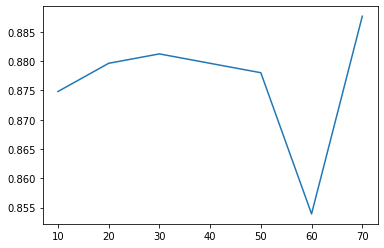

In [576]:
plt.plot(n_ests, ac)

# Make ans

In [541]:
data_for_ans = pd.read_csv("titanic/test.csv")

In [542]:
data_for_ans.shape

(418, 11)

In [543]:
data_for_ans.dropna().shape

(87, 11)

In [544]:
data_zeros_ans

,Age,Fare,ticket,number_of_cabin
0,34.5,7.8292,330911,0
1,47.0,7.0000,363272,0
2,62.0,9.6875,240276,0
3,27.0,8.6625,315154,0
4,22.0,12.2875,3101298,0
...,...,...,...,...
413,0.0,8.0500,3236,0
414,39.0,108.9000,17758,105
415,38.5,7.2500,3101262,0
416,0.0,8.0500,359309,0


In [545]:
data_cat_ans = data_for_ans[cat_columns_1].fillna('NA').astype(str)

In [546]:
data_ticket_1 = np.array(data_for_ans[str_columns[0]].apply(lambda x: x.split(" ")[-1]))

In [547]:
data_ticket_1[data_ticket_1 == "LINE"] = 0

In [548]:
data_ticket_1 = np.array(data_ticket_1, dtype = int)

In [549]:
data_for_ans["ticket"] = data_ticket_1

In [550]:
def clear_cabin(x):
    a = np.array([item[1:] for item in x.split(" ")])
    a = np.array(a[a!= ""], dtype = int)
    if len(a) == 0:
        res = 0
    else: 
        res = int(a.mean())
    return res


data_corpus_1 = np.array(data_for_ans[str_columns[1]].fillna("N0").apply(lambda x: x.split(" ")[0][0]))
data_cabin_1 = np.array(data_for_ans[str_columns[1]].fillna("N0").apply(clear_cabin))

In [551]:
data_for_ans["corpus"] = data_corpus_1
data_for_ans["number_of_cabin"] = data_cabin_1

In [552]:
data_zeros_ans = data_for_ans[num_columns].fillna(0)

In [454]:
data_cat_ans_mean = data_for_ans[cat_columns].astype(str)
for col in data_cat_ans.columns:
    data_cat_ans_mean[col].fillna(data_cat_ans_mean[col].mode(), inplace = True)

data_mean_ans =data_for_ans[num_columns]
for col in data_mean_ans.columns:
    data_mean_ans[col].fillna(data_mean_ans[col].mean(), inplace = True)

/Users/maxim/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [553]:
data_cat_oh_ans = encoder_1.transform(data_cat_ans.T.to_dict().values())

In [554]:
data_mean_ans_1 = np.column_stack((scaler_zeros.transform(data_mean_ans), data_cat_oh_ans))


In [555]:
_,final_ans = est.predict(data_mean_ans_1)
final_ans = np.array(final_ans, dtype = int)

In [556]:
final_data_1 = pd.DataFrame(data_for_ans['PassengerId'])

In [557]:
final_data_1["Survived"] = pd.Series(final_ans, index=final_data_1.index, dtype=int)

In [558]:
final_data_1.to_csv("submission.csv", sep=',', index=False)

In [559]:
final_data_1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [470]:
data_for_ans['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [790]:
final_ans

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [801]:
idx = np.linspace(0, len(et)-1,len(et), dtype  = int )

In [754]:
a = final_ans

In [822]:
idx[final_ans != et]

array([ 21,  33,  41,  49,  58,  68,  72,  76,  77,  85,  93,  94,  98,
       108, 116, 118, 127, 133, 144, 146, 148, 151, 157, 158, 163, 169,
       171, 173, 181, 191, 192, 197, 201, 205, 211, 213, 219, 225, 244,
       263, 266, 274, 284, 288, 289, 290, 291, 292, 301, 323, 332, 339,
       342, 344, 347, 354, 359, 365, 366, 369, 383, 405, 409, 412, 413,
       416])

In [824]:
len(idx[final_ans != et])

66

In [823]:
idx[final_ans != a] 

array([108, 211, 291, 333, 347])

In [123]:
data_for_check = pd.read_csv("submission.csv")

In [124]:
data_for_check

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [125]:
et = np.array(data_for_check["Survived"])

In [127]:
0.7990*len(et)

333.982

In [128]:
len(et) - 334

84

In [129]:
et

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [106]:
b = ans.copy()

In [108]:
b = 1

In [109]:
ans

array([0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0.